# Project Title: 
### Semantic Segmentation task: Automated Sea Turtle Segmentation
The github URL: https://github.com/sdoqb15/Semantic-Segmentation-task-Automated-Sea-Turtle-Segmentation.git
# Group name:
### HHHD

| Student Name                 | zID       |
|------------------------------|-----------|
| Xuda Chen                    | z5527738  |
| Zhihong Jin                  | z5613826  |
| Wenyu Yin                    | z5516670  |
| Yizhuo Xu                    | z5460384  |
| Hao Zhu                      | z5503328  |

-----------------------------------------------------------------------------------------------------------------------------------------------

All of our code is integrated within this Jupyter Notebook, which is organized into clear sections as follows:
#### **1. Preliminary Steps**
##### 1.1 Install necessary packges
##### 1.2 Import necessary liberaries
##### 1.3 Set the device to GPU
#### **2. Process the dataset**
##### 2.1 Download the dataset
##### 2.2 Observe the dataset
##### 2.3 Split the dataset (using 'split_open')
##### 2.4 Data Preprocessing and Mask, Dataset Creation
#### **3. Define Models**
##### 3.1 Mean-shift
##### 3.2 K-means
##### 3.3 U-Net
##### 3.4 DeepLabV3
##### 3.5 DeepLabV3Plus
##### 3.6 DeepLabV3Plus_MobileNetV2
##### 3.7 DeepLabV3Plus_VIT
##### 3.8 DeepLabV3Plus_VIT2
##### 3.9 DeepLabV3Plus_VIT3
#### **4. Train Models**
##### 4.1 Mean-shift
##### 4.2 K-means
##### 4.3 U-Net
##### 4.4 DeepLabV3
##### 4.5 DeepLabV3Plus
##### 4.6 DeepLabV3Plus_MobileNetV2
##### 4.7 DeepLabV3Plus_VIT
##### 4.8 DeepLabV3Plus_VIT2
##### 4.9 DeepLabV3Plus_VIT3
#### **5. Test models and show results**
##### 5.1 Mean-shift
##### 5.2 K-means
##### 5.3 U-Net
##### 5.4 DeepLabV3
##### 5.5 DeepLabV3Plus
##### 5.6 DeepLabV3Plus_MobileNetV2
##### 5.7 DeepLabV3Plus_VIT
##### 5.8 DeepLabV3Plus_VIT2
##### 5.9 DeepLabV3Plus_VIT3
##### 5.10 Summary of mIoU Results in test set of all the models
##### 5.11 Test the segmentation effect of specific images on the test set (compare all the models)

-----------------------------------------------------------------------------------------------------------------------------------------------

The notebook contains the outputs of all cells，you can directly review our work and results by looking at the outputs of each cell in the notebook. If you want to test our code, here are your options:

1. **Run the Notebook from Start to Finish**  
   The simplest way is to execute the entire Notebook from the beginning. However, be aware that this process will take a significant amount of time, primarily due to the lengthy training phase. Since we have 9 models, the complete execution will require more than 24 hours.

2. **Fastest Way**  
   To save time, you can download our pre-trained models from [Google Drive](https://drive.google.com/drive/folders/1SW2LKlv_PPA5Lo6U--W6G__ymlBx9OnM?usp=sharing). Place the downloaded models in the same directory as this Notebook. Then, skip the **(4. Train models)** step and proceed directly to **(5. Test models and show results)**.

3. **Testing Training Code Efficiently**  
   If you wish to test our training code but also want to save time, you can choose to train only one model while downloading the other pre-trained models from the above link.


# 1. Preliminary Steps

All cells in this section **must be executed** before running the rest of the notebook.

To ensure that our results can be accurately reproduced, please make sure that the hardware and environment setup you're using are as close as possible to ours, especially if you plan to test the training steps.

### Our Main Hardware Information:
- **GPU**: NVIDIA GeForce RTX 4050 Laptop GPU

### Our Main Environment Information:
- **Python Version**: 3.9.20
- **PyTorch**: 2.5.1 (with CUDA 12.4)
- **TorchVision**: 0.20.1
- **Torchaudio**: 2.5.1
- **Timm**: 1.0.11
- **Scikit-Learn**: 1.5.2
- **Scipy**: 1.14.1
- **Pandas**: 2.2.3
- **Numpy**: 1.26.4
- **Transformers**: 4.46.1
- **SpaCy**: 3.8.2
- **Tokenizers**: 0.20.2
- **Gensim**: 4.3.2
- **Huggingface Datasets**: 2.20.0
- **PyArrow**: 16.1.0
- **Smart-Open**: 7.0.4
- **OpenCV**: 4.10.0.84

For more detailed environment information, please refer to the `environment.yml` file available on our [Google Drive](https://drive.google.com/drive/folders/1SW2LKlv_PPA5Lo6U--W6G__ymlBx9OnM?usp=sharing).

**Note**: You can run our code on Google Colab, but we cannot guarantee that the results will perfectly match due to differences in hardware and software environments.


### 1.1 Install necessary packges

In [1]:
!pip install kagglehub
!pip install pycocotools
!pip install torchvision
!pip install torch
!pip install timm
!pip install transformers
!pip install pandas
!pip install scikit-learn
!pip install ipywidgets
!pip install tokenizers

### 1.2 Import necessary liberaries

In [2]:
import os
import glob
import json
import pandas as pd
from pycocotools.coco import COCO
from PIL import Image
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import Subset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import random
from matplotlib import pyplot as plt
import cv2
import kagglehub
import time
from tqdm import tqdm  
import timm
from sklearn.cluster import MeanShift, estimate_bandwidth
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision.models import mobilenet_v2
from torchvision.models._utils import IntermediateLayerGetter
from sklearn.cluster import MeanShift, estimate_bandwidth

### 1.3 Set the device to GPU

In [3]:
# Check if CUDA is available and get version info
print("CUDA Available: ", torch.cuda.is_available())
print("CUDA Version: ", torch.version.cuda)
print("PyTorch Version: ", torch.__version__)

# Set the device to GPU if available, otherwise use CPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

CUDA Available:  True
CUDA Version:  12.4
PyTorch Version:  2.5.1
There are 1 GPU(s) available.
Device name: NVIDIA GeForce RTX 4050 Laptop GPU


### 1.4 Set the random seed

In [4]:
# Fix random seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
    # For CUDA accelerated convolution operations, these two settings ensure the use of a fixed algorithm, avoiding different convolution implementations each time
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Call the set_seed function to ensure reproducible results
set_seed(42)


# 2. Process the dataset

All cells in this section **must be executed** to properly process the dataset.

### About the Dataset
You don't need to manually prepare or download the dataset beforehand. We use the command `kagglehub.dataset_download("wildlifedatasets/seaturtleid2022")` to automatically download the dataset and to ensure my code can access it.
Our code will handle setting the correct path. 

**Note**: If you prefer to use a pre-prepared dataset, ensure that you modify the paths in the code accordingly.



### 2.1 Download the dataset

In [5]:
path = kagglehub.dataset_download("wildlifedatasets/seaturtleid2022")
data_path = os.path.join(path, 'turtles-data/data/')
print("Path to dataset files:", path)

Path to dataset files: C:\Users\chenxvda\.cache\kagglehub\datasets\wildlifedatasets\seaturtleid2022\versions\3


### 2.2 Observe the dataset

loading annotations into memory...
Done (t=3.26s)
creating index...
index created!
Sample True Mask classes: [0 1 2 3]


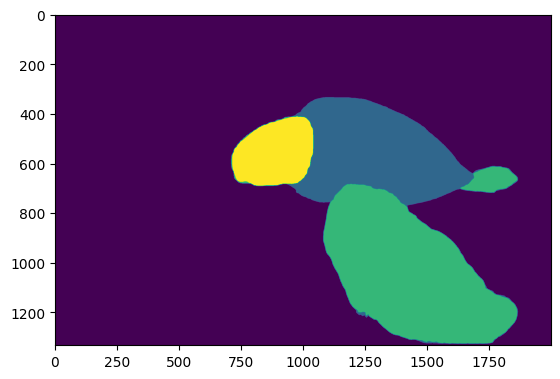

In [6]:
# Load the COCO annotations
ann_path = os.path.join(data_path, 'annotations.json')
with open(ann_path, 'r', encoding='utf8') as f:
    data = json.load(f)

coco = COCO(ann_path)

# get metadata of coco categories
coco.loadCats(coco.getCatIds()) # returns dictionary

img = coco.imgs[1244]
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
mask = coco.annToMask(anns[0])  # Initialize the mask with the original image size
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])  # Overlay all annotated masks
plt.imshow(mask)
print(f"Sample True Mask classes:", np.unique(mask))  # Print unique mask classes


### 2.3 Split the dataset (using 'split_open')

In [7]:
# Load metadata
metadata = pd.read_csv(os.path.join(data_path,'metadata.csv'))
metadata_splits = pd.read_csv(os.path.join(data_path,'metadata_splits.csv'))

# Split data into train, validation, and test sets
train_files = metadata_splits[metadata_splits['split_open'] == 'train']
val_files = metadata_splits[metadata_splits['split_open'] == 'valid']
test_files = metadata_splits[metadata_splits['split_open'] == 'test']

# To speed up training and testing, we used only half of the data for each of the training, validation, and test subsets.
train_files = train_files[:len(train_files)//2]
val_files = val_files[:len(val_files)//2]
test_files = test_files[:len(test_files)//2]

### 2.4 Data Preprocessing and Mask, Dataset Creation

In [8]:
# Define constants
batch_size = 16
target_size = (256, 256)
num_classes = 4
learning_rate = 1e-4
epochs = 30
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
# Image Preprocessing
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(target_size),
    ])
    return transform(image).float()

# Dataset class
class TurtleDataset(Dataset):
    def __init__(self, image_ids, coco):
        self.image_ids = image_ids
        self.coco = coco

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids.iloc[idx]
        img_info = self.coco.imgs[img_id]
        image = Image.open(os.path.join(data_path,img_info['file_name'])).convert('RGB')
        image = preprocess_image(image)

        mask = create_detailed_mask(img_id, img_info)
        mask = torch.from_numpy(mask).permute(2, 0, 1)  # Change to (C, H, W)
        return image, mask

def create_detailed_mask(img_id, img_info):
    mask = np.zeros((*target_size, num_classes), dtype=np.float32)

    ann_ids = coco.getAnnIds(imgIds=img_id)
    annotations = coco.loadAnns(ann_ids)

    temp_masks = {
        'whole': np.zeros(target_size, dtype=np.float32),
        'limbs': np.zeros(target_size, dtype=np.float32),
        'head': np.zeros(target_size, dtype=np.float32)
    }

    for ann in annotations:
        class_id = ann['category_id']
        ann_mask = coco.annToMask(ann)
        ann_mask = np.array(Image.fromarray(ann_mask).resize(target_size))

        if class_id == 1:
            temp_masks['whole'] = np.maximum(temp_masks['whole'], ann_mask)
        elif class_id == 2:
            temp_masks['limbs'] = np.maximum(temp_masks['limbs'], ann_mask)
        elif class_id == 3:
            temp_masks['head'] = np.maximum(temp_masks['head'], ann_mask)

    shell_mask = temp_masks['whole'] - temp_masks['limbs'] - temp_masks['head']
    background_mask = 1 - temp_masks['whole']

    mask[..., 0] = background_mask
    mask[..., 1] = shell_mask
    mask[..., 2] = temp_masks['limbs']
    mask[..., 3] = temp_masks['head']

    return (mask > 0.5).astype(np.float32)

def calculate_iou_per_class(y_true, y_pred, num_classes=4):
    """Calculate IoU for each class and return a list of IoUs for all classes"""
    ious = []
    for class_id in range(num_classes):
        true_class = (y_true == class_id).float()
        pred_class = (y_pred == class_id).float()

        intersection = (true_class * pred_class).sum().item()
        union = true_class.sum().item() + pred_class.sum().item() - intersection

        if union == 0:
            iou = float('nan')  # Ignore this class if there is no intersection or prediction
        else:
            iou = intersection / union

        ious.append(iou)
    return ious  # Return a list of IoUs for each class

# 3. Define Models


It is **recommended** to run all the cells in this section to prepare for loading or training the models in subsequent steps. However, you can choose to run only the cells for the specific model you wish to test or train.

**Note**: Even if you plan to load our pre-trained `.pth` model files, you still need to run this section to properly define the models.

Each method and model is explained in detail within the `""" """` comments under their respective functions or classes, including a description of their structure and reference sources.


### 3.1 Mean-shift

In [10]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Mean Shift segmentation function
def mean_shift_segmentation(image, quantile=0.2, n_samples=50):
    """
    Perform Mean Shift segmentation on an image.

    Parameters:
    -----------
    image: np.ndarray or torch.Tensor
        The input image to be segmented. Can be a NumPy array or a PyTorch Tensor.
    quantile: float, optional, default=0.2
        The quantile used to automatically estimate the bandwidth for Mean Shift.
    n_samples: int, optional, default=50
        The number of samples to use for estimating the bandwidth.

    Returns:
    --------
    segmented_image: np.ndarray
        The segmented image with cluster labels.
    
    References:
    -----------
    - [Scikit-learn Mean Shift Example](https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py)
    - [Mean shift: A robust approach toward feature space analysis](https://ieeexplore.ieee.org/document/1000236)
    """
    # Check if the input is a PyTorch Tensor
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).cpu().numpy()
        image = (image * 255).astype(np.uint8)

    # Image preprocessing: convert to LAB color space and flatten to feature array
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    features = lab_image.reshape(-1, 3).astype(np.float32)

    # Automatically estimate bandwidth
    bandwidth = estimate_bandwidth(features, quantile=quantile, n_samples=n_samples)

    # Create MeanShift model and perform clustering
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    mean_shift.fit(features)

    # Get cluster labels
    labels = mean_shift.labels_

    # Reshape labels to image shape
    segmented_image = labels.reshape(image.shape[:2])
    return segmented_image

### 3.2 K-means

In [11]:
# K-Means segmentation func
def kmeans_segmentation(image, k=4, attempts=10, max_iter=100):
    """
    Using K-Means for image segmentation

    Parameters:
    -----------
    image: np.ndarray or torch.Tensor
        The input image to be segmented. Can be a NumPy array or a PyTorch Tensor.
    k: int, optional, default=4
        The number of clusters to form.
    attempts: int, optional, default=10
        The number of times the algorithm will be run with different centroid seeds.
    max_iter: int, optional, default=100
        The maximum number of iterations for the algorithm.

    Returns:
    --------
    segmented_image: np.ndarray
        The segmented image with cluster labels.
    
    References:
    -----------
    - [K-Means Clustering in OpenCV](https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html)
    - [Least squares quantization in PCM](https://ieeexplore.ieee.org/document/1056489)
    """
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).cpu().numpy()
        image = (image * 255).astype(np.uint8)

    # pre-processing of pics
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    features = lab_image.reshape(-1, 3).astype(np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, 0.2)
    _, labels, centers = cv2.kmeans(features, k, None, criteria, attempts,
                                  cv2.KMEANS_RANDOM_CENTERS)

    return labels.reshape(image.shape[:2])

### 3.3 U-Net

In [12]:
# U-Net Model
class UNet(nn.Module):
    """
    UNet Architecture for Semantic Segmentation
    

    Structural Parameters:
    - Input Channels: 3 (RGB image)
    - Encoder:
        - First Layer: Input Channels 3, Output Channels 64
        - Second Layer: Input Channels 64, Output Channels 128
        - Third Layer: Input Channels 128, Output Channels 256
    - Decoder:
        - First Upsampling Layer: Input Channels 256, Output Channels 128
        - Second Upsampling Layer: Input Channels 128, Output Channels 64
    - Final Output Layer: Input Channels 64, Output Channels equal to the number of classes (num_classes)
    - Activation Function: ReLU
    - Batch Normalization: BatchNorm2d

    Parameters:
    - num_classes (int): Number of output classes for the segmentation task.

    References:
    -----------
    Implements UNet model from
    - [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597) 
    The code implementation is based on the following project with some simplifications:
    - [U-Net: Semantic segmentation with PyTorch](https://github.com/milesial/Pytorch-UNet/tree/master/unet)
    """
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        self.encoder1 = self.block(3, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.encoder2 = self.block(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.encoder3 = self.block(128, 256)

        self.up1 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder1 = self.block(256, 128)

        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder2 = self.block(128, 64)

        self.output_layer = nn.Conv2d(64, num_classes, kernel_size=1)

    def block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        enc1 = self.encoder1(x)
        x = self.pool1(enc1)

        enc2 = self.encoder2(x)
        x = self.pool2(enc2)

        x = self.encoder3(x)

        x = self.up1(x)
        x = torch.cat([x, enc2], dim=1)
        x = self.decoder1(x)

        x = self.up2(x)
        x = torch.cat([x, enc1], dim=1)
        x = self.decoder2(x)

        return self.output_layer(x)

### 3.4 DeepLabV3

In [13]:
# Define the model
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

# Use the pre-trained DeepLabV3 model
class DeepLabV3(nn.Module):
    """
    DeepLabV3 Architecture using a ResNet-50 backbone for Semantic Segmentation

    Structure:
    - The model is based on the DeepLabV3 architecture, which employs atrous convolution to capture multi-scale context
      information and improve segmentation performance, especially for dense prediction tasks.
    - The backbone is a pre-trained ResNet-50 model that is modified with atrous convolution to extract dense features.
    - The Atrous Spatial Pyramid Pooling (ASPP) module is integrated within the pre-trained DeepLabV3 model to handle
      objects at multiple scales. This module is part of the `deeplabv3_resnet50` implementation from `torchvision`.
    - The classifier head of the model is replaced to match the custom number of output classes specified by the user.

    Parameters:
    - num_classes (int): Number of output classes for the segmentation task.

    References:
    -----------
    Implements DeepLabV3 model from
    - [DeepLabV3: Rethinking Atrous Convolution for Semantic Image Segmentation](https://arxiv.org/abs/1706.05587)
    The code implementation is based on
    - [Official PyTorch implementation and documentation](https://pytorch.org/vision/stable/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html)
    """
    def __init__(self, num_classes):
        super(DeepLabV3, self).__init__()
        # Load the pre-trained DeepLabV3 model (based on ResNet50 backbone)
        self.model = deeplabv3_resnet50(weights=DeepLabV3_ResNet50_Weights.DEFAULT)
        
        # Replace the classifier head to fit the custom num_classes
        self.model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        return self.model(x)['out']


### 3.5 DeepLabV3Plus

In [14]:
# Define the model
from torchvision.models.segmentation import deeplabv3_resnet50

from torchvision.models._utils import IntermediateLayerGetter

class DeepLabV3Plus(nn.Module):
    """
    A custom implementation of the DeepLabV3+ semantic segmentation model using a ResNet-50 backbone.
    
    Structure:
    - Encoder: Uses a pre-trained ResNet-50 model to extract low-level features from 'layer1' (with 256 channels) 
      and high-level features from 'layer4' (with 2048 channels).
    - ASPP: The Atrous Spatial Pyramid Pooling module applies a series of convolutions to the 2048-channel 
      high-level features, reducing them to 256 channels and capturing multi-scale context information.
    - Low-Level Feature Processing: The low-level features (256 channels) are reduced to 48 channels using a 
      1x1 convolution to better align with the upsampled high-level features.
    - Decoder: Combines the 256-channel ASPP output and the 48-channel low-level features, resulting in 304 channels. 
      The combined features are processed through a series of convolutions to output a segmentation map with 
      `num_classes` channels.
    - Upsampling: The final output is upsampled using bilinear interpolation to match the original input image size.
    - Activation Function: ReLU
    - Batch Normalization: BatchNorm2d
    
    Parameters:
    - num_classes (int): Number of output classes for the segmentation task.
    
    References:
    -----------
    Implements DeepLabV3Plus model from
    - [DeepLabV3+: Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation](https://arxiv.org/abs/1802.02611)
    The code implementation is based on the following project with some modification:
    - (https://github.com/VainF/DeepLabV3Plus-Pytorch/blob/master/network/_deeplab.py)
    """
    def __init__(self, num_classes):
        super(DeepLabV3Plus, self).__init__()
        # Load pre-trained ResNet50 backbone and set up IntermediateLayerGetter
        resnet = deeplabv3_resnet50(pretrained=True).backbone
        self.encoder = IntermediateLayerGetter(resnet, return_layers={'layer1': 'low_level', 'layer4': 'out'})

        # ASPP module
        self.aspp = nn.Sequential(
            nn.Conv2d(2048, 256, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, dilation=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        # Decoder to upsample and combine with low-level features
        self.low_level_conv = nn.Sequential(
            nn.Conv2d(256, 48, kernel_size=1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(304, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, num_classes, kernel_size=1)
        )

    def forward(self, x):
        # Extract features using the encoder (ResNet backbone)
        features = self.encoder(x)

        low_level_features = features['low_level']
        high_level_features = features['out']

        # Apply ASPP to high-level features
        high_level_features = self.aspp(high_level_features)

        # Process low-level features
        low_level_features = self.low_level_conv(low_level_features)

        # Upsample high-level features and concatenate with low-level features
        high_level_features = nn.functional.interpolate(
            high_level_features, size=low_level_features.shape[2:], mode='bilinear', align_corners=True
        )
        concatenated_features = torch.cat([high_level_features, low_level_features], dim=1)

        # Pass through the decoder
        output = self.decoder(concatenated_features)

        # Upsample to match the input size
        output = nn.functional.interpolate(output, size=x.shape[2:], mode='bilinear', align_corners=True)

        return output


### 3.6 DeepLabV3Plus_MobileNetV2

In [15]:
from torchvision.models import mobilenet_v2
from torchvision.models._utils import IntermediateLayerGetter

class DeepLabV3Plus_MobileNetV2(nn.Module):
    """
    A modified implementation of the DeepLabV3+ semantic segmentation model using a MobileNetV2 backbone.

    Key Differences from DeepLabV3+ with ResNet-50:
    - The backbone is MobileNetV2, which is more efficient and lightweight compared to ResNet-50. 
    - The feature extraction layers differ, with MobileNetV2's 'layer2' and 'layer18' used for low-level and high-level
      feature extraction, respectively, compared to the deeper layers of ResNet-50 in the previous model.

    Parameters:
    - num_classes (int): The number of output classes for segmentation.

    References:
    -----------
    The MobileNetV2 model is from
    - [MobileNetV2: Inverted Residuals and Linear Bottlenecks] (https://arxiv.org/abs/1801.04381)
    The inspiration for using other models as the backbone of DeepLabV3Plus comes from
    - (https://github.com/VainF/DeepLabV3Plus-Pytorch)
    """
    def __init__(self, num_classes):
        super(DeepLabV3Plus_MobileNetV2, self).__init__()
        # Load pre-trained MobileNetV2 backbone and set up IntermediateLayerGetter
        mobilenet = mobilenet_v2(pretrained=True).features
        self.encoder = IntermediateLayerGetter(mobilenet, return_layers={'2': 'low_level', '18': 'out'})

        # ASPP module
        self.aspp = nn.Sequential(
            nn.Conv2d(1280, 256, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, dilation=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        # Decoder to upsample and combine with low-level features
        self.low_level_conv = nn.Sequential(
            nn.Conv2d(24, 48, kernel_size=1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(304, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, num_classes, kernel_size=1)
        )

    def forward(self, x):
        # Extract features using the encoder (MobileNetV2 backbone)
        features = self.encoder(x)

        low_level_features = features['low_level']  # Low-level features from earlier layer (usually early convolutional layer)
        high_level_features = features['out']  # High-level features from the last convolutional layer

        # Apply ASPP to high-level features
        high_level_features = self.aspp(high_level_features)

        # Process low-level features
        low_level_features = self.low_level_conv(low_level_features)

        # Upsample high-level features and concatenate with low-level features
        high_level_features = nn.functional.interpolate(
            high_level_features, size=low_level_features.shape[2:], mode='bilinear', align_corners=True
        )
        concatenated_features = torch.cat([high_level_features, low_level_features], dim=1)

        # Pass through the decoder
        output = self.decoder(concatenated_features)

        # Upsample to match the input size
        output = nn.functional.interpolate(output, size=x.shape[2:], mode='bilinear', align_corners=True)

        return output

### 3.7 DeepLabV3Plus_VIT

In [16]:
from transformers import ViTModel

class DeepLabV3Plus_VIT(nn.Module):
    """
    A custom implementation of the DeepLabV3+ semantic segmentation model using a Vision Transformer (ViT) backbone.

    Key Differences from Other DeepLabV3+ Variants:
    - Backbone: Uses a transformer-based Vision Transformer (ViT) instead of a convolutional backbone like
      ResNet-50 or MobileNetV2. This enables the model to capture global context more effectively but requires
      reshaping and special handling of features due to the transformer architecture.
    - Low-Level Features: Unlike convolutional backbones, ViT does not provide low-level spatial features.
      As a workaround, this implementation uses dummy low-level features (initialized as zero tensors) as 
      placeholders for the segmentation process, and then processed using a `low_level_conv` module.
      This approach allows the model to maintain compatibility with the DeepLabV3+ decoder architecture, but it may 
      limit the model's ability to capture detailed spatial information compared to traditional convolutional networks.
    - Feature Representation: The ViT encoder outputs a sequence of tokens that must be reshaped into a 2D
      spatial format to be compatible with the DeepLabV3+ decoder and ASPP module.

    Parameters:
    - num_classes (int): The number of output classes for segmentation.

    References:
    -----------
    The VIT model is from
    - [Vision Transformer (ViT): An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)
    - [Hugging Face Transformers](https://huggingface.co/docs/transformers)
    The inspiration for using other models as the backbone of DeepLabV3Plus comes from
    - (https://github.com/VainF/DeepLabV3Plus-Pytorch)
    """

    def __init__(self, num_classes):
        super(DeepLabV3Plus_VIT, self).__init__()
        # Load pre-trained Vision Transformer (ViT) backbone
        self.encoder = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

        # ASPP module
        self.aspp = nn.Sequential(
            nn.Conv2d(768, 224, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, 224, kernel_size=3, stride=1, padding=1, dilation=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU()
        )
        
        # Decoder to upsample and combine with low-level features
        self.low_level_conv = nn.Sequential(
            nn.Conv2d(24, 48, kernel_size=1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Conv2d(272, 224, kernel_size=3, padding=1, bias=False),  # 224 + 48 = 272
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, 224, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, num_classes, kernel_size=1)
        )


    def forward(self, x):
        # Extract features using the encoder (ViT backbone)
        vit_features = self.encoder(pixel_values=x).last_hidden_state  # Shape: (B, N, C), where N includes CLS token
        B, N, C = vit_features.shape
    
        # Remove the CLS token
        vit_features = vit_features[:, 1:, :]  # Shape: (B, 196, C)
    
        # Calculate spatial dimensions
        s = int((N - 1) ** 0.5)  # Now N - 1 should be a perfect square (196)
        if s * s != (N - 1):
            raise ValueError(f"N ({N - 1}) is not a perfect square, cannot reshape to (s, s)")
    
        # Reshape the features to create a 2D feature map
        high_level_features = vit_features.permute(0, 2, 1).reshape(B, C, s, s)
    
        # Placeholder for low-level features (ViT does not directly provide these)
        low_level_features = torch.zeros((B, 24, s, s), device=x.device)  # Dummy low-level features
    
        # Apply ASPP to high-level features
        high_level_features = self.aspp(high_level_features)
    
        # Process low-level features
        low_level_features = self.low_level_conv(low_level_features)
    
        # Upsample high-level features and concatenate with low-level features
        high_level_features = nn.functional.interpolate(
            high_level_features, size=low_level_features.shape[2:], mode='bilinear', align_corners=True
        )
        concatenated_features = torch.cat([high_level_features, low_level_features], dim=1)
    
        # Pass through the decoder
        output = self.decoder(concatenated_features)
    
        # Upsample to match the input size
        output = nn.functional.interpolate(output, size=x.shape[2:], mode='bilinear', align_corners=True)
    
        return output


### 3.8 DeepLabV3Plus_VIT2

In [17]:
from transformers import ViTModel

class DeepLabV3Plus_VIT2(nn.Module):
    """
    A custom implementation of the DeepLabV3+ semantic segmentation model using a Vision Transformer (ViT) backbone,
    with additional convolutional layers for enhanced low-level feature extraction.

    Key Differences from DeepLabV3Plus_VIT:
    - Low-Level Feature Extraction: `DeepLabV3Plus_VIT2` introduces a series of additional convolutional layers at the
      beginning of the model to extract meaningful low-level features directly from the input image. Unlike `DeepLabV3Plus_VIT`, 
      which uses dummy low-level features as placeholders, `DeepLabV3Plus_VIT2` captures fine-grained details, such as edges 
      and textures, providing richer spatial information for the segmentation process.
    - Feature Integration: The integration of these extracted low-level features with the high-level features from ViT 
      is more refined in `DeepLabV3Plus_VIT2`, potentially improving segmentation performance, especially for small or 
      detailed structures in the image.

    Parameters:
    - num_classes (int): The number of output classes for segmentation.

    References:
    The VIT model is from
    - [Vision Transformer (ViT): An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)
    - [Hugging Face Transformers](https://huggingface.co/docs/transformers)
    The inspiration for using other models as the backbone of DeepLabV3Plus comes from
    - (https://github.com/VainF/DeepLabV3Plus-Pytorch)
    The inspiration for using additional convolutional layers for enhanced low-level feature extraction comes from
    - [CvT: Introducing Convolutions to Vision Transformers](https://arxiv.org/abs/2103.15808)
    """
    def __init__(self, num_classes):
        super(DeepLabV3Plus_VIT2, self).__init__()
        # Load pre-trained Vision Transformer (ViT) backbone
        self.encoder = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

        # ASPP module
        self.aspp = nn.Sequential(
            nn.Conv2d(768, 224, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, 224, kernel_size=3, stride=1, padding=1, dilation=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU()
        )

        # Additional convolutional layers for better low-level feature extraction
        self.conv_low_features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 224, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU()
        )

        # Decoder to upsample and combine with low-level features
        self.low_level_conv = nn.Sequential(
            nn.Conv2d(224, 48, kernel_size=1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(272, 224, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, 224, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, num_classes, kernel_size=1)
        )

    def forward(self, x):
        # Extract low-level features using additional convolutional layers
        low_level_features = self.conv_low_features(x)  # Low-level features from initial convolutional layers

        # Extract features using the encoder (ViT backbone)
        vit_features = self.encoder(pixel_values=x).last_hidden_state
        B, N, C = vit_features.shape
        vit_features = vit_features[:, 1:, :]  # Remove the CLS token
        s = int((N - 1) ** 0.5)
        if s * s != (N - 1):
            raise ValueError(f"N ({N - 1}) is not a perfect square, cannot reshape to (s, s)")

        # Reshape the features to create a 2D feature map
        high_level_features = vit_features.permute(0, 2, 1).reshape(B, C, s, s)

        # Apply ASPP to high-level features
        high_level_features = self.aspp(high_level_features)

        # Process low-level features
        low_level_features = self.low_level_conv(low_level_features)

        # Upsample high-level features and concatenate with low-level features
        high_level_features = nn.functional.interpolate(
            high_level_features, size=low_level_features.shape[2:], mode='bilinear', align_corners=True
        )
        concatenated_features = torch.cat([high_level_features, low_level_features], dim=1)

        # Pass through the decoder
        output = self.decoder(concatenated_features)

        # Upsample to match the input size
        output = nn.functional.interpolate(output, size=x.shape[2:], mode='bilinear', align_corners=True)

        return output

### 3.9 DeepLabV3Plus_VIT3

In [18]:
import timm

class DeepLabV3Plus_VIT3(nn.Module):
    """
    A custom implementation of the DeepLabV3+ semantic segmentation model
    using a `small` version and 8x8 pixel patches' Vision Transformer (ViT) backbone,
    with additional convolutional layers for enhanced low-level feature extraction


    Key Differences from DeepLabV3Plus_VIT2:
    - ViT Version: `DeepLabV3Plus_VIT3` uses the `vit_small_patch8_224` model from the `timm` library, which
      has a smaller architecture and processes 8x8 pixel patches. In contrast, `DeepLabV3Plus_VIT2` uses the
      `vit_base_patch16_224` model, which has a larger architecture and processes 16x16 pixel patches. The smaller
      patches in `DeepLabV3Plus_VIT3` allow for finer spatial resolution in the feature maps.
    - Efficiency: The `small` version of ViT in `DeepLabV3Plus_VIT3` is more efficient and lightweight compared
      to the `base` version used in `DeepLabV3Plus_VIT2`, making it potentially faster and more suitable for scenarios
      where computational resources are limited.

    Parameters:
    - num_classes (int): The number of output classes for segmentation.

    References:
    The VIT model is from
    - [Vision Transformer (ViT): An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)
    - [TIMM Library](https://github.com/rwightman/pytorch-image-models)
    The inspiration for using other models as the backbone of DeepLabV3Plus comes from
    - (https://github.com/VainF/DeepLabV3Plus-Pytorch)
    The inspiration for using additional convolutional layers for enhanced low-level feature extraction comes from
    - [CvT: Introducing Convolutions to Vision Transformers](https://arxiv.org/abs/2103.15808)
    The choice of 'vit_small_patch8' is based on the comparison in this paper
    - [Emerging Properties in Self-Supervised Vision Transformers](https://arxiv.org/abs/2104.14294)
    """
    def __init__(self, num_classes):
        super(DeepLabV3Plus_VIT3, self).__init__()
        # Load pre-trained Vision Transformer (ViT) backbone
        self.encoder = timm.create_model('vit_small_patch8_224', pretrained=True, features_only=True)

        # ASPP module
        self.aspp = nn.Sequential(
            nn.Conv2d(384, 224, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, 224, kernel_size=3, stride=1, padding=1, dilation=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU()
        )

        # Additional convolutional layers for better low-level feature extraction
        self.conv_low_features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 224, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU()
        )

        # Decoder to upsample and combine with low-level features
        self.low_level_conv = nn.Sequential(
            nn.Conv2d(224, 48, kernel_size=1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(272, 224, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, 224, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(224),
            nn.ReLU(),
            nn.Conv2d(224, num_classes, kernel_size=1)
        )

    def forward(self, x):
        # Extract low-level features using additional convolutional layers
        low_level_features = self.conv_low_features(x)  # Low-level features from initial convolutional layers
    
        # Extract features using the encoder (ViT backbone)
        vit_features = self.encoder(x)  # List of feature maps
        high_level_features = vit_features[-1]  # Select the last feature map
        
        # Check if high_level_features has the expected shape
        B, C, H, W = high_level_features.shape
        assert C == 384, f"Expected 384 channels from ViT, got {C}"
    
        # Apply ASPP to high-level features
        high_level_features = self.aspp(high_level_features)
    
        # Process low-level features
        low_level_features = self.low_level_conv(low_level_features)
    
        # Upsample high-level features and concatenate with low-level features
        high_level_features = nn.functional.interpolate(
            high_level_features, size=low_level_features.shape[2:], mode='bilinear', align_corners=True
        )
        concatenated_features = torch.cat([high_level_features, low_level_features], dim=1)
    
        # Pass through the decoder
        output = self.decoder(concatenated_features)
    
        # Upsample to match the input size
        output = nn.functional.interpolate(output, size=x.shape[2:], mode='bilinear', align_corners=True)
    
        return output


# 4. Train models

This section is **time-consuming**, and you may choose to skip it and directly use our pre-trained models. You can download the trained models from [Google Drive](https://drive.google.com/drive/folders/1SW2LKlv_PPA5Lo6U--W6G__ymlBx9OnM?usp=sharing) and place them in the same directory as this notebook. Afterward, you can proceed to the next step, **“5. Test models and show results,”** for testing.

If you would like to run the training process, you can select a specific model (e.g., `DeepLabV3Plus_VIT3`) and execute only the relevant cells to save time.

Our training code outputs a **training log** (displaying progress) and automatically saves the model with the **lowest validation loss** as a `.pth` file in the same directory as this notebook. Additionally, we save the training process as a `.json` file (including loss and IoU metrics over time) and use it to plot the training curves.

For the **Mean-shift** and **K-means** traditional models, there is no actual “training” involved. Instead, we manually adjust hyperparameters using the training set and apply them to the test set in the next section, ensuring no data leakage. These models do not require saving to disk.

If the training time is too long, you can reduce the number of `epochs` in **Section 2.4** from 30 to a smaller value (though we recommend at least 15 epochs to obtain meaningful results).


### 4.1 Mean-shift

use Mean Shift to evaluate 10 train imgs...
have processed 5 imgs...
have processed 10 imgs...

Mean Shift evaluation finishes!
background mIoU: 0.7726
back mIoU: 0.0041
limbs mIoU: 0.0446
head mIoU: 0.0099


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10357789..1.0000002].


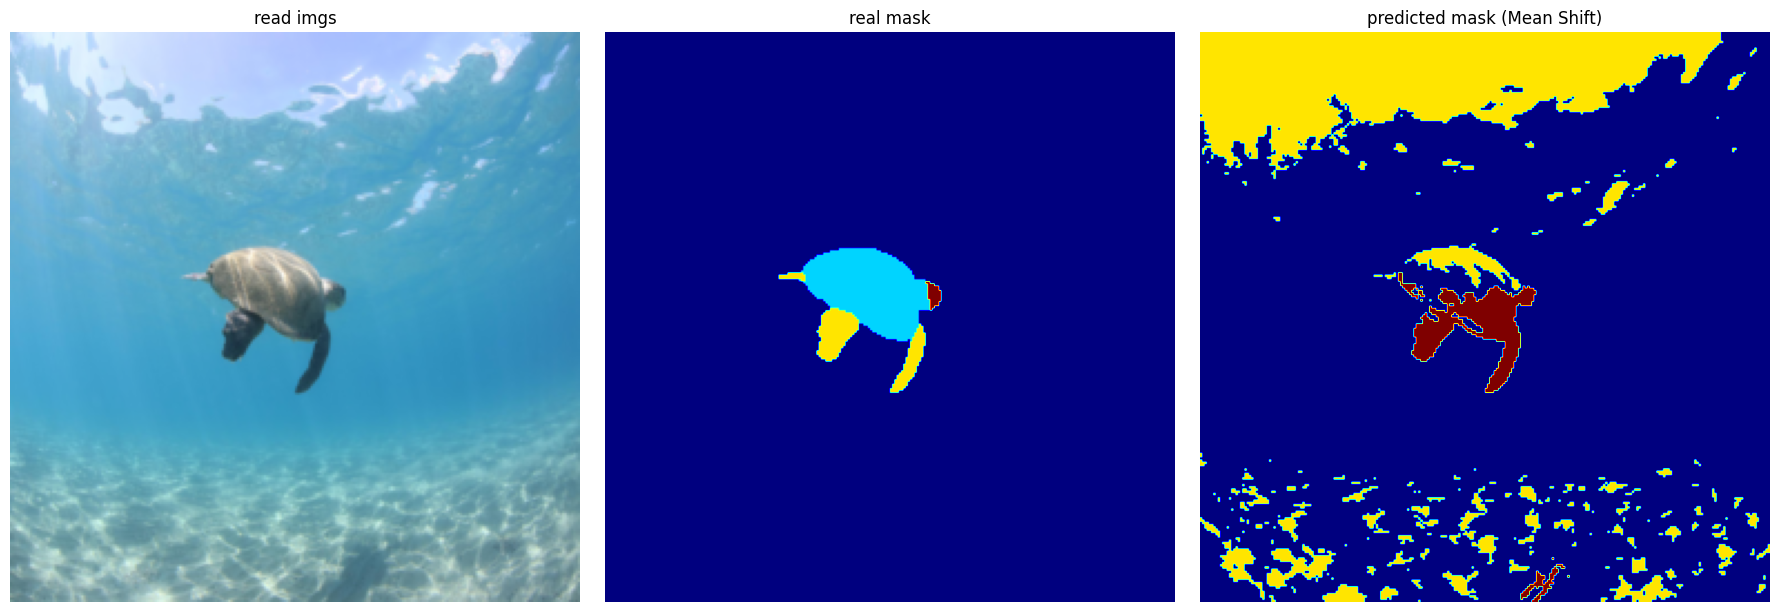

Background IoU: 0.8150
Shell IoU: 0.0000
Limbs IoU: 0.0010
Head IoU: 0.0324


In [11]:
# Fine-tune some hyperparameters using the train set

def apply_mean_shift_with_dynamic_threshold(segmented_image):
    """Classify Mean Shift results"""
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each region
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # 根据亮度排序重新映射标签
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # Background
        cluster_order[0]: 1,  # Shell
        cluster_order[2]: 2,  # Limbs
        cluster_order[1]: 3   # Head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

# Evaluation function
def evaluate_mean_shift(train_loader):
    """Evaluate Mean Shift method on the training set"""
    mean_shift_ious = np.zeros(4)
    total_samples = len(train_loader)

    print(f"use Mean Shift to evaluate {total_samples} train imgs...")

    with torch.no_grad():
        for idx, (image, masks) in enumerate(train_loader):
            # Apply Mean Shift segmentation
            segmented = mean_shift_segmentation(image.squeeze(0))
            predicted_mask = apply_mean_shift_with_dynamic_threshold(segmented)

            # Calculate IoU
            batch_ious = calculate_iou_per_class(
                torch.tensor(masks.argmax(1).squeeze(0).numpy()),
                torch.tensor(predicted_mask)
            )
            mean_shift_ious += np.nan_to_num(batch_ious)

            if (idx + 1) % 5 == 0:
                print(f"have processed {idx + 1} imgs...")

    mean_shift_ious /= total_samples

    print("\nMean Shift evaluation finishes!")
    print(f"background mIoU: {mean_shift_ious[0]:.4f}")
    print(f"back mIoU: {mean_shift_ious[1]:.4f}")
    print(f"limbs mIoU: {mean_shift_ious[2]:.4f}")
    print(f"head mIoU: {mean_shift_ious[3]:.4f}")

    return mean_shift_ious

target_size = (256, 256)

# Take the first 10 indices
train_dataset = TurtleDataset(train_files['id'], coco)
subset_indices = list(range(10))
train_subset = Subset(train_dataset, subset_indices)
train_loader_10 = DataLoader(train_subset, batch_size=1, shuffle=False)

# 运行评估
mean_shift_ious = evaluate_mean_shift(train_loader_10)

train_image_idx = 4
image, mask = train_dataset[train_image_idx]

# apply Mean Shift
segmented = mean_shift_segmentation(image)
predicted_mask = apply_mean_shift_with_dynamic_threshold(
    segmented
)

# visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image.permute(1, 2, 0).cpu().numpy())
axes[0].set_title("read imgs")
axes[0].axis('off')

axes[1].imshow(mask.argmax(0).cpu().numpy(), cmap='jet')
axes[1].set_title("real mask")
axes[1].axis('off')

axes[2].imshow(predicted_mask, cmap='jet')
axes[2].set_title("predicted mask (Mean Shift)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# The original shape of the mask is (4, 256, 256)
mask = mask.argmax(0).numpy()  # Change to argmax(0) to get the class label mask

# Perform Mean Shift segmentation on the image
segmented_image = mean_shift_segmentation(image)

# Classify the Mean Shift segmentation results
predicted_mask = apply_mean_shift_with_dynamic_threshold(segmented_image)

# Convert mask and predicted_mask to PyTorch tensors
mask_tensor = torch.tensor(mask)
pred_mask_tensor = torch.tensor(predicted_mask)

# Calculate IoU for each class
ious = calculate_iou_per_class(mask_tensor, pred_mask_tensor)

# Output results
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")

### 4.2 K-means

use K-means to evaluate 1 train imgs...

K-means evaluation finishes!
background mIoU: 0.5188
back mIoU: 0.3132
limbs mIoU: 0.0007
head mIoU: 0.0004


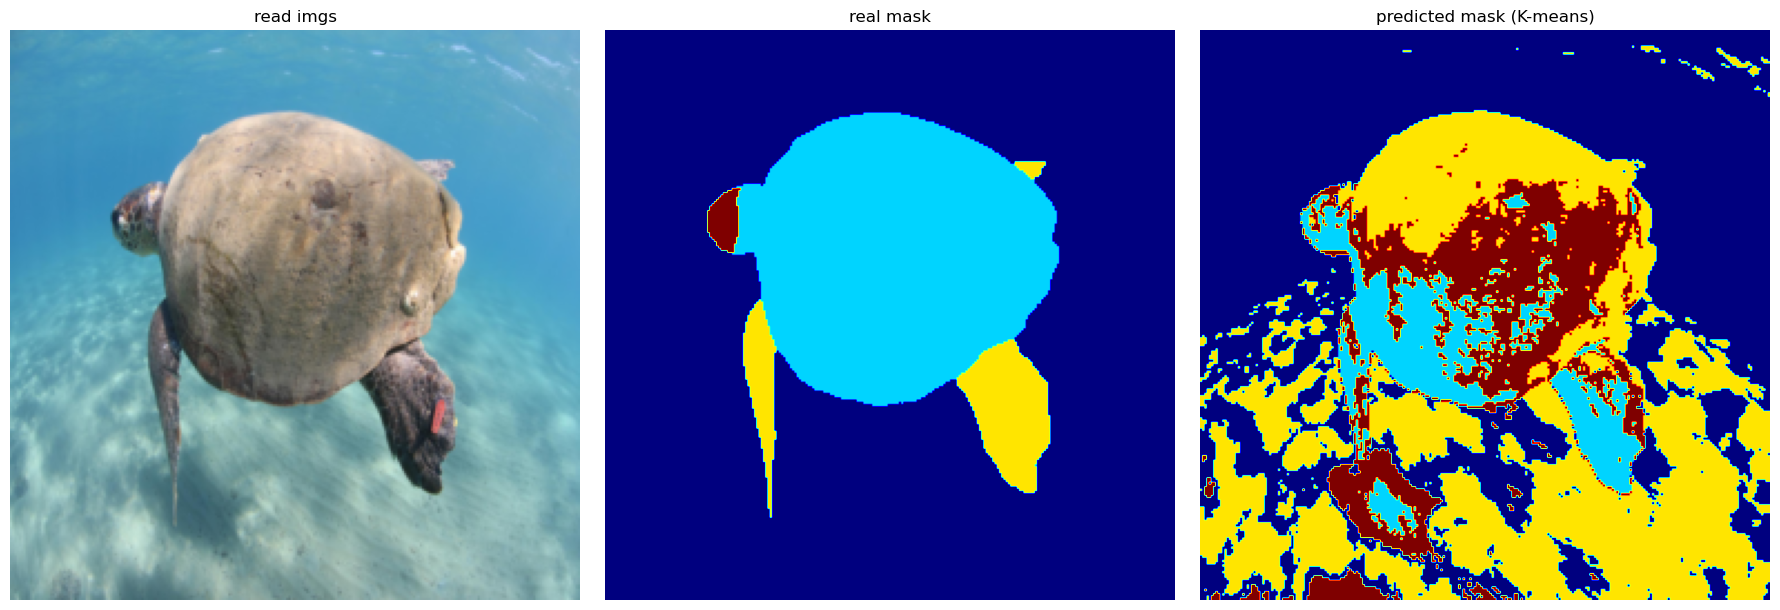

Background IoU: 0.6304
Shell IoU: 0.1951
Limbs IoU: 0.0094
Head IoU: 0.0102


In [12]:
# Fine-tune some hyperparameters using the train set

def apply_kmeans_with_dynamic_threshold(segmented_image):
    """Classify K-means results"""
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each cluster.
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # Remap labels based on brightness sorting.
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # background
        cluster_order[0]: 1,  # back
        cluster_order[2]: 2,  # limbs
        cluster_order[1]: 3   # head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

# Evaluation function
def evaluate_kmeans(train_loader):
    """Evaluate K-means methods on train sets"""
    kmeans_ious = np.zeros(4)
    total_samples = len(train_loader)

    print(f"use K-means to evaluate {total_samples} train imgs...")

    with torch.no_grad():
        for idx, (image, masks) in enumerate(train_loader):
            # apply K-means
            segmented = kmeans_segmentation(image.squeeze(0))
            predicted_mask = apply_kmeans_with_dynamic_threshold(
                segmented
            )

            # calculate IoU
            batch_ious = calculate_iou_per_class(
                torch.tensor(masks.argmax(1).squeeze(0).numpy()),
                torch.tensor(predicted_mask)
            )
            kmeans_ious += np.nan_to_num(batch_ious)

            if (idx + 1) % 50 == 0:
                print(f"have processed {idx + 1} imgs...")

    kmeans_ious /= total_samples

    print("\nK-means evaluation finishes!")
    print(f"background mIoU: {kmeans_ious[0]:.4f}")
    print(f"back mIoU: {kmeans_ious[1]:.4f}")
    print(f"limbs mIoU: {kmeans_ious[2]:.4f}")
    print(f"head mIoU: {kmeans_ious[3]:.4f}")

    return kmeans_ious

target_size = (256, 256)

# Take the first 10 indices
train_dataset = TurtleDataset(train_files['id'], coco)
subset_indices = list(range(10))
train_subset = Subset(train_dataset, subset_indices)
train_loader_10 = DataLoader(train_subset, batch_size=1, shuffle=False)


# run evaluation
kmeans_ious = evaluate_kmeans(train_loader_10)

train_image_idx = 2
image, mask = train_dataset[train_image_idx]

# apply k-means
segmented = kmeans_segmentation(image)
predicted_mask = apply_kmeans_with_dynamic_threshold(
    segmented
)

# visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image.permute(1, 2, 0).cpu().numpy())
axes[0].set_title("read imgs")
axes[0].axis('off')

axes[1].imshow(mask.argmax(0).cpu().numpy(), cmap='jet')
axes[1].set_title("real mask")
axes[1].axis('off')

axes[2].imshow(predicted_mask, cmap='jet')
axes[2].set_title("predicted mask (K-means)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# The original shape of the mask is (4, 256, 256)
mask = mask.argmax(0).numpy()  # Change to argmax(0) to get the class label mask

# Perform Mean Shift segmentation on the image
segmented_image = kmeans_segmentation(image)

# Classify the Mean Shift segmentation results
predicted_mask = apply_kmeans_with_dynamic_threshold(segmented_image)

# Convert mask and predicted_mask to PyTorch tensors
mask_tensor = torch.tensor(mask)
pred_mask_tensor = torch.tensor(predicted_mask)

# Calculate IoU for each class
ious = calculate_iou_per_class(mask_tensor, pred_mask_tensor)

# Output results
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")



### 4.3 U-Net

In [7]:
# Initialize model, loss function, and optimizer
target_size = (256, 256)
set_seed(42)
model = UNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  # Use AMSGrad for improved stability

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # Ensure consistency

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


best_val_loss = float('inf')  # Initialize best validation loss
history = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  # Record IoU for each class
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}

# Start training loop
for epoch in range(epochs):
    model.train()  # Set to training mode
    train_loss = 0.0
    train_ious = np.zeros(num_classes)  # Accumulate IoU for each class

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Calculate IoU for each class and accumulate
            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious)  # Ignore NaN and accumulate

            # Display current batch loss and IoU on progress bar
            avg_iou = np.nanmean(batch_ious)  # Average IoU for current batch
            t.set_postfix(loss=loss.item(), iou=avg_iou)

    # Calculate average IoU for each class
    train_ious /= len(train_loader)
    for i in range(num_classes):
        history['train_iou'][i].append(train_ious[i])

    # Calculate average training loss
    train_loss /= len(train_loader)
    history['train_loss'].append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    # Calculate average validation IoU for each class
    val_ious /= len(val_loader)
    for i in range(num_classes):
        history['val_iou'][i].append(val_ious[i])

    # Calculate average validation loss
    val_loss /= len(val_loader)
    history['val_loss'].append(val_loss)

    # Print log
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]:.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    # Save model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_unet_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

# Save training history as JSON file
with open('history.json', 'w') as f:
    json.dump(history, f)

Epoch 1/30: 100%|██████████| 166/166 [09:25<00:00,  3.41s/it, iou=0.301, loss=0.611]


Epoch 1/30, Train Loss: 0.7681, Val Loss: 0.6217, Time: 652.18s
Train IoU - Background: 0.8715, Shell: 0.3755, Limbs: 0.0216, Head: 0.0126
Val IoU - Background: 0.8869, Shell: 0.3143, Limbs: 0.0022, Head: 0.0028
Saved best model with Val Loss: 0.6217


Epoch 2/30: 100%|██████████| 166/166 [09:46<00:00,  3.53s/it, iou=0.327, loss=0.496]


Epoch 2/30, Train Loss: 0.5311, Val Loss: 0.5063, Time: 660.65s
Train IoU - Background: 0.9141, Shell: 0.4389, Limbs: 0.0014, Head: 0.0117
Val IoU - Background: 0.9009, Shell: 0.4107, Limbs: 0.0161, Head: 0.1991
Saved best model with Val Loss: 0.5063


Epoch 3/30: 100%|██████████| 166/166 [09:13<00:00,  3.33s/it, iou=0.357, loss=0.421]


Epoch 3/30, Train Loss: 0.4260, Val Loss: 0.4408, Time: 625.35s
Train IoU - Background: 0.9252, Shell: 0.4667, Limbs: 0.0099, Head: 0.1035
Val IoU - Background: 0.9012, Shell: 0.3122, Limbs: 0.1410, Head: 0.2313
Saved best model with Val Loss: 0.4408


Epoch 4/30: 100%|██████████| 166/166 [08:59<00:00,  3.25s/it, iou=0.358, loss=0.39] 


Epoch 4/30, Train Loss: 0.3623, Val Loss: 0.3963, Time: 613.64s
Train IoU - Background: 0.9308, Shell: 0.4899, Limbs: 0.0405, Head: 0.1567
Val IoU - Background: 0.9067, Shell: 0.3474, Limbs: 0.1469, Head: 0.2546
Saved best model with Val Loss: 0.3963


Epoch 5/30: 100%|██████████| 166/166 [09:01<00:00,  3.26s/it, iou=0.371, loss=0.364]


Epoch 5/30, Train Loss: 0.3186, Val Loss: 0.3710, Time: 614.84s
Train IoU - Background: 0.9380, Shell: 0.5180, Limbs: 0.0882, Head: 0.1677
Val IoU - Background: 0.9075, Shell: 0.3927, Limbs: 0.1774, Head: 0.2861
Saved best model with Val Loss: 0.3710


Epoch 6/30: 100%|██████████| 166/166 [09:03<00:00,  3.27s/it, iou=0.399, loss=0.352]


Epoch 6/30, Train Loss: 0.2880, Val Loss: 0.3602, Time: 615.71s
Train IoU - Background: 0.9426, Shell: 0.5406, Limbs: 0.1382, Head: 0.2173
Val IoU - Background: 0.9076, Shell: 0.3794, Limbs: 0.2148, Head: 0.3218
Saved best model with Val Loss: 0.3602


Epoch 7/30: 100%|██████████| 166/166 [09:00<00:00,  3.26s/it, iou=0.427, loss=0.332]


Epoch 7/30, Train Loss: 0.2608, Val Loss: 0.3281, Time: 615.20s
Train IoU - Background: 0.9472, Shell: 0.5682, Limbs: 0.2360, Head: 0.2867
Val IoU - Background: 0.9175, Shell: 0.3852, Limbs: 0.2771, Head: 0.3747
Saved best model with Val Loss: 0.3281


Epoch 8/30: 100%|██████████| 166/166 [09:02<00:00,  3.27s/it, iou=0.472, loss=0.308]


Epoch 8/30, Train Loss: 0.2359, Val Loss: 0.3245, Time: 616.63s
Train IoU - Background: 0.9512, Shell: 0.5973, Limbs: 0.3234, Head: 0.3552
Val IoU - Background: 0.9220, Shell: 0.3383, Limbs: 0.2991, Head: 0.4061
Saved best model with Val Loss: 0.3245


Epoch 9/30: 100%|██████████| 166/166 [09:01<00:00,  3.26s/it, iou=0.492, loss=0.287] 


Epoch 9/30, Train Loss: 0.2167, Val Loss: 0.2900, Time: 614.53s
Train IoU - Background: 0.9541, Shell: 0.6180, Limbs: 0.3848, Head: 0.4046
Val IoU - Background: 0.9294, Shell: 0.4125, Limbs: 0.3497, Head: 0.4583
Saved best model with Val Loss: 0.2900


Epoch 10/30: 100%|██████████| 166/166 [08:59<00:00,  3.25s/it, iou=0.508, loss=0.272] 


Epoch 10/30, Train Loss: 0.1972, Val Loss: 0.2595, Time: 612.54s
Train IoU - Background: 0.9579, Shell: 0.6434, Limbs: 0.4380, Head: 0.4493
Val IoU - Background: 0.9298, Shell: 0.4914, Limbs: 0.4033, Head: 0.5106
Saved best model with Val Loss: 0.2595


Epoch 11/30: 100%|██████████| 166/166 [09:04<00:00,  3.28s/it, iou=0.526, loss=0.257] 


Epoch 11/30, Train Loss: 0.1808, Val Loss: 0.2407, Time: 619.03s
Train IoU - Background: 0.9610, Shell: 0.6668, Limbs: 0.4863, Head: 0.4904
Val IoU - Background: 0.9384, Shell: 0.5022, Limbs: 0.4234, Head: 0.5394
Saved best model with Val Loss: 0.2407


Epoch 12/30: 100%|██████████| 166/166 [09:02<00:00,  3.27s/it, iou=0.555, loss=0.242] 


Epoch 12/30, Train Loss: 0.1678, Val Loss: 0.2273, Time: 612.90s
Train IoU - Background: 0.9632, Shell: 0.6850, Limbs: 0.5204, Head: 0.5289
Val IoU - Background: 0.9429, Shell: 0.5117, Limbs: 0.4461, Head: 0.5381
Saved best model with Val Loss: 0.2273


Epoch 13/30: 100%|██████████| 166/166 [08:56<00:00,  3.23s/it, iou=0.572, loss=0.23]  


Epoch 13/30, Train Loss: 0.1559, Val Loss: 0.2211, Time: 610.43s
Train IoU - Background: 0.9656, Shell: 0.7027, Limbs: 0.5492, Head: 0.5607
Val IoU - Background: 0.9441, Shell: 0.5185, Limbs: 0.4656, Head: 0.5354
Saved best model with Val Loss: 0.2211


Epoch 14/30: 100%|██████████| 166/166 [08:58<00:00,  3.24s/it, iou=0.581, loss=0.22]  


Epoch 14/30, Train Loss: 0.1464, Val Loss: 0.2083, Time: 609.34s
Train IoU - Background: 0.9676, Shell: 0.7157, Limbs: 0.5703, Head: 0.5850
Val IoU - Background: 0.9449, Shell: 0.5387, Limbs: 0.5098, Head: 0.5215
Saved best model with Val Loss: 0.2083


Epoch 15/30: 100%|██████████| 166/166 [09:04<00:00,  3.28s/it, iou=0.601, loss=0.21]  


Epoch 15/30, Train Loss: 0.1377, Val Loss: 0.2141, Time: 619.02s
Train IoU - Background: 0.9696, Shell: 0.7288, Limbs: 0.5893, Head: 0.6057
Val IoU - Background: 0.9436, Shell: 0.5075, Limbs: 0.5122, Head: 0.4803


Epoch 16/30: 100%|██████████| 166/166 [09:13<00:00,  3.33s/it, iou=0.612, loss=0.204] 


Epoch 16/30, Train Loss: 0.1312, Val Loss: 0.2067, Time: 627.87s
Train IoU - Background: 0.9711, Shell: 0.7384, Limbs: 0.6052, Head: 0.6231
Val IoU - Background: 0.9436, Shell: 0.5185, Limbs: 0.5118, Head: 0.5262
Saved best model with Val Loss: 0.2067


Epoch 17/30: 100%|██████████| 166/166 [09:05<00:00,  3.29s/it, iou=0.618, loss=0.199] 


Epoch 17/30, Train Loss: 0.1225, Val Loss: 0.2014, Time: 619.62s
Train IoU - Background: 0.9731, Shell: 0.7532, Limbs: 0.6241, Head: 0.6459
Val IoU - Background: 0.9439, Shell: 0.5347, Limbs: 0.5181, Head: 0.5614
Saved best model with Val Loss: 0.2014


Epoch 18/30: 100%|██████████| 166/166 [09:00<00:00,  3.26s/it, iou=0.633, loss=0.192] 


Epoch 18/30, Train Loss: 0.1154, Val Loss: 0.1938, Time: 612.57s
Train IoU - Background: 0.9746, Shell: 0.7651, Limbs: 0.6422, Head: 0.6628
Val IoU - Background: 0.9487, Shell: 0.5397, Limbs: 0.5278, Head: 0.5656
Saved best model with Val Loss: 0.1938


Epoch 19/30: 100%|██████████| 166/166 [08:56<00:00,  3.23s/it, iou=0.652, loss=0.183] 


Epoch 19/30, Train Loss: 0.1098, Val Loss: 0.1888, Time: 610.31s
Train IoU - Background: 0.9758, Shell: 0.7733, Limbs: 0.6563, Head: 0.6777
Val IoU - Background: 0.9513, Shell: 0.5489, Limbs: 0.5363, Head: 0.5594
Saved best model with Val Loss: 0.1888


Epoch 20/30: 100%|██████████| 166/166 [08:56<00:00,  3.23s/it, iou=0.662, loss=0.178] 


Epoch 20/30, Train Loss: 0.1044, Val Loss: 0.1857, Time: 608.57s
Train IoU - Background: 0.9771, Shell: 0.7837, Limbs: 0.6696, Head: 0.6935
Val IoU - Background: 0.9534, Shell: 0.5676, Limbs: 0.5561, Head: 0.5400
Saved best model with Val Loss: 0.1857


Epoch 21/30: 100%|██████████| 166/166 [09:00<00:00,  3.25s/it, iou=0.667, loss=0.173] 


Epoch 21/30, Train Loss: 0.1004, Val Loss: 0.1788, Time: 612.18s
Train IoU - Background: 0.9778, Shell: 0.7908, Limbs: 0.6790, Head: 0.7045
Val IoU - Background: 0.9572, Shell: 0.5776, Limbs: 0.5736, Head: 0.5413
Saved best model with Val Loss: 0.1788


Epoch 22/30: 100%|██████████| 166/166 [09:14<00:00,  3.34s/it, iou=0.669, loss=0.17]  


Epoch 22/30, Train Loss: 0.0965, Val Loss: 0.1710, Time: 630.36s
Train IoU - Background: 0.9787, Shell: 0.7968, Limbs: 0.6883, Head: 0.7153
Val IoU - Background: 0.9573, Shell: 0.6063, Limbs: 0.5862, Head: 0.5715
Saved best model with Val Loss: 0.1710


Epoch 23/30: 100%|██████████| 166/166 [09:17<00:00,  3.36s/it, iou=0.678, loss=0.164] 


Epoch 23/30, Train Loss: 0.0930, Val Loss: 0.1826, Time: 633.89s
Train IoU - Background: 0.9796, Shell: 0.8028, Limbs: 0.6940, Head: 0.7249
Val IoU - Background: 0.9543, Shell: 0.5891, Limbs: 0.5802, Head: 0.5161


Epoch 24/30: 100%|██████████| 166/166 [09:05<00:00,  3.28s/it, iou=0.685, loss=0.157] 


Epoch 24/30, Train Loss: 0.0890, Val Loss: 0.1898, Time: 618.66s
Train IoU - Background: 0.9807, Shell: 0.8108, Limbs: 0.7036, Head: 0.7330
Val IoU - Background: 0.9507, Shell: 0.5889, Limbs: 0.5812, Head: 0.5089


Epoch 25/30: 100%|██████████| 166/166 [09:03<00:00,  3.27s/it, iou=0.704, loss=0.148] 


Epoch 25/30, Train Loss: 0.0863, Val Loss: 0.1829, Time: 616.31s
Train IoU - Background: 0.9815, Shell: 0.8159, Limbs: 0.7100, Head: 0.7362
Val IoU - Background: 0.9541, Shell: 0.5759, Limbs: 0.5863, Head: 0.5058


Epoch 26/30: 100%|██████████| 166/166 [09:00<00:00,  3.26s/it, iou=0.707, loss=0.144] 


Epoch 26/30, Train Loss: 0.0822, Val Loss: 0.1891, Time: 615.20s
Train IoU - Background: 0.9825, Shell: 0.8237, Limbs: 0.7218, Head: 0.7427
Val IoU - Background: 0.9458, Shell: 0.5778, Limbs: 0.5997, Head: 0.5543


Epoch 27/30: 100%|██████████| 166/166 [08:57<00:00,  3.24s/it, iou=0.723, loss=0.135] 


Epoch 27/30, Train Loss: 0.0801, Val Loss: 0.2016, Time: 611.82s
Train IoU - Background: 0.9828, Shell: 0.8274, Limbs: 0.7308, Head: 0.7524
Val IoU - Background: 0.9427, Shell: 0.5622, Limbs: 0.5883, Head: 0.5163


Epoch 28/30: 100%|██████████| 166/166 [09:02<00:00,  3.27s/it, iou=0.735, loss=0.127] 


Epoch 28/30, Train Loss: 0.0767, Val Loss: 0.1785, Time: 614.35s
Train IoU - Background: 0.9837, Shell: 0.8347, Limbs: 0.7387, Head: 0.7613
Val IoU - Background: 0.9488, Shell: 0.6196, Limbs: 0.5953, Head: 0.6110


Epoch 29/30: 100%|██████████| 166/166 [09:05<00:00,  3.29s/it, iou=0.739, loss=0.122] 


Epoch 29/30, Train Loss: 0.0741, Val Loss: 0.1858, Time: 618.37s
Train IoU - Background: 0.9843, Shell: 0.8389, Limbs: 0.7418, Head: 0.7714
Val IoU - Background: 0.9443, Shell: 0.6046, Limbs: 0.6119, Head: 0.6149


Epoch 30/30: 100%|██████████| 166/166 [09:02<00:00,  3.27s/it, iou=0.744, loss=0.12]  


Epoch 30/30, Train Loss: 0.0722, Val Loss: 0.1938, Time: 613.66s
Train IoU - Background: 0.9847, Shell: 0.8424, Limbs: 0.7486, Head: 0.7784
Val IoU - Background: 0.9409, Shell: 0.6054, Limbs: 0.6138, Head: 0.6132
Training complete.


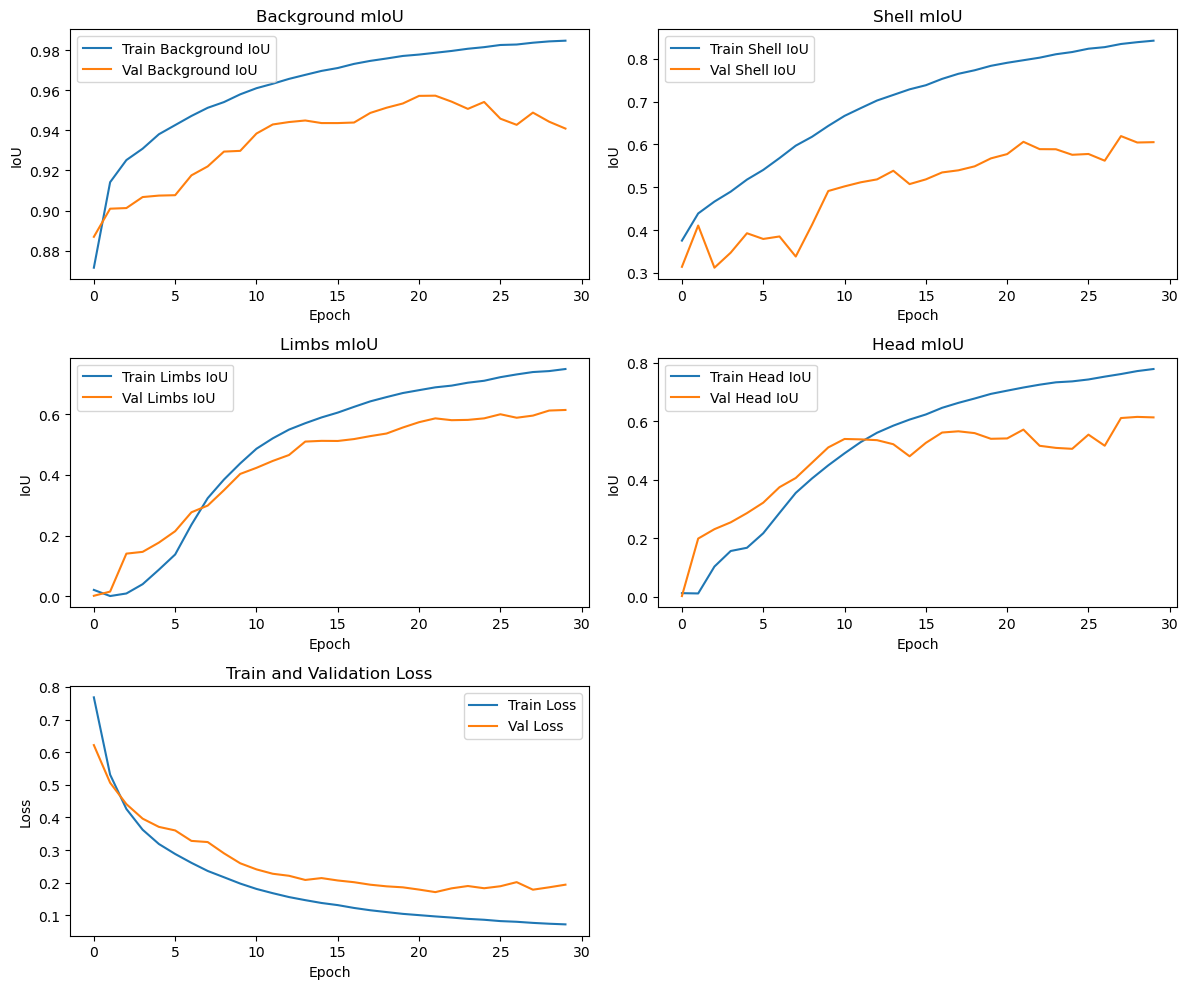

In [8]:
# Plot training process curves

# Load history data
with open('history.json', 'r') as f:
    history = json.load(f)

# Plot IoU curves for each class
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot IoU curves for each class
for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

# Plot training and validation loss curves
ax_loss = axes[2, 0]  # Subplot in the 3rd row, 1st column
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

# Hide the empty subplot in the 3rd row, 2nd column
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



### 4.4 DeepLabV3

In [11]:
# Initialize model, loss function, and optimizer
target_size = (256, 256)
set_seed(42)
model = DeepLabV3(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')  

def calculate_iou_per_class(y_true, y_pred, num_classes=4):
    ious = []
    for class_id in range(num_classes):
        true_class = (y_true == class_id).float()
        pred_class = (y_pred == class_id).float()

        intersection = (true_class * pred_class).sum().item()
        union = true_class.sum().item() + pred_class.sum().item() - intersection

        if union == 0:
            iou = float('nan')  
        else:
            iou = intersection / union

        ious.append(iou)
    return ious  


best_val_loss = float('inf')  
history_DeepLabV3 = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}


for epoch in range(epochs):
    model.train()  
    train_loss = 0.0
    train_ious = np.zeros(num_classes)  

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            
            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious)  

            
            avg_iou = np.nanmean(batch_ious) 
            t.set_postfix(loss=loss.item(), iou=avg_iou)


    train_ious /= len(train_loader)
    for i in range(num_classes):
        history_DeepLabV3['train_iou'][i].append(train_ious[i])


    train_loss /= len(train_loader)
    history_DeepLabV3['train_loss'].append(train_loss)

    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    val_ious /= len(val_loader)
    for i in range(num_classes):
        history_DeepLabV3['val_iou'][i].append(val_ious[i])

    val_loss /= len(val_loader)
    history_DeepLabV3['val_loss'].append(val_loss)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]:.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_DeepLabV3_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

with open('history_DeepLabV3.json', 'w') as f:
    json.dump(history_DeepLabV3, f)

Epoch 1/30: 100%|██████████| 166/166 [09:17<00:00,  3.36s/it, iou=0.681, loss=0.271]


Epoch 1/30, Train Loss: 0.3941, Val Loss: 0.2013, Time: 640.98s
Train IoU - Background: 0.9621, Shell: 0.7626, Limbs: 0.5346, Head: 0.4913
Val IoU - Background: 0.9801, Shell: 0.8034, Limbs: 0.6976, Head: 0.7129
Saved best model with Val Loss: 0.2013


Epoch 2/30: 100%|██████████| 166/166 [09:33<00:00,  3.46s/it, iou=0.759, loss=0.153] 


Epoch 2/30, Train Loss: 0.1347, Val Loss: 0.1083, Time: 658.64s
Train IoU - Background: 0.9858, Shell: 0.8896, Limbs: 0.7355, Head: 0.7918
Val IoU - Background: 0.9859, Shell: 0.8539, Limbs: 0.7483, Head: 0.7811
Saved best model with Val Loss: 0.1083


Epoch 3/30: 100%|██████████| 166/166 [09:32<00:00,  3.45s/it, iou=0.808, loss=0.115] 


Epoch 3/30, Train Loss: 0.0832, Val Loss: 0.0774, Time: 657.86s
Train IoU - Background: 0.9881, Shell: 0.9105, Limbs: 0.7823, Head: 0.8347
Val IoU - Background: 0.9884, Shell: 0.8746, Limbs: 0.7662, Head: 0.8141
Saved best model with Val Loss: 0.0774


Epoch 4/30: 100%|██████████| 166/166 [09:32<00:00,  3.45s/it, iou=0.898, loss=0.0715]


Epoch 4/30, Train Loss: 0.0606, Val Loss: 0.0610, Time: 654.23s
Train IoU - Background: 0.9898, Shell: 0.9247, Limbs: 0.8125, Head: 0.8636
Val IoU - Background: 0.9897, Shell: 0.8927, Limbs: 0.7875, Head: 0.8662
Saved best model with Val Loss: 0.0610


Epoch 5/30: 100%|██████████| 166/166 [08:08<00:00,  2.95s/it, iou=0.917, loss=0.0578]


Epoch 5/30, Train Loss: 0.0470, Val Loss: 0.0535, Time: 558.42s
Train IoU - Background: 0.9913, Shell: 0.9363, Limbs: 0.8394, Head: 0.8874
Val IoU - Background: 0.9899, Shell: 0.8992, Limbs: 0.7981, Head: 0.8687
Saved best model with Val Loss: 0.0535


Epoch 6/30: 100%|██████████| 166/166 [08:05<00:00,  2.93s/it, iou=0.916, loss=0.0533]


Epoch 6/30, Train Loss: 0.0422, Val Loss: 0.0552, Time: 556.65s
Train IoU - Background: 0.9912, Shell: 0.9381, Limbs: 0.8434, Head: 0.8943
Val IoU - Background: 0.9888, Shell: 0.8863, Limbs: 0.7951, Head: 0.8666


Epoch 7/30: 100%|██████████| 166/166 [08:04<00:00,  2.92s/it, iou=0.934, loss=0.045] 


Epoch 7/30, Train Loss: 0.0357, Val Loss: 0.0474, Time: 555.00s
Train IoU - Background: 0.9923, Shell: 0.9459, Limbs: 0.8608, Head: 0.9046
Val IoU - Background: 0.9903, Shell: 0.9033, Limbs: 0.8084, Head: 0.8801
Saved best model with Val Loss: 0.0474


Epoch 8/30: 100%|██████████| 166/166 [08:06<00:00,  2.93s/it, iou=0.94, loss=0.0402] 


Epoch 8/30, Train Loss: 0.0311, Val Loss: 0.0465, Time: 557.06s
Train IoU - Background: 0.9930, Shell: 0.9518, Limbs: 0.8756, Head: 0.9146
Val IoU - Background: 0.9907, Shell: 0.9030, Limbs: 0.8128, Head: 0.8811
Saved best model with Val Loss: 0.0465


Epoch 9/30: 100%|██████████| 166/166 [08:04<00:00,  2.92s/it, iou=0.946, loss=0.0365]


Epoch 9/30, Train Loss: 0.0281, Val Loss: 0.0460, Time: 553.33s
Train IoU - Background: 0.9934, Shell: 0.9554, Limbs: 0.8850, Head: 0.9205
Val IoU - Background: 0.9907, Shell: 0.9017, Limbs: 0.8126, Head: 0.8862
Saved best model with Val Loss: 0.0460


Epoch 10/30: 100%|██████████| 166/166 [08:07<00:00,  2.94s/it, iou=0.95, loss=0.0338] 


Epoch 10/30, Train Loss: 0.0258, Val Loss: 0.0450, Time: 557.67s
Train IoU - Background: 0.9937, Shell: 0.9581, Limbs: 0.8919, Head: 0.9246
Val IoU - Background: 0.9908, Shell: 0.9050, Limbs: 0.8133, Head: 0.8858
Saved best model with Val Loss: 0.0450


Epoch 11/30: 100%|██████████| 166/166 [08:06<00:00,  2.93s/it, iou=0.949, loss=0.0323]


Epoch 11/30, Train Loss: 0.0242, Val Loss: 0.0454, Time: 557.21s
Train IoU - Background: 0.9939, Shell: 0.9596, Limbs: 0.8968, Head: 0.9259
Val IoU - Background: 0.9908, Shell: 0.9024, Limbs: 0.8149, Head: 0.8820


Epoch 12/30: 100%|██████████| 166/166 [08:06<00:00,  2.93s/it, iou=0.951, loss=0.0306]


Epoch 12/30, Train Loss: 0.0229, Val Loss: 0.0457, Time: 556.15s
Train IoU - Background: 0.9941, Shell: 0.9612, Limbs: 0.9005, Head: 0.9286
Val IoU - Background: 0.9910, Shell: 0.9008, Limbs: 0.8137, Head: 0.8737


Epoch 13/30: 100%|██████████| 166/166 [08:05<00:00,  2.93s/it, iou=0.953, loss=0.0291]


Epoch 13/30, Train Loss: 0.0218, Val Loss: 0.0466, Time: 555.18s
Train IoU - Background: 0.9943, Shell: 0.9622, Limbs: 0.9036, Head: 0.9299
Val IoU - Background: 0.9909, Shell: 0.8989, Limbs: 0.8141, Head: 0.8684


Epoch 14/30: 100%|██████████| 166/166 [08:04<00:00,  2.92s/it, iou=0.954, loss=0.028] 


Epoch 14/30, Train Loss: 0.0209, Val Loss: 0.0448, Time: 554.59s
Train IoU - Background: 0.9943, Shell: 0.9633, Limbs: 0.9063, Head: 0.9320
Val IoU - Background: 0.9910, Shell: 0.9019, Limbs: 0.8188, Head: 0.8816
Saved best model with Val Loss: 0.0448


Epoch 15/30: 100%|██████████| 166/166 [08:07<00:00,  2.94s/it, iou=0.957, loss=0.0269]


Epoch 15/30, Train Loss: 0.0204, Val Loss: 0.0438, Time: 557.59s
Train IoU - Background: 0.9943, Shell: 0.9633, Limbs: 0.9064, Head: 0.9326
Val IoU - Background: 0.9910, Shell: 0.9043, Limbs: 0.8209, Head: 0.8844
Saved best model with Val Loss: 0.0438


Epoch 16/30: 100%|██████████| 166/166 [08:08<00:00,  2.94s/it, iou=0.95, loss=0.0285] 


Epoch 16/30, Train Loss: 0.0206, Val Loss: 0.0424, Time: 558.96s
Train IoU - Background: 0.9939, Shell: 0.9615, Limbs: 0.9037, Head: 0.9293
Val IoU - Background: 0.9911, Shell: 0.9084, Limbs: 0.8209, Head: 0.8898
Saved best model with Val Loss: 0.0424


Epoch 17/30: 100%|██████████| 166/166 [08:05<00:00,  2.92s/it, iou=0.954, loss=0.026] 


Epoch 17/30, Train Loss: 0.0207, Val Loss: 0.0431, Time: 555.85s
Train IoU - Background: 0.9937, Shell: 0.9604, Limbs: 0.9022, Head: 0.9288
Val IoU - Background: 0.9908, Shell: 0.9044, Limbs: 0.8228, Head: 0.8856


Epoch 18/30: 100%|██████████| 166/166 [08:08<00:00,  2.94s/it, iou=0.955, loss=0.0252]


Epoch 18/30, Train Loss: 0.0195, Val Loss: 0.0424, Time: 558.87s
Train IoU - Background: 0.9942, Shell: 0.9631, Limbs: 0.9083, Head: 0.9337
Val IoU - Background: 0.9912, Shell: 0.9078, Limbs: 0.8243, Head: 0.8737


Epoch 19/30: 100%|██████████| 166/166 [08:07<00:00,  2.93s/it, iou=0.958, loss=0.0237]


Epoch 19/30, Train Loss: 0.0182, Val Loss: 0.0428, Time: 557.42s
Train IoU - Background: 0.9947, Shell: 0.9661, Limbs: 0.9142, Head: 0.9383
Val IoU - Background: 0.9910, Shell: 0.9078, Limbs: 0.8240, Head: 0.8792


Epoch 20/30: 100%|██████████| 166/166 [08:06<00:00,  2.93s/it, iou=0.96, loss=0.0228] 


Epoch 20/30, Train Loss: 0.0172, Val Loss: 0.0433, Time: 556.69s
Train IoU - Background: 0.9951, Shell: 0.9683, Limbs: 0.9189, Head: 0.9427
Val IoU - Background: 0.9911, Shell: 0.9075, Limbs: 0.8249, Head: 0.8871


Epoch 21/30: 100%|██████████| 166/166 [08:05<00:00,  2.92s/it, iou=0.964, loss=0.0218]


Epoch 21/30, Train Loss: 0.0165, Val Loss: 0.0431, Time: 554.58s
Train IoU - Background: 0.9952, Shell: 0.9695, Limbs: 0.9224, Head: 0.9458
Val IoU - Background: 0.9914, Shell: 0.9087, Limbs: 0.8288, Head: 0.8908


Epoch 22/30: 100%|██████████| 166/166 [08:06<00:00,  2.93s/it, iou=0.966, loss=0.0211]


Epoch 22/30, Train Loss: 0.0160, Val Loss: 0.0433, Time: 554.29s
Train IoU - Background: 0.9953, Shell: 0.9703, Limbs: 0.9241, Head: 0.9476
Val IoU - Background: 0.9913, Shell: 0.9085, Limbs: 0.8294, Head: 0.8933


Epoch 23/30: 100%|██████████| 166/166 [08:02<00:00,  2.90s/it, iou=0.965, loss=0.0207]


Epoch 23/30, Train Loss: 0.0157, Val Loss: 0.0428, Time: 551.26s
Train IoU - Background: 0.9953, Shell: 0.9707, Limbs: 0.9258, Head: 0.9482
Val IoU - Background: 0.9913, Shell: 0.9089, Limbs: 0.8308, Head: 0.8941


Epoch 24/30: 100%|██████████| 166/166 [08:02<00:00,  2.91s/it, iou=0.963, loss=0.0208]


Epoch 24/30, Train Loss: 0.0154, Val Loss: 0.0436, Time: 552.64s
Train IoU - Background: 0.9953, Shell: 0.9709, Limbs: 0.9270, Head: 0.9482
Val IoU - Background: 0.9912, Shell: 0.9080, Limbs: 0.8289, Head: 0.8924


Epoch 25/30: 100%|██████████| 166/166 [08:05<00:00,  2.93s/it, iou=0.964, loss=0.0202]


Epoch 25/30, Train Loss: 0.0153, Val Loss: 0.0433, Time: 555.45s
Train IoU - Background: 0.9953, Shell: 0.9709, Limbs: 0.9270, Head: 0.9471
Val IoU - Background: 0.9913, Shell: 0.9088, Limbs: 0.8307, Head: 0.8928


Epoch 26/30: 100%|██████████| 166/166 [08:02<00:00,  2.91s/it, iou=0.964, loss=0.0202]


Epoch 26/30, Train Loss: 0.0152, Val Loss: 0.0447, Time: 552.16s
Train IoU - Background: 0.9952, Shell: 0.9707, Limbs: 0.9265, Head: 0.9466
Val IoU - Background: 0.9914, Shell: 0.9073, Limbs: 0.8262, Head: 0.8850


Epoch 27/30: 100%|██████████| 166/166 [08:04<00:00,  2.92s/it, iou=0.965, loss=0.0198]


Epoch 27/30, Train Loss: 0.0152, Val Loss: 0.0447, Time: 553.57s
Train IoU - Background: 0.9951, Shell: 0.9705, Limbs: 0.9247, Head: 0.9456
Val IoU - Background: 0.9914, Shell: 0.9092, Limbs: 0.8202, Head: 0.8763


Epoch 28/30: 100%|██████████| 166/166 [08:04<00:00,  2.92s/it, iou=0.968, loss=0.0189]


Epoch 28/30, Train Loss: 0.0151, Val Loss: 0.0445, Time: 553.70s
Train IoU - Background: 0.9952, Shell: 0.9704, Limbs: 0.9241, Head: 0.9465
Val IoU - Background: 0.9913, Shell: 0.9097, Limbs: 0.8244, Head: 0.8752


Epoch 29/30: 100%|██████████| 166/166 [08:05<00:00,  2.92s/it, iou=0.967, loss=0.0186]


Epoch 29/30, Train Loss: 0.0146, Val Loss: 0.0449, Time: 555.25s
Train IoU - Background: 0.9954, Shell: 0.9711, Limbs: 0.9273, Head: 0.9485
Val IoU - Background: 0.9913, Shell: 0.9104, Limbs: 0.8252, Head: 0.8838


Epoch 30/30: 100%|██████████| 166/166 [08:05<00:00,  2.93s/it, iou=0.968, loss=0.018]  


Epoch 30/30, Train Loss: 0.0141, Val Loss: 0.0448, Time: 555.89s
Train IoU - Background: 0.9956, Shell: 0.9726, Limbs: 0.9304, Head: 0.9516
Val IoU - Background: 0.9916, Shell: 0.9108, Limbs: 0.8294, Head: 0.8897
Training complete.


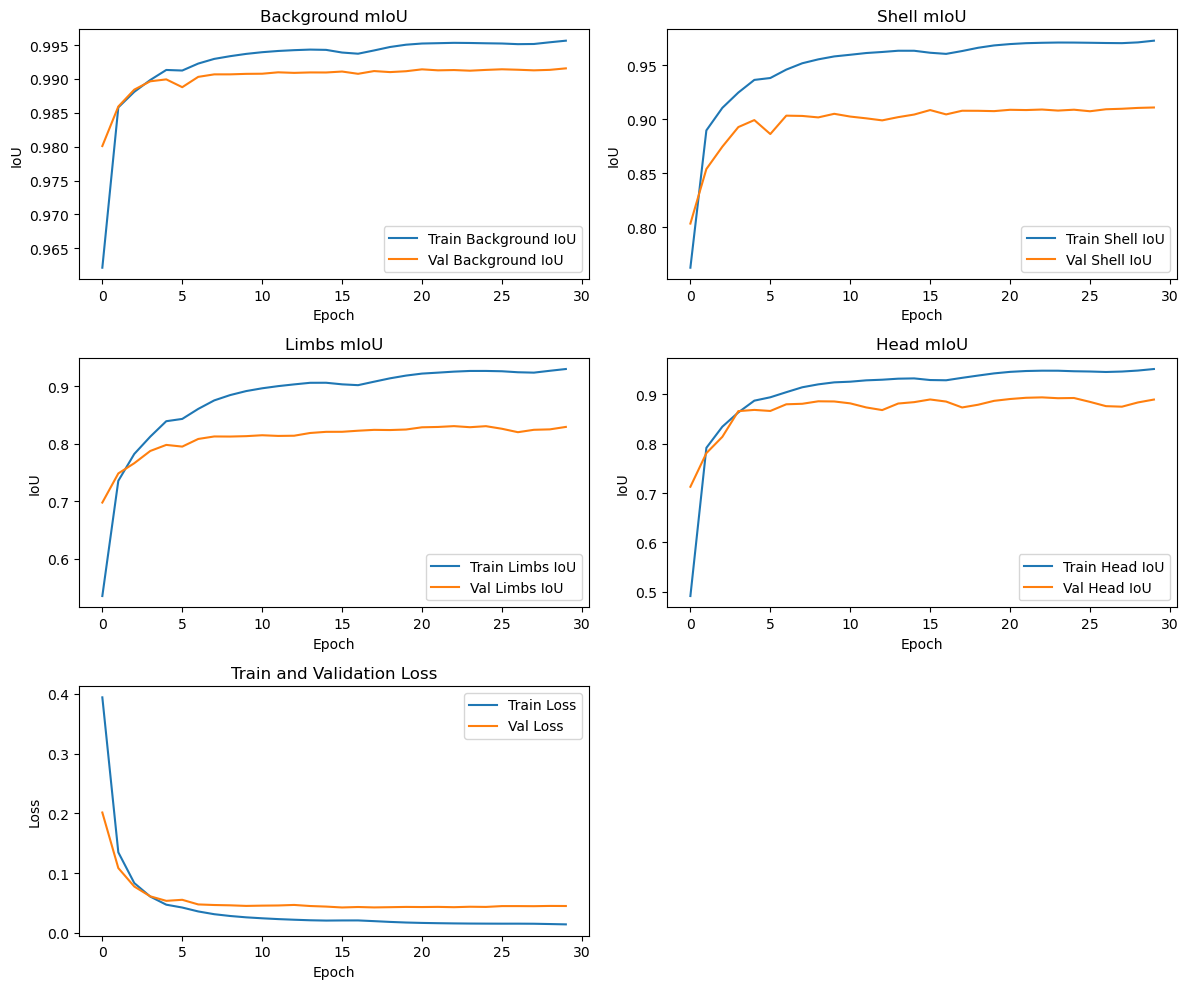

In [13]:

with open('history_DeepLabV3.json', 'r') as f:
    history = json.load(f)


fig, axes = plt.subplots(3, 2, figsize=(12, 10))


for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

ax_loss = axes[2, 0]  
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### 4.5 DeepLabV3Plus

In [7]:
# Initialize model, loss function, and optimizer
target_size = (256, 256)
set_seed(42)
model = DeepLabV3Plus(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')  

history_DeepLabV3Plus = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}

for epoch in range(epochs):
    model.train() 
    train_loss = 0.0
    train_ious = np.zeros(num_classes) 

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious)  

            avg_iou = np.nanmean(batch_ious)  
            t.set_postfix(loss=loss.item(), iou=avg_iou)

    train_ious /= len(train_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus['train_iou'][i].append(train_ious[i])

    train_loss /= len(train_loader)
    history_DeepLabV3Plus['train_loss'].append(train_loss)

    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    val_ious /= len(val_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus['val_iou'][i].append(val_ious[i])

    val_loss /= len(val_loader)
    history_DeepLabV3Plus['val_loss'].append(val_loss)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]:.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_DeepLabV3Plus_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

with open('history_DeepLabV3Plus.json', 'w') as f:
    json.dump(history_DeepLabV3Plus, f)

Epoch 1/30: 100%|██████████| 166/166 [07:35<00:00,  2.75s/it, iou=0.712, loss=0.226] 


Epoch 1/30, Train Loss: 0.2418, Val Loss: 0.1201, Time: 533.90s
Train IoU - Background: 0.9674, Shell: 0.7993, Limbs: 0.6033, Head: 0.6030
Val IoU - Background: 0.9808, Shell: 0.7960, Limbs: 0.7019, Head: 0.7447
Saved best model with Val Loss: 0.1201


Epoch 2/30: 100%|██████████| 166/166 [07:24<00:00,  2.68s/it, iou=0.837, loss=0.0919]


Epoch 2/30, Train Loss: 0.0779, Val Loss: 0.0677, Time: 520.44s
Train IoU - Background: 0.9875, Shell: 0.8990, Limbs: 0.7572, Head: 0.8153
Val IoU - Background: 0.9886, Shell: 0.8718, Limbs: 0.7674, Head: 0.8123
Saved best model with Val Loss: 0.0677


Epoch 3/30: 100%|██████████| 166/166 [07:21<00:00,  2.66s/it, iou=0.844, loss=0.0716]


Epoch 3/30, Train Loss: 0.0504, Val Loss: 0.0657, Time: 514.91s
Train IoU - Background: 0.9901, Shell: 0.9214, Limbs: 0.8082, Head: 0.8633
Val IoU - Background: 0.9872, Shell: 0.8544, Limbs: 0.7677, Head: 0.8021
Saved best model with Val Loss: 0.0657


Epoch 4/30: 100%|██████████| 166/166 [07:19<00:00,  2.65s/it, iou=0.823, loss=0.0863]


Epoch 4/30, Train Loss: 0.0464, Val Loss: 0.0677, Time: 516.18s
Train IoU - Background: 0.9901, Shell: 0.9151, Limbs: 0.8180, Head: 0.8503
Val IoU - Background: 0.9864, Shell: 0.8431, Limbs: 0.7694, Head: 0.7819


Epoch 5/30: 100%|██████████| 166/166 [07:32<00:00,  2.73s/it, iou=0.91, loss=0.0443] 


Epoch 5/30, Train Loss: 0.0367, Val Loss: 0.0590, Time: 530.75s
Train IoU - Background: 0.9919, Shell: 0.9310, Limbs: 0.8422, Head: 0.8766
Val IoU - Background: 0.9872, Shell: 0.8712, Limbs: 0.7930, Head: 0.8510
Saved best model with Val Loss: 0.0590


Epoch 6/30: 100%|██████████| 166/166 [07:37<00:00,  2.75s/it, iou=0.925, loss=0.0362]


Epoch 6/30, Train Loss: 0.0292, Val Loss: 0.0447, Time: 536.98s
Train IoU - Background: 0.9932, Shell: 0.9437, Limbs: 0.8631, Head: 0.9012
Val IoU - Background: 0.9906, Shell: 0.8975, Limbs: 0.8146, Head: 0.8758
Saved best model with Val Loss: 0.0447


Epoch 7/30: 100%|██████████| 166/166 [07:30<00:00,  2.71s/it, iou=0.944, loss=0.0285]


Epoch 7/30, Train Loss: 0.0240, Val Loss: 0.0413, Time: 527.07s
Train IoU - Background: 0.9941, Shell: 0.9532, Limbs: 0.8840, Head: 0.9188
Val IoU - Background: 0.9917, Shell: 0.9038, Limbs: 0.8254, Head: 0.8866
Saved best model with Val Loss: 0.0413


Epoch 8/30: 100%|██████████| 166/166 [07:20<00:00,  2.66s/it, iou=0.953, loss=0.0246]


Epoch 8/30, Train Loss: 0.0206, Val Loss: 0.0414, Time: 516.48s
Train IoU - Background: 0.9946, Shell: 0.9595, Limbs: 0.8999, Head: 0.9296
Val IoU - Background: 0.9915, Shell: 0.9062, Limbs: 0.8310, Head: 0.8890


Epoch 9/30: 100%|██████████| 166/166 [07:28<00:00,  2.70s/it, iou=0.96, loss=0.0218] 


Epoch 9/30, Train Loss: 0.0184, Val Loss: 0.0422, Time: 524.87s
Train IoU - Background: 0.9950, Shell: 0.9637, Limbs: 0.9094, Head: 0.9371
Val IoU - Background: 0.9918, Shell: 0.9074, Limbs: 0.8300, Head: 0.8892


Epoch 10/30: 100%|██████████| 166/166 [07:22<00:00,  2.67s/it, iou=0.963, loss=0.0202]


Epoch 10/30, Train Loss: 0.0172, Val Loss: 0.0420, Time: 519.73s
Train IoU - Background: 0.9952, Shell: 0.9658, Limbs: 0.9149, Head: 0.9411
Val IoU - Background: 0.9919, Shell: 0.9078, Limbs: 0.8341, Head: 0.8928


Epoch 11/30: 100%|██████████| 166/166 [07:31<00:00,  2.72s/it, iou=0.965, loss=0.0194]


Epoch 11/30, Train Loss: 0.0164, Val Loss: 0.0444, Time: 525.85s
Train IoU - Background: 0.9953, Shell: 0.9671, Limbs: 0.9183, Head: 0.9426
Val IoU - Background: 0.9917, Shell: 0.9065, Limbs: 0.8270, Head: 0.8886


Epoch 12/30: 100%|██████████| 166/166 [07:21<00:00,  2.66s/it, iou=0.96, loss=0.0203] 


Epoch 12/30, Train Loss: 0.0163, Val Loss: 0.0425, Time: 516.44s
Train IoU - Background: 0.9952, Shell: 0.9665, Limbs: 0.9161, Head: 0.9423
Val IoU - Background: 0.9921, Shell: 0.9072, Limbs: 0.8377, Head: 0.8928


Epoch 13/30: 100%|██████████| 166/166 [07:20<00:00,  2.65s/it, iou=0.964, loss=0.0189]


Epoch 13/30, Train Loss: 0.0158, Val Loss: 0.0416, Time: 516.84s
Train IoU - Background: 0.9954, Shell: 0.9670, Limbs: 0.9210, Head: 0.9384
Val IoU - Background: 0.9922, Shell: 0.9080, Limbs: 0.8405, Head: 0.8917


Epoch 14/30: 100%|██████████| 166/166 [07:19<00:00,  2.64s/it, iou=0.96, loss=0.0192]  


Epoch 14/30, Train Loss: 0.0147, Val Loss: 0.0434, Time: 514.02s
Train IoU - Background: 0.9957, Shell: 0.9688, Limbs: 0.9273, Head: 0.9396
Val IoU - Background: 0.9922, Shell: 0.9046, Limbs: 0.8399, Head: 0.8877


Epoch 15/30: 100%|██████████| 166/166 [07:33<00:00,  2.73s/it, iou=0.967, loss=0.0172] 


Epoch 15/30, Train Loss: 0.0137, Val Loss: 0.0456, Time: 533.13s
Train IoU - Background: 0.9961, Shell: 0.9707, Limbs: 0.9333, Head: 0.9416
Val IoU - Background: 0.9921, Shell: 0.9024, Limbs: 0.8380, Head: 0.8833


Epoch 16/30: 100%|██████████| 166/166 [07:35<00:00,  2.74s/it, iou=0.97, loss=0.0161]  


Epoch 16/30, Train Loss: 0.0130, Val Loss: 0.0454, Time: 533.05s
Train IoU - Background: 0.9964, Shell: 0.9715, Limbs: 0.9366, Head: 0.9428
Val IoU - Background: 0.9921, Shell: 0.9036, Limbs: 0.8385, Head: 0.8818


Epoch 17/30: 100%|██████████| 166/166 [07:51<00:00,  2.84s/it, iou=0.972, loss=0.0151] 


Epoch 17/30, Train Loss: 0.0123, Val Loss: 0.0462, Time: 555.69s
Train IoU - Background: 0.9965, Shell: 0.9727, Limbs: 0.9380, Head: 0.9493
Val IoU - Background: 0.9921, Shell: 0.9034, Limbs: 0.8372, Head: 0.8803


Epoch 18/30: 100%|██████████| 166/166 [07:43<00:00,  2.80s/it, iou=0.975, loss=0.0141] 


Epoch 18/30, Train Loss: 0.0118, Val Loss: 0.0468, Time: 539.12s
Train IoU - Background: 0.9966, Shell: 0.9741, Limbs: 0.9399, Head: 0.9540
Val IoU - Background: 0.9922, Shell: 0.9039, Limbs: 0.8388, Head: 0.8800


Epoch 19/30: 100%|██████████| 166/166 [07:24<00:00,  2.68s/it, iou=0.974, loss=0.0141] 


Epoch 19/30, Train Loss: 0.0117, Val Loss: 0.0488, Time: 520.87s
Train IoU - Background: 0.9965, Shell: 0.9742, Limbs: 0.9398, Head: 0.9549
Val IoU - Background: 0.9921, Shell: 0.9020, Limbs: 0.8373, Head: 0.8796


Epoch 20/30: 100%|██████████| 166/166 [07:27<00:00,  2.69s/it, iou=0.974, loss=0.0139] 


Epoch 20/30, Train Loss: 0.0115, Val Loss: 0.0480, Time: 522.87s
Train IoU - Background: 0.9964, Shell: 0.9748, Limbs: 0.9410, Head: 0.9560
Val IoU - Background: 0.9920, Shell: 0.9031, Limbs: 0.8370, Head: 0.8869


Epoch 21/30: 100%|██████████| 166/166 [07:27<00:00,  2.70s/it, iou=0.975, loss=0.0133] 


Epoch 21/30, Train Loss: 0.0115, Val Loss: 0.0475, Time: 523.32s
Train IoU - Background: 0.9964, Shell: 0.9749, Limbs: 0.9418, Head: 0.9551
Val IoU - Background: 0.9920, Shell: 0.9045, Limbs: 0.8386, Head: 0.8950


Epoch 22/30: 100%|██████████| 166/166 [07:22<00:00,  2.67s/it, iou=0.972, loss=0.0139] 


Epoch 22/30, Train Loss: 0.0114, Val Loss: 0.0477, Time: 519.38s
Train IoU - Background: 0.9964, Shell: 0.9747, Limbs: 0.9425, Head: 0.9542
Val IoU - Background: 0.9915, Shell: 0.9036, Limbs: 0.8316, Head: 0.8937


Epoch 23/30: 100%|██████████| 166/166 [07:25<00:00,  2.69s/it, iou=0.976, loss=0.0127] 


Epoch 23/30, Train Loss: 0.0109, Val Loss: 0.0470, Time: 521.14s
Train IoU - Background: 0.9966, Shell: 0.9760, Limbs: 0.9452, Head: 0.9552
Val IoU - Background: 0.9918, Shell: 0.9077, Limbs: 0.8346, Head: 0.8963


Epoch 24/30: 100%|██████████| 166/166 [07:24<00:00,  2.67s/it, iou=0.977, loss=0.0122] 


Epoch 24/30, Train Loss: 0.0103, Val Loss: 0.0463, Time: 519.10s
Train IoU - Background: 0.9968, Shell: 0.9773, Limbs: 0.9492, Head: 0.9576
Val IoU - Background: 0.9922, Shell: 0.9105, Limbs: 0.8389, Head: 0.9006


Epoch 25/30: 100%|██████████| 166/166 [07:25<00:00,  2.68s/it, iou=0.978, loss=0.0116] 


Epoch 25/30, Train Loss: 0.0099, Val Loss: 0.0467, Time: 521.39s
Train IoU - Background: 0.9969, Shell: 0.9781, Limbs: 0.9512, Head: 0.9597
Val IoU - Background: 0.9924, Shell: 0.9090, Limbs: 0.8414, Head: 0.8945


Epoch 26/30: 100%|██████████| 166/166 [07:28<00:00,  2.70s/it, iou=0.979, loss=0.0113] 


Epoch 26/30, Train Loss: 0.0099, Val Loss: 0.0478, Time: 524.59s
Train IoU - Background: 0.9969, Shell: 0.9782, Limbs: 0.9507, Head: 0.9599
Val IoU - Background: 0.9923, Shell: 0.9087, Limbs: 0.8407, Head: 0.8937


Epoch 27/30: 100%|██████████| 166/166 [07:37<00:00,  2.76s/it, iou=0.978, loss=0.0114] 


Epoch 27/30, Train Loss: 0.0097, Val Loss: 0.0477, Time: 536.42s
Train IoU - Background: 0.9969, Shell: 0.9787, Limbs: 0.9509, Head: 0.9610
Val IoU - Background: 0.9924, Shell: 0.9080, Limbs: 0.8397, Head: 0.8965


Epoch 28/30: 100%|██████████| 166/166 [07:30<00:00,  2.72s/it, iou=0.978, loss=0.0115] 


Epoch 28/30, Train Loss: 0.0098, Val Loss: 0.0476, Time: 526.99s
Train IoU - Background: 0.9968, Shell: 0.9780, Limbs: 0.9508, Head: 0.9609
Val IoU - Background: 0.9924, Shell: 0.9080, Limbs: 0.8419, Head: 0.8975


Epoch 29/30: 100%|██████████| 166/166 [07:22<00:00,  2.66s/it, iou=0.979, loss=0.0112] 


Epoch 29/30, Train Loss: 0.0099, Val Loss: 0.0470, Time: 520.21s
Train IoU - Background: 0.9968, Shell: 0.9774, Limbs: 0.9496, Head: 0.9612
Val IoU - Background: 0.9925, Shell: 0.9090, Limbs: 0.8438, Head: 0.8944


Epoch 30/30: 100%|██████████| 166/166 [07:37<00:00,  2.75s/it, iou=0.978, loss=0.0113] 


Epoch 30/30, Train Loss: 0.0098, Val Loss: 0.0466, Time: 541.43s
Train IoU - Background: 0.9968, Shell: 0.9778, Limbs: 0.9488, Head: 0.9620
Val IoU - Background: 0.9925, Shell: 0.9091, Limbs: 0.8449, Head: 0.8942
Training complete.


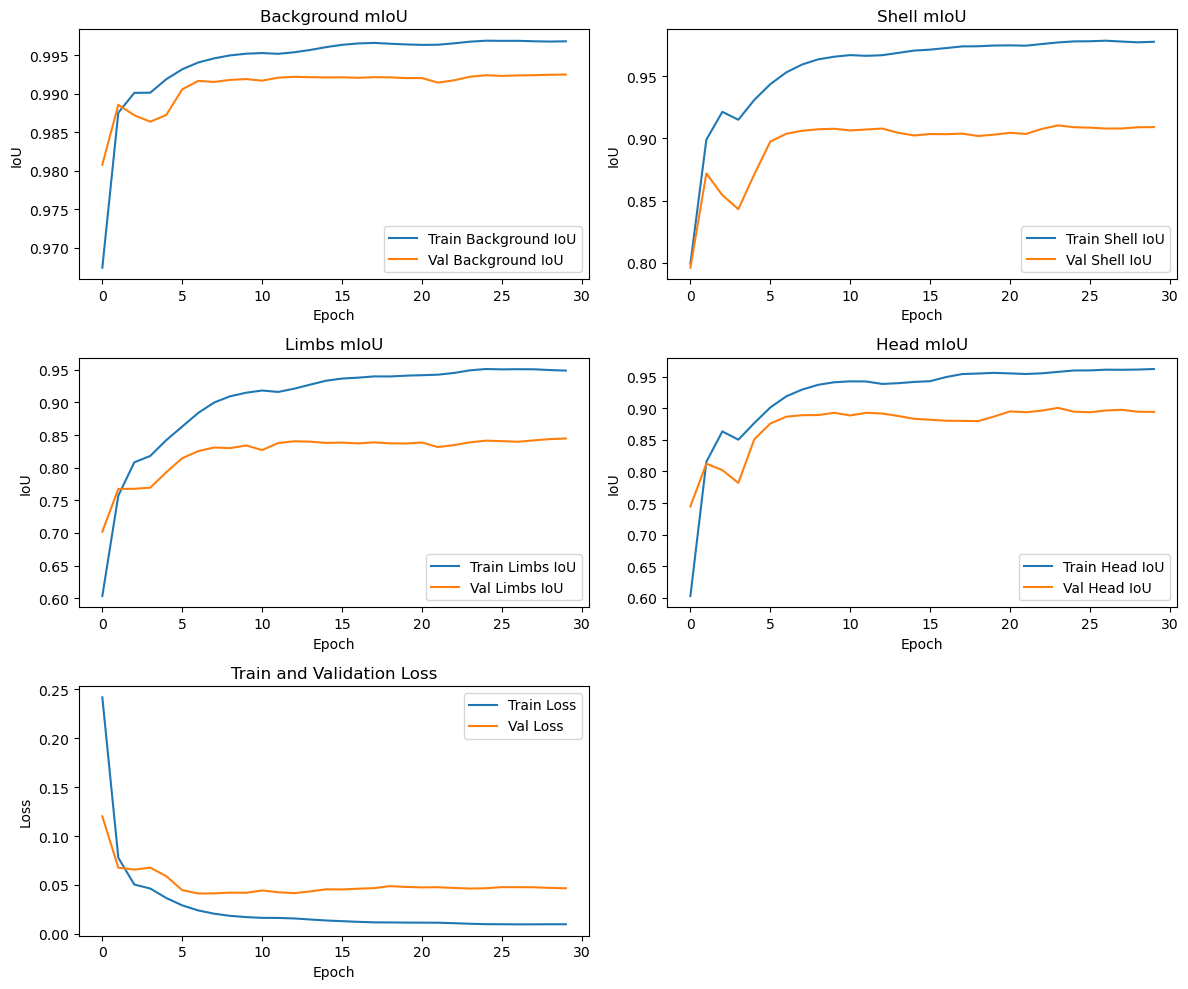

In [10]:

with open('history_DeepLabV3Plus.json', 'r') as f:
    history = json.load(f)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

ax_loss = axes[2, 0]  
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### 4.6 DeepLabV3Plus_MobileNetV2

In [14]:
# Train the model
target_size = (256, 256)
# Initialize model, loss function, and optimizer
set_seed(42)
model = DeepLabV3Plus_MobileNetV2(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  # Use AMSGrad for improved stability

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # Ensure consistency

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')  # Initialize best validation loss


history_DeepLabV3Plus_MobileNetV2 = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  # Record IoU for each class
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}

# Start training loop
for epoch in range(epochs):
    model.train()  # Set to training mode
    train_loss = 0.0
    train_ious = np.zeros(num_classes)  # Accumulate IoU for each class

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Calculate IoU for each class and accumulate
            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious)  # Ignore NaN and accumulate

            # Display current batch loss and IoU on progress bar
            avg_iou = np.nanmean(batch_ious)  # Average IoU for current batch
            t.set_postfix(loss=loss.item(), iou=avg_iou)

    # Calculate average IoU for each class
    train_ious /= len(train_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_MobileNetV2['train_iou'][i].append(train_ious[i])

    # Calculate average training loss
    train_loss /= len(train_loader)
    history_DeepLabV3Plus_MobileNetV2['train_loss'].append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    # Calculate average validation IoU for each class
    val_ious /= len(val_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_MobileNetV2['val_iou'][i].append(val_ious[i])

    # Calculate average validation loss
    val_loss /= len(val_loader)
    history_DeepLabV3Plus_MobileNetV2['val_loss'].append(val_loss)

    # Print log
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]::.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    # Save model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_DeepLabV3Plus_MobileNetV2_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

# Save training history as JSON file
with open('history_DeepLabV3Plus_MobileNetV2.json', 'w') as f:
    json.dump(history_DeepLabV3Plus_MobileNetV2, f)


Epoch 1/30: 100%|██████████| 166/166 [06:04<00:00,  2.19s/it, iou=0.581, loss=0.256]


Epoch 1/30, Train Loss: 0.2801, Val Loss: 0.1711, Time: 436.43s
Train IoU - Background: 0.9485, Shell: 0.6993, Limbs: 0.3967, Head: 0.4606
Val IoU - Background: 0.9727, Shell: 0.6683, Limbs: 0.5442, Head: 0.5081
Saved best model with Val Loss: 0.1711


Epoch 2/30: 100%|██████████| 166/166 [05:50<00:00,  2.11s/it, iou=0.718, loss=0.155] 


Epoch 2/30, Train Loss: 0.1132, Val Loss: 0.1148, Time: 419.76s
Train IoU - Background: 0.9760, Shell: 0.8260, Limbs: 0.5899, Head: 0.6834
Val IoU - Background: 0.9809, Shell: 0.7359, Limbs: 0.6326, Head: 0.5818
Saved best model with Val Loss: 0.1148


Epoch 3/30: 100%|██████████| 166/166 [05:49<00:00,  2.10s/it, iou=0.803, loss=0.101] 


Epoch 3/30, Train Loss: 0.0751, Val Loss: 0.0848, Time: 417.26s
Train IoU - Background: 0.9835, Shell: 0.8734, Limbs: 0.6852, Head: 0.7648
Val IoU - Background: 0.9837, Shell: 0.8013, Limbs: 0.6677, Head: 0.6984
Saved best model with Val Loss: 0.0848


Epoch 4/30: 100%|██████████| 166/166 [05:51<00:00,  2.12s/it, iou=0.856, loss=0.0719]


Epoch 4/30, Train Loss: 0.0572, Val Loss: 0.0708, Time: 421.66s
Train IoU - Background: 0.9870, Shell: 0.8984, Limbs: 0.7382, Head: 0.8154
Val IoU - Background: 0.9855, Shell: 0.8313, Limbs: 0.6909, Head: 0.7430
Saved best model with Val Loss: 0.0708


Epoch 5/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.875, loss=0.0609]


Epoch 5/30, Train Loss: 0.0483, Val Loss: 0.0634, Time: 433.15s
Train IoU - Background: 0.9886, Shell: 0.9097, Limbs: 0.7688, Head: 0.8356
Val IoU - Background: 0.9862, Shell: 0.8474, Limbs: 0.7101, Head: 0.7808
Saved best model with Val Loss: 0.0634


Epoch 6/30: 100%|██████████| 166/166 [05:58<00:00,  2.16s/it, iou=0.869, loss=0.0626]


Epoch 6/30, Train Loss: 0.0450, Val Loss: 0.0620, Time: 428.84s
Train IoU - Background: 0.9891, Shell: 0.9122, Limbs: 0.7787, Head: 0.8416
Val IoU - Background: 0.9865, Shell: 0.8410, Limbs: 0.7081, Head: 0.7981
Saved best model with Val Loss: 0.0620


Epoch 7/30: 100%|██████████| 166/166 [06:05<00:00,  2.20s/it, iou=0.868, loss=0.06]  


Epoch 7/30, Train Loss: 0.0442, Val Loss: 0.0586, Time: 436.07s
Train IoU - Background: 0.9891, Shell: 0.9097, Limbs: 0.7781, Head: 0.8444
Val IoU - Background: 0.9871, Shell: 0.8573, Limbs: 0.7228, Head: 0.8000
Saved best model with Val Loss: 0.0586


Epoch 8/30: 100%|██████████| 166/166 [06:23<00:00,  2.31s/it, iou=0.896, loss=0.0488]


Epoch 8/30, Train Loss: 0.0424, Val Loss: 0.0569, Time: 465.18s
Train IoU - Background: 0.9892, Shell: 0.9130, Limbs: 0.7888, Head: 0.8447
Val IoU - Background: 0.9878, Shell: 0.8583, Limbs: 0.7275, Head: 0.7998
Saved best model with Val Loss: 0.0569


Epoch 9/30: 100%|██████████| 166/166 [07:17<00:00,  2.63s/it, iou=0.916, loss=0.0399]


Epoch 9/30, Train Loss: 0.0373, Val Loss: 0.0516, Time: 523.39s
Train IoU - Background: 0.9905, Shell: 0.9232, Limbs: 0.8115, Head: 0.8598
Val IoU - Background: 0.9890, Shell: 0.8675, Limbs: 0.7544, Head: 0.8030
Saved best model with Val Loss: 0.0516


Epoch 10/30: 100%|██████████| 166/166 [07:47<00:00,  2.82s/it, iou=0.925, loss=0.036] 


Epoch 10/30, Train Loss: 0.0319, Val Loss: 0.0510, Time: 562.99s
Train IoU - Background: 0.9918, Shell: 0.9345, Limbs: 0.8383, Head: 0.8728
Val IoU - Background: 0.9894, Shell: 0.8671, Limbs: 0.7585, Head: 0.7986
Saved best model with Val Loss: 0.0510


Epoch 11/30: 100%|██████████| 166/166 [08:01<00:00,  2.90s/it, iou=0.936, loss=0.0327]


Epoch 11/30, Train Loss: 0.0294, Val Loss: 0.0519, Time: 572.33s
Train IoU - Background: 0.9924, Shell: 0.9385, Limbs: 0.8493, Head: 0.8798
Val IoU - Background: 0.9893, Shell: 0.8654, Limbs: 0.7545, Head: 0.8066


Epoch 12/30: 100%|██████████| 166/166 [07:40<00:00,  2.77s/it, iou=0.937, loss=0.0314]


Epoch 12/30, Train Loss: 0.0275, Val Loss: 0.0505, Time: 551.22s
Train IoU - Background: 0.9929, Shell: 0.9419, Limbs: 0.8574, Head: 0.8910
Val IoU - Background: 0.9894, Shell: 0.8670, Limbs: 0.7576, Head: 0.8229
Saved best model with Val Loss: 0.0505


Epoch 13/30: 100%|██████████| 166/166 [07:56<00:00,  2.87s/it, iou=0.937, loss=0.0303]


Epoch 13/30, Train Loss: 0.0262, Val Loss: 0.0509, Time: 575.19s
Train IoU - Background: 0.9932, Shell: 0.9436, Limbs: 0.8608, Head: 0.9011
Val IoU - Background: 0.9896, Shell: 0.8680, Limbs: 0.7567, Head: 0.8297


Epoch 14/30: 100%|██████████| 166/166 [08:15<00:00,  2.98s/it, iou=0.934, loss=0.0314]


Epoch 14/30, Train Loss: 0.0258, Val Loss: 0.0491, Time: 590.83s
Train IoU - Background: 0.9933, Shell: 0.9433, Limbs: 0.8613, Head: 0.9045
Val IoU - Background: 0.9895, Shell: 0.8747, Limbs: 0.7674, Head: 0.8307
Saved best model with Val Loss: 0.0491


Epoch 15/30: 100%|██████████| 166/166 [08:22<00:00,  3.03s/it, iou=0.932, loss=0.0313]


Epoch 15/30, Train Loss: 0.0256, Val Loss: 0.0513, Time: 603.46s
Train IoU - Background: 0.9932, Shell: 0.9438, Limbs: 0.8615, Head: 0.9073
Val IoU - Background: 0.9895, Shell: 0.8681, Limbs: 0.7578, Head: 0.8293


Epoch 16/30: 100%|██████████| 166/166 [08:11<00:00,  2.96s/it, iou=0.938, loss=0.03]  


Epoch 16/30, Train Loss: 0.0250, Val Loss: 0.0535, Time: 580.81s
Train IoU - Background: 0.9933, Shell: 0.9454, Limbs: 0.8624, Head: 0.9095
Val IoU - Background: 0.9890, Shell: 0.8591, Limbs: 0.7487, Head: 0.8215


Epoch 17/30: 100%|██████████| 166/166 [07:09<00:00,  2.59s/it, iou=0.946, loss=0.0277]


Epoch 17/30, Train Loss: 0.0247, Val Loss: 0.0537, Time: 511.60s
Train IoU - Background: 0.9933, Shell: 0.9461, Limbs: 0.8640, Head: 0.9074
Val IoU - Background: 0.9884, Shell: 0.8653, Limbs: 0.7574, Head: 0.7998


Epoch 18/30: 100%|██████████| 166/166 [06:56<00:00,  2.51s/it, iou=0.947, loss=0.0265]


Epoch 18/30, Train Loss: 0.0240, Val Loss: 0.0488, Time: 498.85s
Train IoU - Background: 0.9936, Shell: 0.9476, Limbs: 0.8702, Head: 0.9088
Val IoU - Background: 0.9890, Shell: 0.8766, Limbs: 0.7708, Head: 0.8255
Saved best model with Val Loss: 0.0488


Epoch 19/30: 100%|██████████| 166/166 [06:56<00:00,  2.51s/it, iou=0.945, loss=0.027] 


Epoch 19/30, Train Loss: 0.0230, Val Loss: 0.0524, Time: 500.52s
Train IoU - Background: 0.9937, Shell: 0.9493, Limbs: 0.8789, Head: 0.9104
Val IoU - Background: 0.9893, Shell: 0.8715, Limbs: 0.7483, Head: 0.8130


Epoch 20/30: 100%|██████████| 166/166 [06:54<00:00,  2.50s/it, iou=0.948, loss=0.0252]


Epoch 20/30, Train Loss: 0.0225, Val Loss: 0.0526, Time: 486.39s
Train IoU - Background: 0.9938, Shell: 0.9503, Limbs: 0.8832, Head: 0.9109
Val IoU - Background: 0.9900, Shell: 0.8680, Limbs: 0.7588, Head: 0.7907


Epoch 21/30: 100%|██████████| 166/166 [05:58<00:00,  2.16s/it, iou=0.948, loss=0.0253]


Epoch 21/30, Train Loss: 0.0222, Val Loss: 0.0579, Time: 428.13s
Train IoU - Background: 0.9940, Shell: 0.9499, Limbs: 0.8850, Head: 0.9064
Val IoU - Background: 0.9901, Shell: 0.8581, Limbs: 0.7290, Head: 0.7906


Epoch 22/30: 100%|██████████| 166/166 [05:54<00:00,  2.13s/it, iou=0.952, loss=0.024] 


Epoch 22/30, Train Loss: 0.0215, Val Loss: 0.0564, Time: 424.80s
Train IoU - Background: 0.9942, Shell: 0.9515, Limbs: 0.8848, Head: 0.9149
Val IoU - Background: 0.9904, Shell: 0.8596, Limbs: 0.7314, Head: 0.8007


Epoch 23/30: 100%|██████████| 166/166 [05:52<00:00,  2.12s/it, iou=0.955, loss=0.0228]


Epoch 23/30, Train Loss: 0.0205, Val Loss: 0.0529, Time: 420.29s
Train IoU - Background: 0.9943, Shell: 0.9542, Limbs: 0.8887, Head: 0.9214
Val IoU - Background: 0.9907, Shell: 0.8655, Limbs: 0.7586, Head: 0.7927


Epoch 24/30: 100%|██████████| 166/166 [05:47<00:00,  2.09s/it, iou=0.958, loss=0.0218]


Epoch 24/30, Train Loss: 0.0191, Val Loss: 0.0513, Time: 415.82s
Train IoU - Background: 0.9946, Shell: 0.9576, Limbs: 0.8987, Head: 0.9254
Val IoU - Background: 0.9909, Shell: 0.8713, Limbs: 0.7741, Head: 0.7899


Epoch 25/30: 100%|██████████| 166/166 [05:52<00:00,  2.12s/it, iou=0.959, loss=0.021] 


Epoch 25/30, Train Loss: 0.0184, Val Loss: 0.0532, Time: 421.00s
Train IoU - Background: 0.9947, Shell: 0.9588, Limbs: 0.9036, Head: 0.9252
Val IoU - Background: 0.9907, Shell: 0.8676, Limbs: 0.7732, Head: 0.7849


Epoch 26/30: 100%|██████████| 166/166 [05:49<00:00,  2.10s/it, iou=0.959, loss=0.0207]


Epoch 26/30, Train Loss: 0.0177, Val Loss: 0.0475, Time: 418.37s
Train IoU - Background: 0.9950, Shell: 0.9598, Limbs: 0.9083, Head: 0.9258
Val IoU - Background: 0.9909, Shell: 0.8811, Limbs: 0.7827, Head: 0.8248
Saved best model with Val Loss: 0.0475


Epoch 27/30: 100%|██████████| 166/166 [05:50<00:00,  2.11s/it, iou=0.958, loss=0.0201]


Epoch 27/30, Train Loss: 0.0172, Val Loss: 0.0460, Time: 419.95s
Train IoU - Background: 0.9952, Shell: 0.9605, Limbs: 0.9110, Head: 0.9248
Val IoU - Background: 0.9911, Shell: 0.8854, Limbs: 0.7810, Head: 0.8462
Saved best model with Val Loss: 0.0460


Epoch 28/30: 100%|██████████| 166/166 [05:46<00:00,  2.09s/it, iou=0.959, loss=0.0198]


Epoch 28/30, Train Loss: 0.0169, Val Loss: 0.0435, Time: 414.60s
Train IoU - Background: 0.9954, Shell: 0.9615, Limbs: 0.9115, Head: 0.9268
Val IoU - Background: 0.9913, Shell: 0.8908, Limbs: 0.7927, Head: 0.8518
Saved best model with Val Loss: 0.0435


Epoch 29/30: 100%|██████████| 166/166 [05:49<00:00,  2.10s/it, iou=0.96, loss=0.0194] 


Epoch 29/30, Train Loss: 0.0165, Val Loss: 0.0436, Time: 417.37s
Train IoU - Background: 0.9955, Shell: 0.9622, Limbs: 0.9119, Head: 0.9303
Val IoU - Background: 0.9914, Shell: 0.8904, Limbs: 0.7904, Head: 0.8544


Epoch 30/30: 100%|██████████| 166/166 [05:48<00:00,  2.10s/it, iou=0.962, loss=0.0189] 


Epoch 30/30, Train Loss: 0.0160, Val Loss: 0.0456, Time: 417.19s
Train IoU - Background: 0.9955, Shell: 0.9634, Limbs: 0.9135, Head: 0.9347
Val IoU - Background: 0.9914, Shell: 0.8870, Limbs: 0.7833, Head: 0.8534
Training complete.


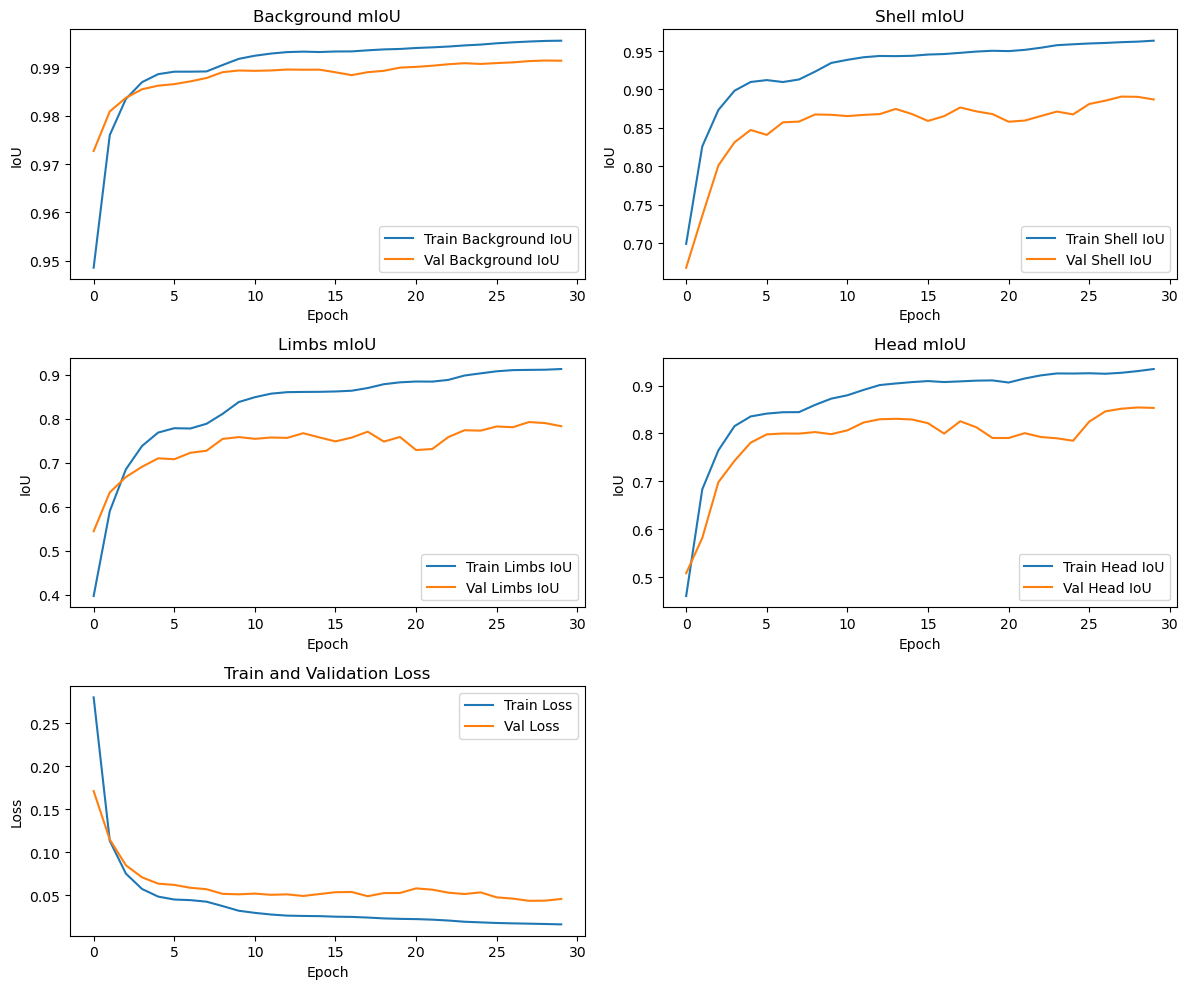

In [15]:

with open('history_DeepLabV3Plus_MobileNetV2.json', 'r') as f:
    history = json.load(f)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

ax_loss = axes[2, 0] 
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### 4.7 DeepLabV3Plus_VIT

In [8]:
target_size = (224, 224)

# Initialize model, loss function, and optimizer
set_seed(42)
model = DeepLabV3Plus_VIT(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')  

history_DeepLabV3Plus_VIT = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}

for epoch in range(epochs):
    model.train() 
    train_loss = 0.0
    train_ious = np.zeros(num_classes)  

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious)  

            avg_iou = np.nanmean(batch_ious)  
            t.set_postfix(loss=loss.item(), iou=avg_iou)

    train_ious /= len(train_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_VIT['train_iou'][i].append(train_ious[i])

    train_loss /= len(train_loader)
    history_DeepLabV3Plus_VIT['train_loss'].append(train_loss)

    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    val_ious /= len(val_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_VIT['val_iou'][i].append(val_ious[i])

    val_loss /= len(val_loader)
    history_DeepLabV3Plus_VIT['val_loss'].append(val_loss)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]:.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_DeepLabV3Plus_VIT_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

with open('history_DeepLabV3Plus_VIT.json', 'w') as f:
    json.dump(history_DeepLabV3Plus_VIT, f)

Epoch 1/30:   0%|          | 0/166 [00:00<?, ?it/s]C:\Users\chenxvda\anaconda3\Lib\site-packages\transformers\models\vit\modeling_vit.py:252: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  context_layer = torch.nn.functional.scaled_dot_product_attention(
Epoch 1/30: 100%|██████████| 166/166 [05:49<00:00,  2.11s/it, iou=0.713, loss=0.221]


Epoch 1/30, Train Loss: 0.3502, Val Loss: 0.1746, Time: 410.49s
Train IoU - Background: 0.9352, Shell: 0.7550, Limbs: 0.4585, Head: 0.5123
Val IoU - Background: 0.9723, Shell: 0.7794, Limbs: 0.5892, Head: 0.6402
Saved best model with Val Loss: 0.1746


Epoch 2/30: 100%|██████████| 166/166 [05:47<00:00,  2.10s/it, iou=0.811, loss=0.125] 


Epoch 2/30, Train Loss: 0.1273, Val Loss: 0.1094, Time: 410.30s
Train IoU - Background: 0.9743, Shell: 0.8596, Limbs: 0.6231, Head: 0.7336
Val IoU - Background: 0.9769, Shell: 0.8361, Limbs: 0.6442, Head: 0.7453
Saved best model with Val Loss: 0.1094


Epoch 3/30: 100%|██████████| 166/166 [05:47<00:00,  2.09s/it, iou=0.848, loss=0.0927]


Epoch 3/30, Train Loss: 0.0868, Val Loss: 0.0864, Time: 409.30s
Train IoU - Background: 0.9787, Shell: 0.8877, Limbs: 0.6734, Head: 0.7846
Val IoU - Background: 0.9793, Shell: 0.8506, Limbs: 0.6696, Head: 0.7699
Saved best model with Val Loss: 0.0864


Epoch 4/30: 100%|██████████| 166/166 [05:46<00:00,  2.08s/it, iou=0.872, loss=0.077] 


Epoch 4/30, Train Loss: 0.0695, Val Loss: 0.0773, Time: 408.26s
Train IoU - Background: 0.9811, Shell: 0.9024, Limbs: 0.7036, Head: 0.8116
Val IoU - Background: 0.9801, Shell: 0.8544, Limbs: 0.6801, Head: 0.7711
Saved best model with Val Loss: 0.0773


Epoch 5/30: 100%|██████████| 166/166 [05:48<00:00,  2.10s/it, iou=0.88, loss=0.0689] 


Epoch 5/30, Train Loss: 0.0605, Val Loss: 0.0724, Time: 410.07s
Train IoU - Background: 0.9824, Shell: 0.9097, Limbs: 0.7233, Head: 0.8257
Val IoU - Background: 0.9804, Shell: 0.8566, Limbs: 0.6827, Head: 0.7716
Saved best model with Val Loss: 0.0724


Epoch 6/30: 100%|██████████| 166/166 [05:47<00:00,  2.09s/it, iou=0.884, loss=0.0653]


Epoch 6/30, Train Loss: 0.0579, Val Loss: 0.0732, Time: 410.36s
Train IoU - Background: 0.9824, Shell: 0.9073, Limbs: 0.7266, Head: 0.8262
Val IoU - Background: 0.9804, Shell: 0.8478, Limbs: 0.6921, Head: 0.7679


Epoch 7/30: 100%|██████████| 166/166 [05:45<00:00,  2.08s/it, iou=0.89, loss=0.062]  


Epoch 7/30, Train Loss: 0.0536, Val Loss: 0.0680, Time: 407.58s
Train IoU - Background: 0.9831, Shell: 0.9097, Limbs: 0.7416, Head: 0.8276
Val IoU - Background: 0.9810, Shell: 0.8627, Limbs: 0.6928, Head: 0.8023
Saved best model with Val Loss: 0.0680


Epoch 8/30: 100%|██████████| 166/166 [05:46<00:00,  2.09s/it, iou=0.893, loss=0.0587]


Epoch 8/30, Train Loss: 0.0506, Val Loss: 0.0647, Time: 408.92s
Train IoU - Background: 0.9837, Shell: 0.9116, Limbs: 0.7506, Head: 0.8302
Val IoU - Background: 0.9820, Shell: 0.8657, Limbs: 0.6973, Head: 0.8105
Saved best model with Val Loss: 0.0647


Epoch 9/30: 100%|██████████| 166/166 [05:47<00:00,  2.09s/it, iou=0.905, loss=0.054] 


Epoch 9/30, Train Loss: 0.0465, Val Loss: 0.0656, Time: 410.32s
Train IoU - Background: 0.9850, Shell: 0.9201, Limbs: 0.7619, Head: 0.8461
Val IoU - Background: 0.9820, Shell: 0.8607, Limbs: 0.6961, Head: 0.8062


Epoch 10/30: 100%|██████████| 166/166 [05:48<00:00,  2.10s/it, iou=0.908, loss=0.052] 


Epoch 10/30, Train Loss: 0.0441, Val Loss: 0.0661, Time: 410.49s
Train IoU - Background: 0.9855, Shell: 0.9239, Limbs: 0.7705, Head: 0.8526
Val IoU - Background: 0.9817, Shell: 0.8666, Limbs: 0.7028, Head: 0.8034


Epoch 11/30: 100%|██████████| 166/166 [05:48<00:00,  2.10s/it, iou=0.914, loss=0.0494]


Epoch 11/30, Train Loss: 0.0419, Val Loss: 0.0670, Time: 411.41s
Train IoU - Background: 0.9860, Shell: 0.9283, Limbs: 0.7792, Head: 0.8621
Val IoU - Background: 0.9803, Shell: 0.8719, Limbs: 0.6903, Head: 0.8085


Epoch 12/30: 100%|██████████| 166/166 [05:46<00:00,  2.09s/it, iou=0.899, loss=0.0526]


Epoch 12/30, Train Loss: 0.0408, Val Loss: 0.0658, Time: 409.14s
Train IoU - Background: 0.9861, Shell: 0.9301, Limbs: 0.7823, Head: 0.8662
Val IoU - Background: 0.9806, Shell: 0.8586, Limbs: 0.7137, Head: 0.8029


Epoch 13/30: 100%|██████████| 166/166 [05:46<00:00,  2.09s/it, iou=0.898, loss=0.0511]


Epoch 13/30, Train Loss: 0.0401, Val Loss: 0.0735, Time: 410.29s
Train IoU - Background: 0.9860, Shell: 0.9307, Limbs: 0.7837, Head: 0.8696
Val IoU - Background: 0.9769, Shell: 0.8484, Limbs: 0.6518, Head: 0.7429


Epoch 14/30: 100%|██████████| 166/166 [05:46<00:00,  2.09s/it, iou=0.913, loss=0.0467]


Epoch 14/30, Train Loss: 0.0394, Val Loss: 0.0708, Time: 408.85s
Train IoU - Background: 0.9861, Shell: 0.9322, Limbs: 0.7859, Head: 0.8686
Val IoU - Background: 0.9817, Shell: 0.8498, Limbs: 0.6793, Head: 0.7203


Epoch 15/30: 100%|██████████| 166/166 [05:48<00:00,  2.10s/it, iou=0.92, loss=0.0451] 


Epoch 15/30, Train Loss: 0.0378, Val Loss: 0.0711, Time: 410.84s
Train IoU - Background: 0.9868, Shell: 0.9343, Limbs: 0.7932, Head: 0.8735
Val IoU - Background: 0.9831, Shell: 0.8431, Limbs: 0.6901, Head: 0.7383


Epoch 16/30: 100%|██████████| 166/166 [05:47<00:00,  2.10s/it, iou=0.925, loss=0.0427]


Epoch 16/30, Train Loss: 0.0365, Val Loss: 0.0694, Time: 410.42s
Train IoU - Background: 0.9873, Shell: 0.9369, Limbs: 0.7986, Head: 0.8782
Val IoU - Background: 0.9825, Shell: 0.8460, Limbs: 0.6919, Head: 0.7721


Epoch 17/30: 100%|██████████| 166/166 [05:47<00:00,  2.10s/it, iou=0.928, loss=0.0408]


Epoch 17/30, Train Loss: 0.0354, Val Loss: 0.0631, Time: 410.09s
Train IoU - Background: 0.9878, Shell: 0.9392, Limbs: 0.8020, Head: 0.8818
Val IoU - Background: 0.9826, Shell: 0.8622, Limbs: 0.7109, Head: 0.8011
Saved best model with Val Loss: 0.0631


Epoch 18/30: 100%|██████████| 166/166 [05:49<00:00,  2.11s/it, iou=0.927, loss=0.0401]


Epoch 18/30, Train Loss: 0.0347, Val Loss: 0.0602, Time: 412.62s
Train IoU - Background: 0.9879, Shell: 0.9397, Limbs: 0.8051, Head: 0.8816
Val IoU - Background: 0.9831, Shell: 0.8724, Limbs: 0.7198, Head: 0.8166
Saved best model with Val Loss: 0.0602


Epoch 19/30: 100%|██████████| 166/166 [05:49<00:00,  2.11s/it, iou=0.926, loss=0.04]  


Epoch 19/30, Train Loss: 0.0343, Val Loss: 0.0601, Time: 412.99s
Train IoU - Background: 0.9878, Shell: 0.9395, Limbs: 0.8079, Head: 0.8819
Val IoU - Background: 0.9830, Shell: 0.8727, Limbs: 0.7127, Head: 0.8167
Saved best model with Val Loss: 0.0601


Epoch 20/30: 100%|██████████| 166/166 [05:52<00:00,  2.12s/it, iou=0.929, loss=0.039] 


Epoch 20/30, Train Loss: 0.0338, Val Loss: 0.0624, Time: 415.80s
Train IoU - Background: 0.9877, Shell: 0.9395, Limbs: 0.8104, Head: 0.8858
Val IoU - Background: 0.9822, Shell: 0.8641, Limbs: 0.7171, Head: 0.8078


Epoch 21/30: 100%|██████████| 166/166 [05:51<00:00,  2.12s/it, iou=0.928, loss=0.0394]


Epoch 21/30, Train Loss: 0.0333, Val Loss: 0.0615, Time: 414.38s
Train IoU - Background: 0.9877, Shell: 0.9396, Limbs: 0.8141, Head: 0.8886
Val IoU - Background: 0.9834, Shell: 0.8722, Limbs: 0.7193, Head: 0.8170


Epoch 22/30: 100%|██████████| 166/166 [05:47<00:00,  2.09s/it, iou=0.927, loss=0.0398]


Epoch 22/30, Train Loss: 0.0325, Val Loss: 0.0616, Time: 408.92s
Train IoU - Background: 0.9880, Shell: 0.9415, Limbs: 0.8174, Head: 0.8924
Val IoU - Background: 0.9835, Shell: 0.8745, Limbs: 0.7202, Head: 0.8224


Epoch 23/30: 100%|██████████| 166/166 [05:51<00:00,  2.12s/it, iou=0.927, loss=0.0386]


Epoch 23/30, Train Loss: 0.0315, Val Loss: 0.0636, Time: 415.00s
Train IoU - Background: 0.9884, Shell: 0.9445, Limbs: 0.8205, Head: 0.8953
Val IoU - Background: 0.9827, Shell: 0.8675, Limbs: 0.7194, Head: 0.8061


Epoch 24/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.921, loss=0.0393]


Epoch 24/30, Train Loss: 0.0312, Val Loss: 0.0643, Time: 427.49s
Train IoU - Background: 0.9886, Shell: 0.9451, Limbs: 0.8205, Head: 0.8948
Val IoU - Background: 0.9821, Shell: 0.8673, Limbs: 0.7137, Head: 0.7855


Epoch 25/30: 100%|██████████| 166/166 [05:55<00:00,  2.14s/it, iou=0.928, loss=0.0374]


Epoch 25/30, Train Loss: 0.0310, Val Loss: 0.0649, Time: 419.53s
Train IoU - Background: 0.9886, Shell: 0.9453, Limbs: 0.8204, Head: 0.8957
Val IoU - Background: 0.9814, Shell: 0.8632, Limbs: 0.7155, Head: 0.7851


Epoch 26/30: 100%|██████████| 166/166 [05:50<00:00,  2.11s/it, iou=0.934, loss=0.0356]


Epoch 26/30, Train Loss: 0.0307, Val Loss: 0.0659, Time: 412.35s
Train IoU - Background: 0.9888, Shell: 0.9459, Limbs: 0.8223, Head: 0.8973
Val IoU - Background: 0.9822, Shell: 0.8631, Limbs: 0.7120, Head: 0.8021


Epoch 27/30: 100%|██████████| 166/166 [05:47<00:00,  2.09s/it, iou=0.937, loss=0.0347]


Epoch 27/30, Train Loss: 0.0300, Val Loss: 0.0634, Time: 410.13s
Train IoU - Background: 0.9891, Shell: 0.9477, Limbs: 0.8258, Head: 0.9019
Val IoU - Background: 0.9836, Shell: 0.8713, Limbs: 0.7143, Head: 0.8204


Epoch 28/30: 100%|██████████| 166/166 [05:46<00:00,  2.09s/it, iou=0.939, loss=0.0343]


Epoch 28/30, Train Loss: 0.0291, Val Loss: 0.0613, Time: 408.74s
Train IoU - Background: 0.9894, Shell: 0.9498, Limbs: 0.8300, Head: 0.9052
Val IoU - Background: 0.9841, Shell: 0.8766, Limbs: 0.7217, Head: 0.8294


Epoch 29/30: 100%|██████████| 166/166 [05:48<00:00,  2.10s/it, iou=0.94, loss=0.0335] 


Epoch 29/30, Train Loss: 0.0284, Val Loss: 0.0616, Time: 409.35s
Train IoU - Background: 0.9897, Shell: 0.9514, Limbs: 0.8338, Head: 0.9078
Val IoU - Background: 0.9840, Shell: 0.8762, Limbs: 0.7195, Head: 0.8266


Epoch 30/30: 100%|██████████| 166/166 [05:49<00:00,  2.11s/it, iou=0.941, loss=0.033] 


Epoch 30/30, Train Loss: 0.0281, Val Loss: 0.0623, Time: 413.00s
Train IoU - Background: 0.9897, Shell: 0.9515, Limbs: 0.8353, Head: 0.9078
Val IoU - Background: 0.9841, Shell: 0.8758, Limbs: 0.7219, Head: 0.8189
Training complete.


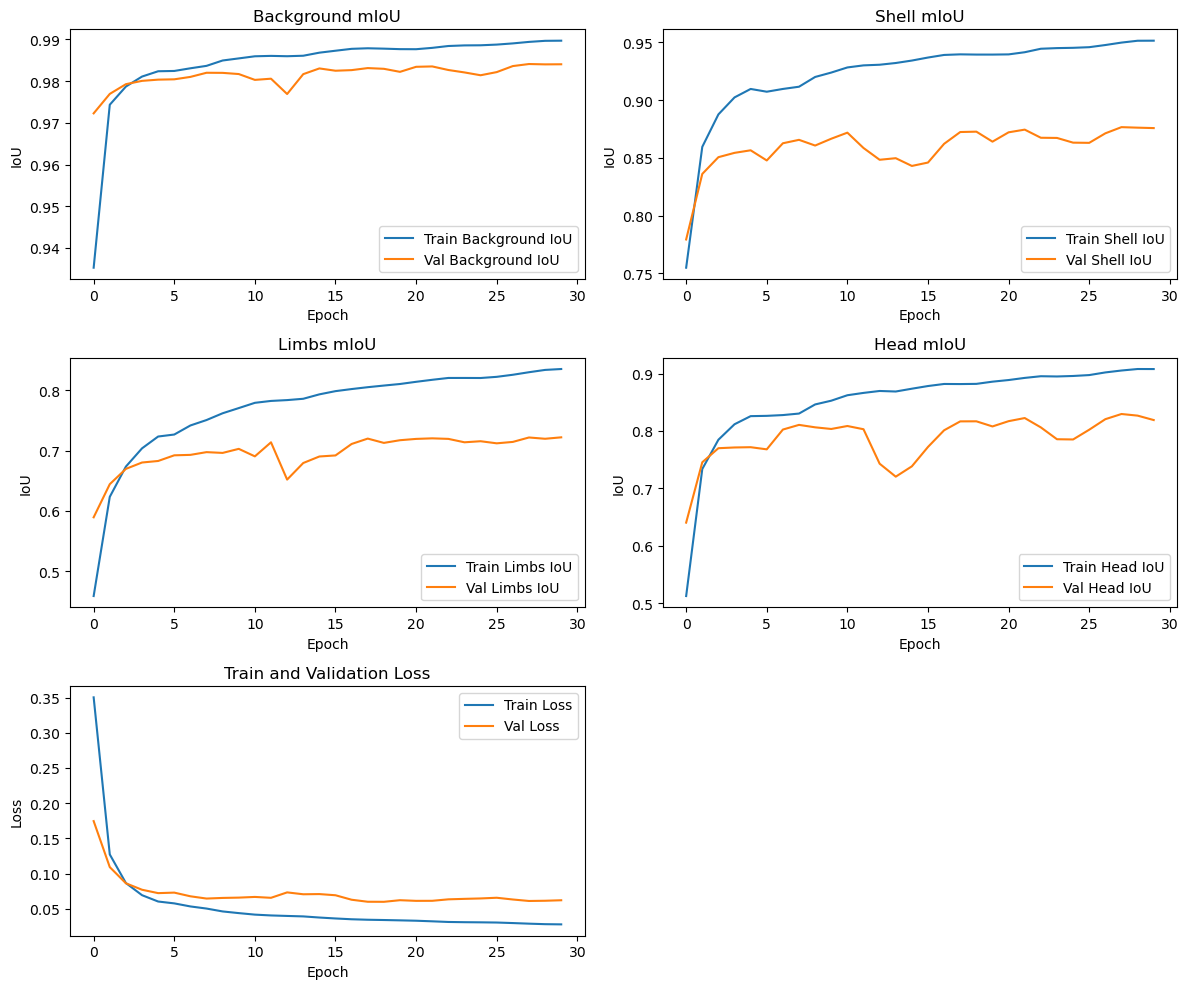

In [4]:

with open('history_DeepLabV3Plus_VIT.json', 'r') as f:
    history = json.load(f)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

ax_loss = axes[2, 0]  
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### 4.8 DeepLabV3Plus_VIT2

In [8]:
target_size = (224, 224)

# Initialize model, loss function, and optimizer
set_seed(42)
model = DeepLabV3Plus_VIT2(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')  
history_DeepLabV3Plus_VIT2 = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}

for epoch in range(epochs):
    model.train()  
    train_loss = 0.0
    train_ious = np.zeros(num_classes)  

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious)  

            avg_iou = np.nanmean(batch_ious)  
            t.set_postfix(loss=loss.item(), iou=avg_iou)

    train_ious /= len(train_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_VIT2['train_iou'][i].append(train_ious[i])

    train_loss /= len(train_loader)
    history_DeepLabV3Plus_VIT2['train_loss'].append(train_loss)

    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    val_ious /= len(val_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_VIT2['val_iou'][i].append(val_ious[i])

    val_loss /= len(val_loader)
    history_DeepLabV3Plus_VIT2['val_loss'].append(val_loss)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]:.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_DeepLabV3Plus_VIT2_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

with open('history_DeepLabV3Plus_VIT2.json', 'w') as f:
    json.dump(history_DeepLabV3Plus_VIT2, f)

Epoch 1/30:   0%|          | 0/166 [00:00<?, ?it/s]C:\Users\chenxvda\anaconda3\Lib\site-packages\transformers\models\vit\modeling_vit.py:252: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  context_layer = torch.nn.functional.scaled_dot_product_attention(
Epoch 1/30: 100%|██████████| 166/166 [06:28<00:00,  2.34s/it, iou=0.759, loss=0.188]


Epoch 1/30, Train Loss: 0.3176, Val Loss: 0.1565, Time: 450.65s
Train IoU - Background: 0.9523, Shell: 0.7894, Limbs: 0.5288, Head: 0.5915
Val IoU - Background: 0.9777, Shell: 0.8230, Limbs: 0.6541, Head: 0.7340
Saved best model with Val Loss: 0.1565


Epoch 2/30: 100%|██████████| 166/166 [06:06<00:00,  2.21s/it, iou=0.858, loss=0.0949]


Epoch 2/30, Train Loss: 0.1086, Val Loss: 0.0926, Time: 429.24s
Train IoU - Background: 0.9814, Shell: 0.8834, Limbs: 0.6945, Head: 0.7902
Val IoU - Background: 0.9847, Shell: 0.8577, Limbs: 0.7192, Head: 0.7965
Saved best model with Val Loss: 0.0926


Epoch 3/30: 100%|██████████| 166/166 [06:06<00:00,  2.21s/it, iou=0.895, loss=0.0641]


Epoch 3/30, Train Loss: 0.0658, Val Loss: 0.0749, Time: 428.65s
Train IoU - Background: 0.9872, Shell: 0.9143, Limbs: 0.7685, Head: 0.8486
Val IoU - Background: 0.9865, Shell: 0.8600, Limbs: 0.7498, Head: 0.8027
Saved best model with Val Loss: 0.0749


Epoch 4/30: 100%|██████████| 166/166 [06:00<00:00,  2.17s/it, iou=0.91, loss=0.0511] 


Epoch 4/30, Train Loss: 0.0512, Val Loss: 0.0624, Time: 423.68s
Train IoU - Background: 0.9889, Shell: 0.9223, Limbs: 0.7929, Head: 0.8689
Val IoU - Background: 0.9888, Shell: 0.8639, Limbs: 0.7543, Head: 0.7901
Saved best model with Val Loss: 0.0624


Epoch 5/30: 100%|██████████| 166/166 [06:02<00:00,  2.18s/it, iou=0.919, loss=0.0431]


Epoch 5/30, Train Loss: 0.0413, Val Loss: 0.0529, Time: 424.55s
Train IoU - Background: 0.9906, Shell: 0.9330, Limbs: 0.8220, Head: 0.8804
Val IoU - Background: 0.9894, Shell: 0.8839, Limbs: 0.7759, Head: 0.8328
Saved best model with Val Loss: 0.0529


Epoch 6/30: 100%|██████████| 166/166 [06:04<00:00,  2.20s/it, iou=0.924, loss=0.0405]


Epoch 6/30, Train Loss: 0.0376, Val Loss: 0.0503, Time: 428.01s
Train IoU - Background: 0.9911, Shell: 0.9324, Limbs: 0.8297, Head: 0.8793
Val IoU - Background: 0.9897, Shell: 0.8852, Limbs: 0.7834, Head: 0.8345
Saved best model with Val Loss: 0.0503


Epoch 7/30: 100%|██████████| 166/166 [06:05<00:00,  2.20s/it, iou=0.929, loss=0.0363]


Epoch 7/30, Train Loss: 0.0346, Val Loss: 0.0471, Time: 427.79s
Train IoU - Background: 0.9913, Shell: 0.9354, Limbs: 0.8347, Head: 0.8897
Val IoU - Background: 0.9905, Shell: 0.8880, Limbs: 0.7864, Head: 0.8531
Saved best model with Val Loss: 0.0471


Epoch 8/30: 100%|██████████| 166/166 [06:04<00:00,  2.19s/it, iou=0.933, loss=0.0338]


Epoch 8/30, Train Loss: 0.0311, Val Loss: 0.0476, Time: 426.21s
Train IoU - Background: 0.9924, Shell: 0.9397, Limbs: 0.8531, Head: 0.8830
Val IoU - Background: 0.9902, Shell: 0.8862, Limbs: 0.7901, Head: 0.8494


Epoch 9/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.943, loss=0.0297]


Epoch 9/30, Train Loss: 0.0274, Val Loss: 0.0451, Time: 426.59s
Train IoU - Background: 0.9932, Shell: 0.9473, Limbs: 0.8681, Head: 0.8971
Val IoU - Background: 0.9907, Shell: 0.8936, Limbs: 0.7932, Head: 0.8540
Saved best model with Val Loss: 0.0451


Epoch 10/30: 100%|██████████| 166/166 [06:04<00:00,  2.20s/it, iou=0.946, loss=0.028] 


Epoch 10/30, Train Loss: 0.0249, Val Loss: 0.0464, Time: 428.15s
Train IoU - Background: 0.9935, Shell: 0.9516, Limbs: 0.8775, Head: 0.9102
Val IoU - Background: 0.9911, Shell: 0.8926, Limbs: 0.7930, Head: 0.8435


Epoch 11/30: 100%|██████████| 166/166 [06:04<00:00,  2.20s/it, iou=0.951, loss=0.0262]


Epoch 11/30, Train Loss: 0.0234, Val Loss: 0.0479, Time: 427.11s
Train IoU - Background: 0.9937, Shell: 0.9536, Limbs: 0.8830, Head: 0.9183
Val IoU - Background: 0.9907, Shell: 0.8874, Limbs: 0.7954, Head: 0.8238


Epoch 12/30: 100%|██████████| 166/166 [06:00<00:00,  2.17s/it, iou=0.95, loss=0.0255] 


Epoch 12/30, Train Loss: 0.0225, Val Loss: 0.0492, Time: 423.25s
Train IoU - Background: 0.9938, Shell: 0.9547, Limbs: 0.8874, Head: 0.9200
Val IoU - Background: 0.9912, Shell: 0.8851, Limbs: 0.7996, Head: 0.7946


Epoch 13/30: 100%|██████████| 166/166 [06:02<00:00,  2.18s/it, iou=0.948, loss=0.0256]


Epoch 13/30, Train Loss: 0.0212, Val Loss: 0.0531, Time: 424.27s
Train IoU - Background: 0.9941, Shell: 0.9566, Limbs: 0.8937, Head: 0.9218
Val IoU - Background: 0.9912, Shell: 0.8772, Limbs: 0.7906, Head: 0.7770


Epoch 14/30: 100%|██████████| 166/166 [06:02<00:00,  2.18s/it, iou=0.958, loss=0.0226]


Epoch 14/30, Train Loss: 0.0197, Val Loss: 0.0504, Time: 425.05s
Train IoU - Background: 0.9947, Shell: 0.9591, Limbs: 0.9013, Head: 0.9196
Val IoU - Background: 0.9911, Shell: 0.8811, Limbs: 0.7920, Head: 0.8343


Epoch 15/30: 100%|██████████| 166/166 [06:01<00:00,  2.18s/it, iou=0.956, loss=0.0222]


Epoch 15/30, Train Loss: 0.0193, Val Loss: 0.0448, Time: 424.34s
Train IoU - Background: 0.9949, Shell: 0.9587, Limbs: 0.9045, Head: 0.9194
Val IoU - Background: 0.9915, Shell: 0.8954, Limbs: 0.7988, Head: 0.8500
Saved best model with Val Loss: 0.0448


Epoch 16/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.959, loss=0.0212]


Epoch 16/30, Train Loss: 0.0187, Val Loss: 0.0445, Time: 425.70s
Train IoU - Background: 0.9951, Shell: 0.9591, Limbs: 0.9072, Head: 0.9191
Val IoU - Background: 0.9914, Shell: 0.8960, Limbs: 0.8026, Head: 0.8483
Saved best model with Val Loss: 0.0445


Epoch 17/30: 100%|██████████| 166/166 [06:04<00:00,  2.20s/it, iou=0.962, loss=0.0203]


Epoch 17/30, Train Loss: 0.0176, Val Loss: 0.0436, Time: 426.23s
Train IoU - Background: 0.9953, Shell: 0.9621, Limbs: 0.9108, Head: 0.9261
Val IoU - Background: 0.9911, Shell: 0.8989, Limbs: 0.8045, Head: 0.8585
Saved best model with Val Loss: 0.0436


Epoch 18/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.965, loss=0.0187]


Epoch 18/30, Train Loss: 0.0168, Val Loss: 0.0417, Time: 427.03s
Train IoU - Background: 0.9954, Shell: 0.9642, Limbs: 0.9137, Head: 0.9336
Val IoU - Background: 0.9917, Shell: 0.9001, Limbs: 0.8104, Head: 0.8657
Saved best model with Val Loss: 0.0417


Epoch 19/30: 100%|██████████| 166/166 [06:02<00:00,  2.19s/it, iou=0.967, loss=0.0179]


Epoch 19/30, Train Loss: 0.0160, Val Loss: 0.0423, Time: 425.68s
Train IoU - Background: 0.9955, Shell: 0.9663, Limbs: 0.9165, Head: 0.9405
Val IoU - Background: 0.9921, Shell: 0.8992, Limbs: 0.8058, Head: 0.8672


Epoch 20/30: 100%|██████████| 166/166 [06:02<00:00,  2.19s/it, iou=0.966, loss=0.0176] 


Epoch 20/30, Train Loss: 0.0154, Val Loss: 0.0445, Time: 426.82s
Train IoU - Background: 0.9955, Shell: 0.9678, Limbs: 0.9205, Head: 0.9441
Val IoU - Background: 0.9921, Shell: 0.8948, Limbs: 0.8000, Head: 0.8645


Epoch 21/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.969, loss=0.0169] 


Epoch 21/30, Train Loss: 0.0149, Val Loss: 0.0448, Time: 425.83s
Train IoU - Background: 0.9957, Shell: 0.9687, Limbs: 0.9219, Head: 0.9462
Val IoU - Background: 0.9918, Shell: 0.8953, Limbs: 0.8068, Head: 0.8662


Epoch 22/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.962, loss=0.0181] 


Epoch 22/30, Train Loss: 0.0147, Val Loss: 0.0441, Time: 425.26s
Train IoU - Background: 0.9958, Shell: 0.9684, Limbs: 0.9234, Head: 0.9450
Val IoU - Background: 0.9915, Shell: 0.9014, Limbs: 0.8148, Head: 0.8672


Epoch 23/30: 100%|██████████| 166/166 [06:05<00:00,  2.20s/it, iou=0.966, loss=0.0173]


Epoch 23/30, Train Loss: 0.0147, Val Loss: 0.0462, Time: 427.08s
Train IoU - Background: 0.9958, Shell: 0.9673, Limbs: 0.9243, Head: 0.9407
Val IoU - Background: 0.9916, Shell: 0.8979, Limbs: 0.8100, Head: 0.8622


Epoch 24/30: 100%|██████████| 166/166 [06:01<00:00,  2.18s/it, iou=0.968, loss=0.0164] 


Epoch 24/30, Train Loss: 0.0146, Val Loss: 0.0457, Time: 424.30s
Train IoU - Background: 0.9958, Shell: 0.9672, Limbs: 0.9254, Head: 0.9387
Val IoU - Background: 0.9919, Shell: 0.8977, Limbs: 0.8141, Head: 0.8478


Epoch 25/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.969, loss=0.0159] 


Epoch 25/30, Train Loss: 0.0142, Val Loss: 0.0428, Time: 425.56s
Train IoU - Background: 0.9959, Shell: 0.9684, Limbs: 0.9288, Head: 0.9404
Val IoU - Background: 0.9923, Shell: 0.9032, Limbs: 0.8180, Head: 0.8622


Epoch 26/30: 100%|██████████| 166/166 [06:01<00:00,  2.18s/it, iou=0.969, loss=0.0156] 


Epoch 26/30, Train Loss: 0.0134, Val Loss: 0.0424, Time: 425.02s
Train IoU - Background: 0.9962, Shell: 0.9703, Limbs: 0.9324, Head: 0.9430
Val IoU - Background: 0.9924, Shell: 0.9057, Limbs: 0.8183, Head: 0.8677


Epoch 27/30: 100%|██████████| 166/166 [06:08<00:00,  2.22s/it, iou=0.971, loss=0.015]  


Epoch 27/30, Train Loss: 0.0128, Val Loss: 0.0439, Time: 431.80s
Train IoU - Background: 0.9964, Shell: 0.9716, Limbs: 0.9356, Head: 0.9437
Val IoU - Background: 0.9922, Shell: 0.9044, Limbs: 0.8150, Head: 0.8623


Epoch 28/30: 100%|██████████| 166/166 [06:07<00:00,  2.21s/it, iou=0.972, loss=0.0147] 


Epoch 28/30, Train Loss: 0.0125, Val Loss: 0.0441, Time: 431.10s
Train IoU - Background: 0.9965, Shell: 0.9718, Limbs: 0.9379, Head: 0.9435
Val IoU - Background: 0.9922, Shell: 0.9047, Limbs: 0.8139, Head: 0.8639


Epoch 29/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.971, loss=0.0148] 


Epoch 29/30, Train Loss: 0.0121, Val Loss: 0.0446, Time: 426.53s
Train IoU - Background: 0.9966, Shell: 0.9729, Limbs: 0.9403, Head: 0.9459
Val IoU - Background: 0.9918, Shell: 0.9034, Limbs: 0.8131, Head: 0.8665


Epoch 30/30: 100%|██████████| 166/166 [06:03<00:00,  2.19s/it, iou=0.972, loss=0.0147] 


Epoch 30/30, Train Loss: 0.0116, Val Loss: 0.0455, Time: 426.28s
Train IoU - Background: 0.9967, Shell: 0.9745, Limbs: 0.9418, Head: 0.9507
Val IoU - Background: 0.9917, Shell: 0.9045, Limbs: 0.8147, Head: 0.8689
Training complete.


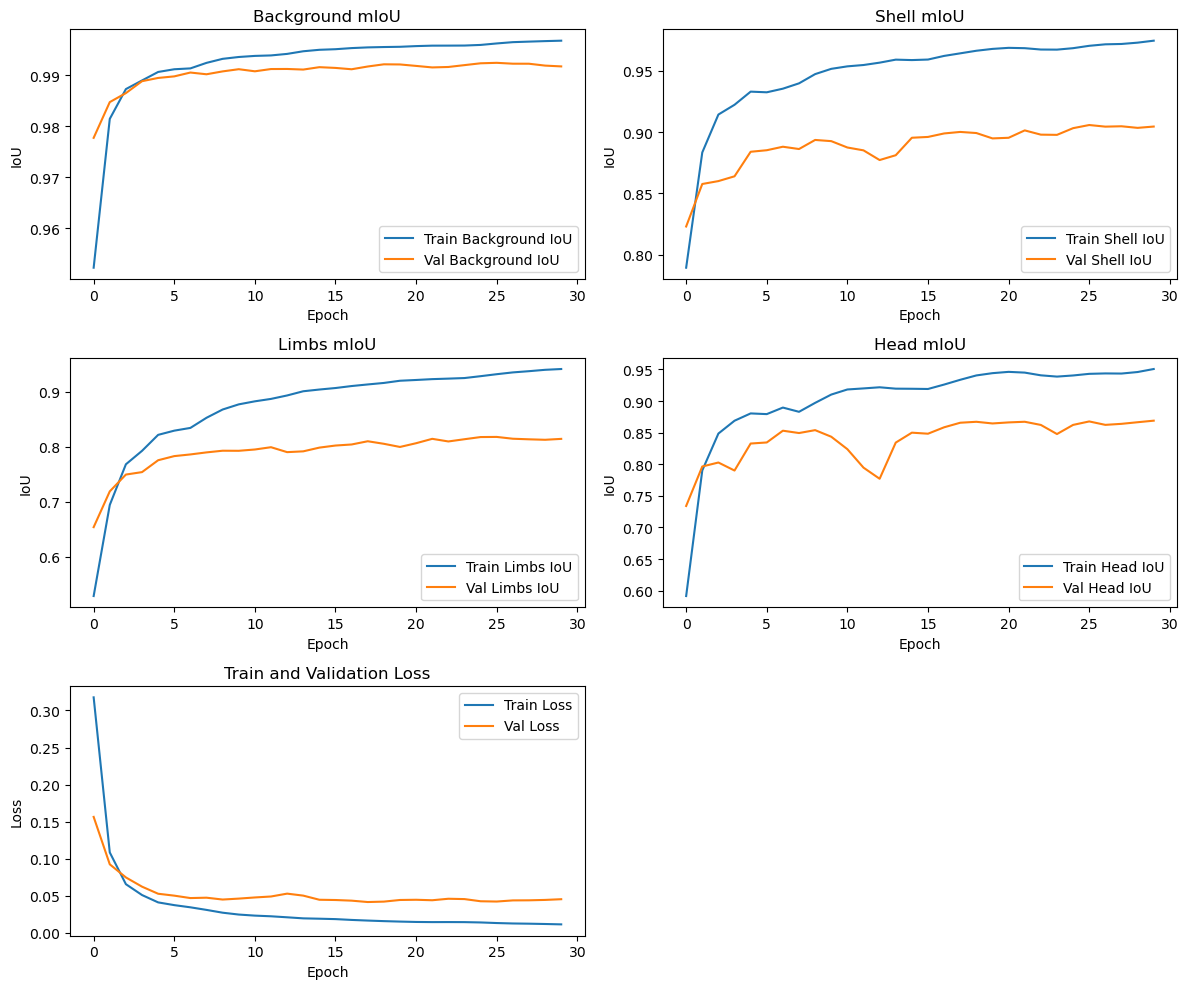

In [5]:

with open('history_DeepLabV3Plus_VIT2.json', 'r') as f:
    history = json.load(f)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

ax_loss = axes[2, 0]  
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### 4.9 DeepLabV3Plus_VIT3

In [ ]:

target_size = (224, 224)

# Initialize model, loss function, and optimizer
set_seed(42)
model = DeepLabV3Plus_VIT3(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)  

# Data loaders
train_dataset = TurtleDataset(train_files['id'], coco)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TurtleDataset(val_files['id'], coco)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')  
history_DeepLabV3Plus_VIT3 = {
    'train_loss': [], 'val_loss': [],
    'train_iou': {0: [], 1: [], 2: [], 3: []},  
    'val_iou': {0: [], 1: [], 2: [], 3: []}
}

for epoch in range(epochs):
    model.train()  
    train_loss = 0.0
    train_ious = np.zeros(num_classes)  

    start_time = time.time()

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as t:
        for images, masks in t:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            train_ious += np.nan_to_num(batch_ious) 

            avg_iou = np.nanmean(batch_ious)  
            t.set_postfix(loss=loss.item(), iou=avg_iou)

    train_ious /= len(train_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_VIT3['train_iou'][i].append(train_ious[i])

    train_loss /= len(train_loader)
    history_DeepLabV3Plus_VIT3['train_loss'].append(train_loss)

    model.eval()
    val_loss = 0.0
    val_ious = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.argmax(1))
            val_loss += loss.item()

            predicted_mask = torch.argmax(outputs, dim=1)
            batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)

            val_ious += np.nan_to_num(batch_ious)

    val_ious /= len(val_loader)
    for i in range(num_classes):
        history_DeepLabV3Plus_VIT3['val_iou'][i].append(val_ious[i])

    val_loss /= len(val_loader)
    history_DeepLabV3Plus_VIT3['val_loss'].append(val_loss)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f}s")
    print(f"Train IoU - Background: {train_ious[0]:.4f}, Shell: {train_ious[1]:.4f}, "
          f"Limbs: {train_ious[2]:.4f}, Head: {train_ious[3]:.4f}")
    print(f"Val IoU - Background: {val_ious[0]:.4f}, Shell: {val_ious[1]:.4f}, "
          f"Limbs: {val_ious[2]:.4f}, Head: {val_ious[3]:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_DeepLabV3Plus_VIT3_model.pth')
        print(f"Saved best model with Val Loss: {best_val_loss:.4f}")

print("Training complete.")

with open('history_DeepLabV3Plus_VIT3.json', 'w') as f:
    json.dump(history_DeepLabV3Plus_VIT3, f)

Epoch 1/30:   0%|          | 0/166 [00:00<?, ?it/s]C:\Users\chenxvda\anaconda3\Lib\site-packages\timm\models\vision_transformer.py:92: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  x = F.scaled_dot_product_attention(
Epoch 1/30: 100%|██████████| 166/166 [07:21<00:00,  2.66s/it, iou=0.837, loss=0.123] 


Epoch 1/30, Train Loss: 0.2186, Val Loss: 0.1010, Time: 507.12s
Train IoU - Background: 0.9705, Shell: 0.8415, Limbs: 0.6508, Head: 0.7339
Val IoU - Background: 0.9868, Shell: 0.8716, Limbs: 0.7471, Head: 0.8075
Saved best model with Val Loss: 0.1010


Epoch 2/30: 100%|██████████| 166/166 [07:27<00:00,  2.70s/it, iou=0.892, loss=0.0693]


Epoch 2/30, Train Loss: 0.0720, Val Loss: 0.0673, Time: 512.98s
Train IoU - Background: 0.9884, Shell: 0.9169, Limbs: 0.7898, Head: 0.8614
Val IoU - Background: 0.9875, Shell: 0.8821, Limbs: 0.7701, Head: 0.8481
Saved best model with Val Loss: 0.0673


Epoch 3/30: 100%|██████████| 166/166 [07:22<00:00,  2.66s/it, iou=0.921, loss=0.0472]


Epoch 3/30, Train Loss: 0.0473, Val Loss: 0.0462, Time: 507.95s
Train IoU - Background: 0.9908, Shell: 0.9333, Limbs: 0.8301, Head: 0.8871
Val IoU - Background: 0.9916, Shell: 0.9120, Limbs: 0.8236, Head: 0.8832
Saved best model with Val Loss: 0.0462


Epoch 4/30: 100%|██████████| 166/166 [07:30<00:00,  2.71s/it, iou=0.935, loss=0.0374]


Epoch 4/30, Train Loss: 0.0337, Val Loss: 0.0487, Time: 516.69s
Train IoU - Background: 0.9931, Shell: 0.9473, Limbs: 0.8653, Head: 0.9130
Val IoU - Background: 0.9894, Shell: 0.9065, Limbs: 0.8043, Head: 0.8906


Epoch 5/30: 100%|██████████| 166/166 [07:27<00:00,  2.70s/it, iou=0.944, loss=0.0309]


Epoch 5/30, Train Loss: 0.0271, Val Loss: 0.0369, Time: 514.96s
Train IoU - Background: 0.9940, Shell: 0.9552, Limbs: 0.8838, Head: 0.9261
Val IoU - Background: 0.9928, Shell: 0.9177, Limbs: 0.8331, Head: 0.9039
Saved best model with Val Loss: 0.0369


Epoch 6/30: 100%|██████████| 166/166 [11:42<00:00,  4.23s/it, iou=0.953, loss=0.027] 


Epoch 6/30, Train Loss: 0.0233, Val Loss: 0.0363, Time: 770.50s
Train IoU - Background: 0.9944, Shell: 0.9593, Limbs: 0.8954, Head: 0.9300
Val IoU - Background: 0.9924, Shell: 0.9178, Limbs: 0.8303, Head: 0.8968
Saved best model with Val Loss: 0.0363


Epoch 7/30: 100%|██████████| 166/166 [11:17<00:00,  4.08s/it, iou=0.953, loss=0.0259]


Epoch 7/30, Train Loss: 0.0221, Val Loss: 0.0356, Time: 745.23s
Train IoU - Background: 0.9944, Shell: 0.9584, Limbs: 0.8991, Head: 0.9216
Val IoU - Background: 0.9926, Shell: 0.9184, Limbs: 0.8395, Head: 0.8962
Saved best model with Val Loss: 0.0356


Epoch 8/30: 100%|██████████| 166/166 [12:14<00:00,  4.42s/it, iou=0.957, loss=0.0235]


Epoch 8/30, Train Loss: 0.0200, Val Loss: 0.0351, Time: 801.48s
Train IoU - Background: 0.9948, Shell: 0.9618, Limbs: 0.9077, Head: 0.9281
Val IoU - Background: 0.9925, Shell: 0.9203, Limbs: 0.8349, Head: 0.8933
Saved best model with Val Loss: 0.0351


Epoch 9/30: 100%|██████████| 166/166 [10:56<00:00,  3.96s/it, iou=0.964, loss=0.0203]


Epoch 9/30, Train Loss: 0.0178, Val Loss: 0.0331, Time: 722.39s
Train IoU - Background: 0.9953, Shell: 0.9655, Limbs: 0.9154, Head: 0.9382
Val IoU - Background: 0.9934, Shell: 0.9227, Limbs: 0.8487, Head: 0.9006
Saved best model with Val Loss: 0.0331


Epoch 10/30: 100%|██████████| 166/166 [11:36<00:00,  4.20s/it, iou=0.966, loss=0.019] 


Epoch 10/30, Train Loss: 0.0164, Val Loss: 0.0361, Time: 762.28s
Train IoU - Background: 0.9955, Shell: 0.9679, Limbs: 0.9209, Head: 0.9453
Val IoU - Background: 0.9932, Shell: 0.9188, Limbs: 0.8403, Head: 0.8836


Epoch 11/30: 100%|██████████| 166/166 [10:21<00:00,  3.74s/it, iou=0.969, loss=0.018] 


Epoch 11/30, Train Loss: 0.0157, Val Loss: 0.0355, Time: 687.31s
Train IoU - Background: 0.9956, Shell: 0.9690, Limbs: 0.9243, Head: 0.9451
Val IoU - Background: 0.9937, Shell: 0.9194, Limbs: 0.8463, Head: 0.8807


Epoch 12/30: 100%|██████████| 166/166 [12:04<00:00,  4.36s/it, iou=0.965, loss=0.0189]


Epoch 12/30, Train Loss: 0.0148, Val Loss: 0.0365, Time: 791.50s
Train IoU - Background: 0.9957, Shell: 0.9703, Limbs: 0.9284, Head: 0.9462
Val IoU - Background: 0.9935, Shell: 0.9177, Limbs: 0.8424, Head: 0.8717


Epoch 13/30: 100%|██████████| 166/166 [10:25<00:00,  3.77s/it, iou=0.967, loss=0.0175] 


Epoch 13/30, Train Loss: 0.0142, Val Loss: 0.0366, Time: 692.53s
Train IoU - Background: 0.9960, Shell: 0.9710, Limbs: 0.9313, Head: 0.9457
Val IoU - Background: 0.9934, Shell: 0.9187, Limbs: 0.8358, Head: 0.8865


Epoch 14/30: 100%|██████████| 166/166 [11:39<00:00,  4.22s/it, iou=0.969, loss=0.0164] 


Epoch 14/30, Train Loss: 0.0137, Val Loss: 0.0341, Time: 766.50s
Train IoU - Background: 0.9961, Shell: 0.9713, Limbs: 0.9326, Head: 0.9456
Val IoU - Background: 0.9938, Shell: 0.9226, Limbs: 0.8525, Head: 0.8967


Epoch 15/30: 100%|██████████| 166/166 [10:25<00:00,  3.77s/it, iou=0.971, loss=0.0157] 


Epoch 15/30, Train Loss: 0.0131, Val Loss: 0.0329, Time: 691.06s
Train IoU - Background: 0.9963, Shell: 0.9722, Limbs: 0.9345, Head: 0.9497
Val IoU - Background: 0.9938, Shell: 0.9244, Limbs: 0.8536, Head: 0.9057
Saved best model with Val Loss: 0.0329


Epoch 16/30: 100%|██████████| 166/166 [12:10<00:00,  4.40s/it, iou=0.975, loss=0.0142] 


Epoch 16/30, Train Loss: 0.0123, Val Loss: 0.0330, Time: 796.11s
Train IoU - Background: 0.9965, Shell: 0.9743, Limbs: 0.9388, Head: 0.9543
Val IoU - Background: 0.9939, Shell: 0.9260, Limbs: 0.8578, Head: 0.9087


Epoch 17/30: 100%|██████████| 166/166 [10:30<00:00,  3.80s/it, iou=0.977, loss=0.0132] 


Epoch 17/30, Train Loss: 0.0116, Val Loss: 0.0329, Time: 696.33s
Train IoU - Background: 0.9966, Shell: 0.9761, Limbs: 0.9424, Head: 0.9581
Val IoU - Background: 0.9940, Shell: 0.9270, Limbs: 0.8600, Head: 0.9117
Saved best model with Val Loss: 0.0329


Epoch 18/30: 100%|██████████| 166/166 [12:02<00:00,  4.35s/it, iou=0.978, loss=0.0128] 


Epoch 18/30, Train Loss: 0.0112, Val Loss: 0.0333, Time: 801.05s
Train IoU - Background: 0.9967, Shell: 0.9770, Limbs: 0.9432, Head: 0.9601
Val IoU - Background: 0.9941, Shell: 0.9272, Limbs: 0.8593, Head: 0.9120


Epoch 19/30: 100%|██████████| 166/166 [10:33<00:00,  3.81s/it, iou=0.977, loss=0.013]  


Epoch 19/30, Train Loss: 0.0109, Val Loss: 0.0343, Time: 699.74s
Train IoU - Background: 0.9967, Shell: 0.9777, Limbs: 0.9444, Head: 0.9615
Val IoU - Background: 0.9936, Shell: 0.9240, Limbs: 0.8559, Head: 0.9064


Epoch 20/30: 100%|██████████| 166/166 [11:35<00:00,  4.19s/it, iou=0.978, loss=0.0125] 


Epoch 20/30, Train Loss: 0.0107, Val Loss: 0.0334, Time: 761.52s
Train IoU - Background: 0.9967, Shell: 0.9776, Limbs: 0.9458, Head: 0.9619
Val IoU - Background: 0.9941, Shell: 0.9264, Limbs: 0.8579, Head: 0.9104


Epoch 21/30: 100%|██████████| 166/166 [10:25<00:00,  3.77s/it, iou=0.976, loss=0.0129] 


Epoch 21/30, Train Loss: 0.0105, Val Loss: 0.0348, Time: 690.94s
Train IoU - Background: 0.9968, Shell: 0.9780, Limbs: 0.9469, Head: 0.9621
Val IoU - Background: 0.9940, Shell: 0.9270, Limbs: 0.8575, Head: 0.9074


Epoch 22/30: 100%|██████████| 166/166 [11:42<00:00,  4.23s/it, iou=0.976, loss=0.0123] 


Epoch 22/30, Train Loss: 0.0105, Val Loss: 0.0358, Time: 768.58s
Train IoU - Background: 0.9967, Shell: 0.9779, Limbs: 0.9469, Head: 0.9608
Val IoU - Background: 0.9940, Shell: 0.9262, Limbs: 0.8536, Head: 0.9102


Epoch 23/30: 100%|██████████| 166/166 [10:21<00:00,  3.74s/it, iou=0.976, loss=0.0123] 


Epoch 23/30, Train Loss: 0.0102, Val Loss: 0.0352, Time: 687.59s
Train IoU - Background: 0.9968, Shell: 0.9782, Limbs: 0.9485, Head: 0.9619
Val IoU - Background: 0.9941, Shell: 0.9272, Limbs: 0.8569, Head: 0.9070


Epoch 24/30: 100%|██████████| 166/166 [11:33<00:00,  4.18s/it, iou=0.975, loss=0.0127] 


Epoch 24/30, Train Loss: 0.0098, Val Loss: 0.0363, Time: 760.32s
Train IoU - Background: 0.9970, Shell: 0.9787, Limbs: 0.9508, Head: 0.9620
Val IoU - Background: 0.9937, Shell: 0.9254, Limbs: 0.8552, Head: 0.9051


Epoch 25/30: 100%|██████████| 166/166 [10:22<00:00,  3.75s/it, iou=0.975, loss=0.0124] 


Epoch 25/30, Train Loss: 0.0096, Val Loss: 0.0376, Time: 689.67s
Train IoU - Background: 0.9971, Shell: 0.9792, Limbs: 0.9517, Head: 0.9627
Val IoU - Background: 0.9934, Shell: 0.9272, Limbs: 0.8470, Head: 0.9071


Epoch 26/30: 100%|██████████| 166/166 [11:37<00:00,  4.20s/it, iou=0.979, loss=0.0112] 


Epoch 26/30, Train Loss: 0.0095, Val Loss: 0.0372, Time: 763.59s
Train IoU - Background: 0.9971, Shell: 0.9794, Limbs: 0.9513, Head: 0.9634
Val IoU - Background: 0.9936, Shell: 0.9277, Limbs: 0.8482, Head: 0.9079


Epoch 27/30:  41%|████      | 68/166 [04:18<06:09,  3.77s/it, iou=0.975, loss=0.00889]

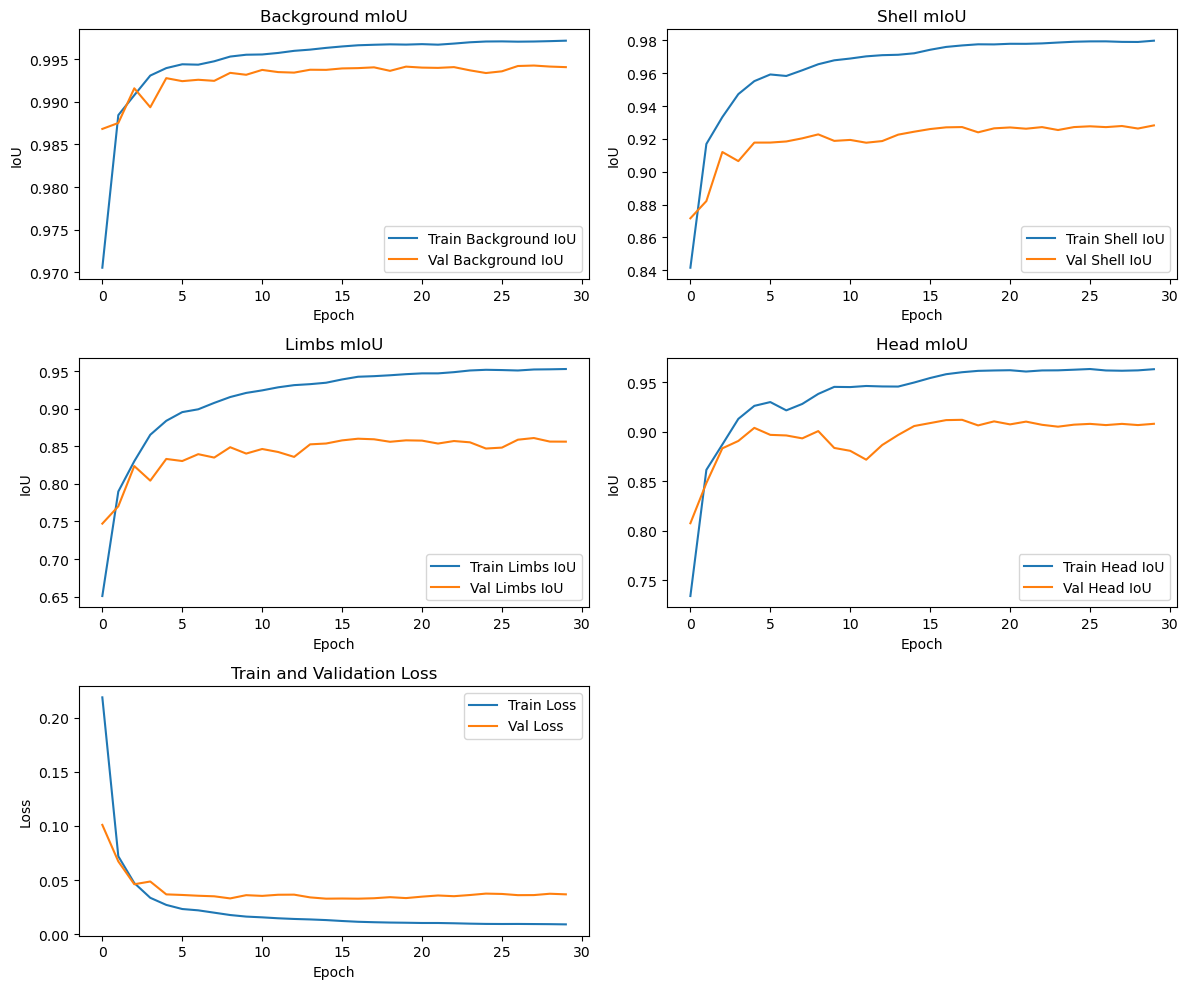

In [10]:

with open('history_DeepLabV3Plus_VIT3.json', 'r') as f:
    history = json.load(f)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, label in enumerate(['Background', 'Shell', 'Limbs', 'Head']):
    ax = axes[i // 2, i % 2]
    ax.plot(history['train_iou'][str(i)], label=f'Train {label} IoU')
    ax.plot(history['val_iou'][str(i)], label=f'Val {label} IoU')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('IoU')
    ax.set_title(f'{label} mIoU')
    ax.legend()

ax_loss = axes[2, 0]  
ax_loss.plot(history['train_loss'], label='Train Loss')
ax_loss.plot(history['val_loss'], label='Val Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Train and Validation Loss')
ax_loss.legend()

axes[2, 1].axis('off')

# 调整布局
plt.tight_layout()
plt.show()


# 5. Test models and show results

Congratulations on Reaching the Most Exciting Part! 
By now, you've hopefully completed the necessary steps following the instructions provided earlier. You should have either trained your models or downloaded the pre-trained models from [Google Drive](https://drive.google.com/drive/folders/1SW2LKlv_PPA5Lo6U--W6G__ymlBx9OnM?usp=sharing). Regardless of the path you've chosen, you should have at least one `.pth` model file in your root directory. Now, let's proceed to run the cells associated with your model and conduct some testing! 

*(Note: Mean-shift and K-means, our traditional methods, can be tested directly without loading any models.)*

For each model, there are two main testing cells:
1. **Testing mIoU on the Entire Test Set**: This part is time-consuming, and our code will print a log message after processing every 50 images.
2. **Segmenting a Specific Image**: Here, you'll select an image and use the model to observe its segmentation results, complete with the output image and corresponding IoU values.

In **Section 5.10**, we summarize the mean IoU (mIoU) results for each class across all models in a comprehensive table.

If all 7 deep learning `.pth` model files are already present in your root directory (the same directory as this Notebook)—you can download all of them at once from the [Google Drive link](https://drive.google.com/drive/folders/1SW2LKlv_PPA5Lo6U--W6G__ymlBx9OnM?usp=sharing)—then you can execute all the cells in **Section 5.11** to simultaneously view the segmentation performance of all models on a specific image.


### 5.1 Mean-shift

In [9]:
# Use mean shift method to evaluate mIoU on the test set

def apply_mean_shift_with_dynamic_threshold(segmented_image):
    """Classify Mean Shift results"""
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each region
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # Remap labels based on brightness order
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # Background
        cluster_order[0]: 1,  # Shell
        cluster_order[2]: 2,  # Limbs
        cluster_order[1]: 3   # Head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

# Evaluation function
def evaluate_mean_shift(test_loader):
    """Evaluate Mean Shift method on the test set"""
    mean_shift_ious = np.zeros(4)
    total_samples = len(test_loader)

    print(f"use Mean Shift to evaluate {total_samples} test imgs...")

    with torch.no_grad():
        for idx, (image, masks) in enumerate(test_loader):
            # Transfer images and masks to GPU
            image, masks = image.to(device), masks.to(device)
            
            # Apply Mean Shift segmentation (since Mean Shift is a CPU operation, transfer image back to CPU)
            segmented = mean_shift_segmentation(image.squeeze(0).cpu())
            predicted_mask = apply_mean_shift_with_dynamic_threshold(segmented)

            # Transfer IoU calculation data back to GPU
            y_true = torch.tensor(masks.argmax(1).squeeze(0).cpu().numpy()).to(device)
            y_pred = torch.tensor(predicted_mask).to(device)

            # Calculate IoU
            batch_ious = calculate_iou_per_class(y_true, y_pred)
            mean_shift_ious += np.nan_to_num(batch_ious)

            if (idx + 1) % 50 == 0:
                print(f"have processed {idx + 1} imgs...")

    mean_shift_ious /= total_samples

    print("\nMean Shift evaluation finishes!")
    print(f"background mIoU: {mean_shift_ious[0]:.4f}")
    print(f"shell mIoU: {mean_shift_ious[1]:.4f}")
    print(f"limbs mIoU: {mean_shift_ious[2]:.4f}")
    print(f"head mIoU: {mean_shift_ious[3]:.4f}")

    return mean_shift_ious

target_size = (256, 256)

# Create test dataset and loader
test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Run evaluation
mean_shift_ious = evaluate_mean_shift(test_loader)

use Mean Shift to evaluate 1154 test imgs...
have processed 50 imgs...
have processed 100 imgs...
have processed 150 imgs...
have processed 200 imgs...
have processed 250 imgs...
have processed 300 imgs...
have processed 350 imgs...
have processed 400 imgs...
have processed 450 imgs...
have processed 500 imgs...
have processed 550 imgs...
have processed 600 imgs...
have processed 650 imgs...
have processed 700 imgs...
have processed 750 imgs...
have processed 800 imgs...
have processed 850 imgs...
have processed 900 imgs...
have processed 950 imgs...
have processed 1000 imgs...
have processed 1050 imgs...
have processed 1100 imgs...
have processed 1150 imgs...

Mean Shift evaluation finishes!
background mIoU: 0.7319
back mIoU: 0.0137
limbs mIoU: 0.0494
head mIoU: 0.0223


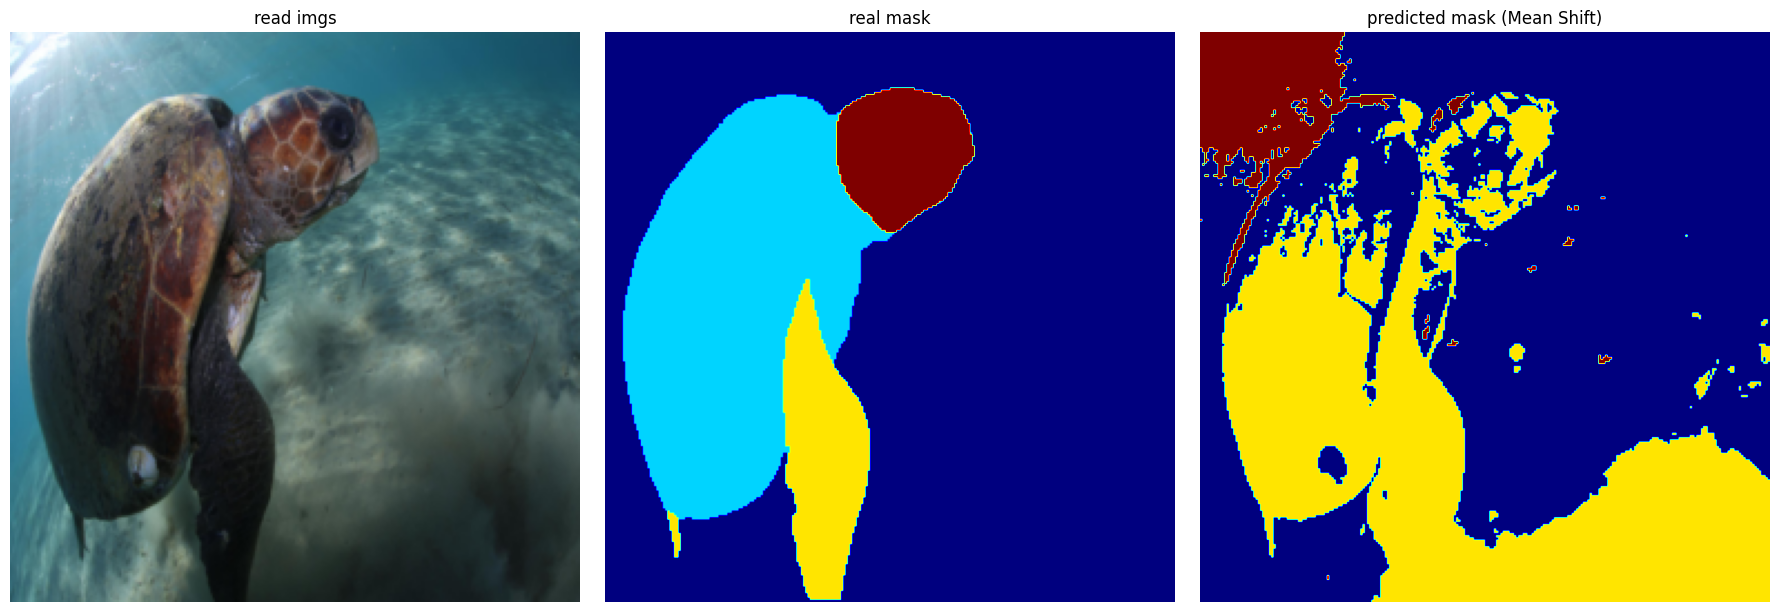

Background IoU: 0.6502
Shell IoU: 0.0000
Limbs IoU: 0.1635
Head IoU: 0.0095


In [34]:
test_image_idx = 4
target_size = (256, 256)
test_dataset = TurtleDataset(test_files['id'], coco)
image, mask = test_dataset[test_image_idx]

def apply_mean_shift_with_dynamic_threshold(segmented_image):
    """Classify Mean Shift results"""
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each region
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # Remap labels based on brightness order
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # Background
        cluster_order[0]: 1,  # Shell
        cluster_order[2]: 2,  # Limbs
        cluster_order[1]: 3   # Head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

# apply Mean Shift
segmented = mean_shift_segmentation(image)
predicted_mask = apply_mean_shift_with_dynamic_threshold(segmented)

# visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image.permute(1, 2, 0).cpu().numpy())
axes[0].set_title("read imgs")
axes[0].axis('off')

axes[1].imshow(mask.argmax(0).cpu().numpy(), cmap='jet')
axes[1].set_title("real mask")
axes[1].axis('off')

axes[2].imshow(predicted_mask, cmap='jet')
axes[2].set_title("predicted mask (Mean Shift)")
axes[2].axis('off')

plt.tight_layout()
plt.show()


mask = mask.argmax(0).numpy()  
segmented_image = mean_shift_segmentation(image)
predicted_mask = apply_mean_shift_with_dynamic_threshold(segmented_image)

mask_tensor = torch.tensor(mask)
pred_mask_tensor = torch.tensor(predicted_mask)

ious = calculate_iou_per_class(mask_tensor, pred_mask_tensor)

print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")

### 5.2 K-means

In [13]:
# Evaluate mIoU on the test set using K-means method

def apply_kmeans_with_dynamic_threshold(segmented_image):
    """Classify K-means results"""
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each cluster
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # Remap labels based on brightness sorting
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # background
        cluster_order[0]: 1,  # shell
        cluster_order[2]: 2,  # limbs
        cluster_order[1]: 3   # head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

# Evaluation function
def evaluate_kmeans(test_loader):
    """Evaluate K-means method on the test set"""
    kmeans_ious = np.zeros(4)
    total_samples = len(test_loader)

    print(f"use K-means to evaluate {total_samples} test imgs...")

    with torch.no_grad():
        for idx, (image, masks) in enumerate(test_loader):
            # Transfer images and masks to GPU
            image, masks = image.to(device), masks.to(device)
            
            # Apply K-means
            segmented = kmeans_segmentation(image.squeeze(0).cpu())
            predicted_mask = apply_kmeans_with_dynamic_threshold(segmented)

            # Transfer IoU calculation data to GPU
            y_true = torch.tensor(masks.argmax(1).squeeze(0).cpu().numpy()).to(device)
            y_pred = torch.tensor(predicted_mask).to(device)
            
            # Calculate IoU
            batch_ious = calculate_iou_per_class(y_true, y_pred)
            kmeans_ious += np.nan_to_num(batch_ious)

            if (idx + 1) % 50 == 0:
                print(f"have processed {idx + 1} imgs...")

    kmeans_ious /= total_samples

    print("\nK-means evaluation finishes!")
    print(f"background mIoU: {kmeans_ious[0]:.4f}")
    print(f"shell mIoU: {kmeans_ious[1]:.4f}")
    print(f"limbs mIoU: {kmeans_ious[2]:.4f}")
    print(f"head mIoU: {kmeans_ious[3]:.4f}")

    return kmeans_ious

target_size = (256, 256)

# Create test dataset and loader
test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Run evaluation
kmeans_ious = evaluate_kmeans(test_loader)


use K-means to evaluate 1154 test imgs...
have processed 50 imgs...
have processed 100 imgs...
have processed 150 imgs...
have processed 200 imgs...
have processed 250 imgs...
have processed 300 imgs...
have processed 350 imgs...
have processed 400 imgs...
have processed 450 imgs...
have processed 500 imgs...
have processed 550 imgs...
have processed 600 imgs...
have processed 650 imgs...
have processed 700 imgs...
have processed 750 imgs...
have processed 800 imgs...
have processed 850 imgs...
have processed 900 imgs...
have processed 950 imgs...
have processed 1000 imgs...
have processed 1050 imgs...
have processed 1100 imgs...
have processed 1150 imgs...

K-means evaluation finishes!
background mIoU: 0.4688
back mIoU: 0.0999
limbs mIoU: 0.0299
head mIoU: 0.0306


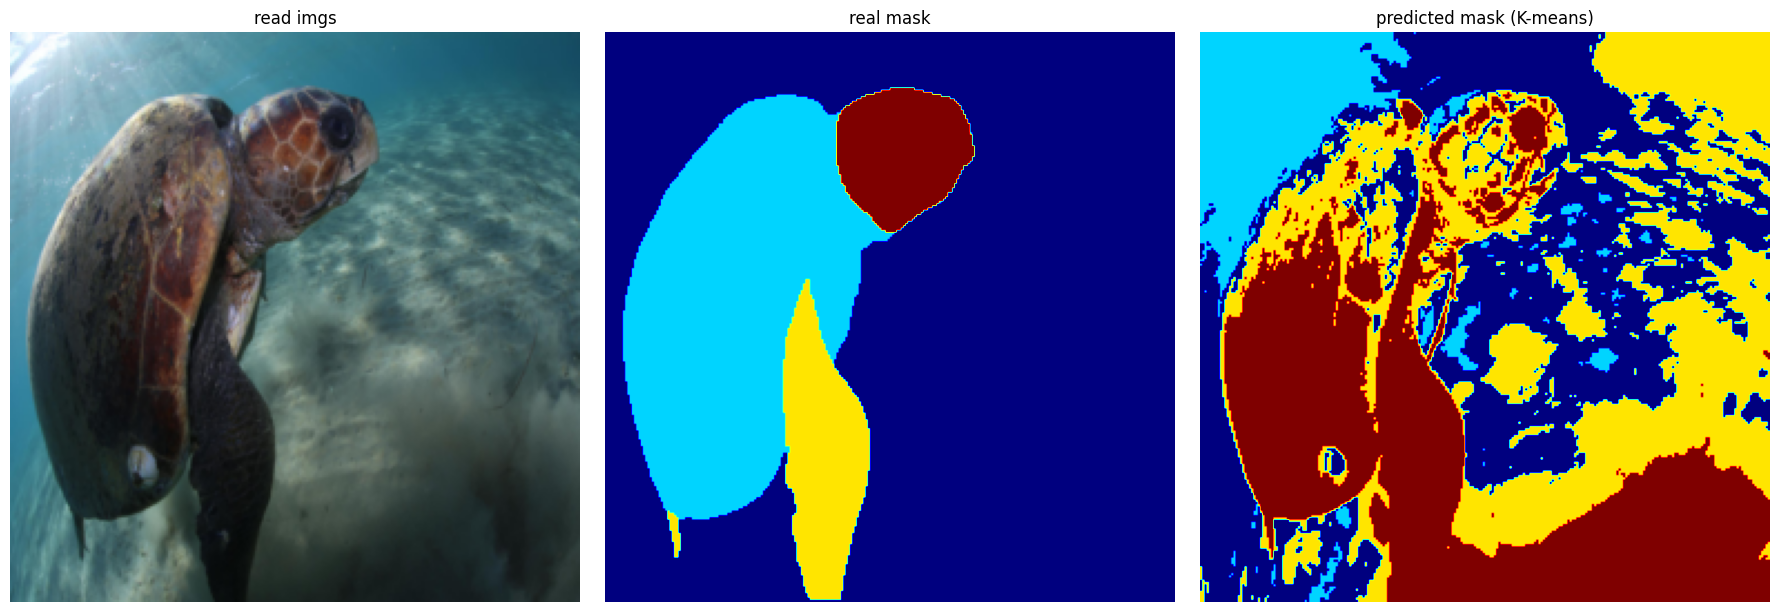

Background IoU: 0.3869
Shell IoU: 0.0354
Limbs IoU: 0.0024
Head IoU: 0.0453


In [33]:
test_image_idx = 4  # 3 (with water waves)
target_size = (256, 256)
test_dataset = TurtleDataset(test_files['id'], coco)
image, mask = test_dataset[test_image_idx]

def apply_kmeans_with_dynamic_threshold(segmented_image):
    """Classify K-means results"""
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each cluster
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # Remap labels based on brightness sorting
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # background
        cluster_order[0]: 1,  # shell
        cluster_order[2]: 2,  # limbs
        cluster_order[1]: 3   # head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

# apply k-means
segmented = kmeans_segmentation(image)
predicted_mask = apply_kmeans_with_dynamic_threshold(segmented)

# visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image.permute(1, 2, 0).cpu().numpy())
axes[0].set_title("read imgs")
axes[0].axis('off')

axes[1].imshow(mask.argmax(0).cpu().numpy(), cmap='jet')
axes[1].set_title("real mask")
axes[1].axis('off')

axes[2].imshow(predicted_mask, cmap='jet')
axes[2].set_title("predicted mask (K-means)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

mask = mask.argmax(0).numpy()  

segmented_image = kmeans_segmentation(image)

predicted_mask = apply_kmeans_with_dynamic_threshold(segmented_image)

mask_tensor = torch.tensor(mask)
pred_mask_tensor = torch.tensor(predicted_mask)

ious = calculate_iou_per_class(mask_tensor, pred_mask_tensor)

print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.3 U-Net

In [9]:
# Test mIOU on the test set
target_size = (256, 256)
model = UNet(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_unet_model.pth')) 
model.eval()  

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False) # Use batch_size=1 to evaluate one by one

num_classes = 4  
test_ious = np.zeros(num_classes)  
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad(): 
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)

        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)  

        processed_images += 1

        # Print progress every 50 images processed
        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

# Calculate mIoU
test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9629
Shell mIoU: 0.6062
Limbs mIoU: 0.5374
Head mIoU: 0.5034


C:\Users\chenxvda\AppData\Local\Temp\ipykernel_4208\4177424500.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_unet_model.pth'))


Testing on image: images/t093/qrDtyxdNOK.jpeg


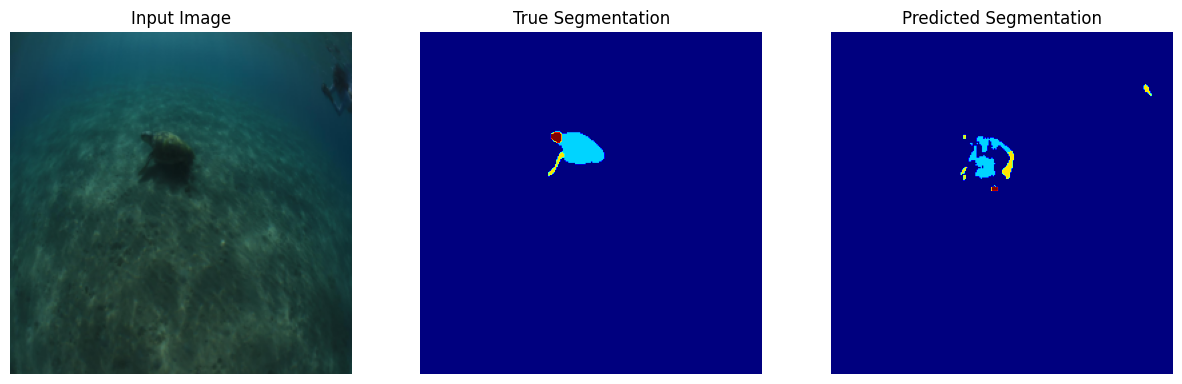

Background IoU: 0.9898
Shell IoU: 0.2963
Limbs IoU: 0.0739
Head IoU: 0.0000


In [31]:
# Test the segmentation effect and IOU of specific images on the test set
target_size = (256, 256)
model = UNet(num_classes=4).to(device)
model.load_state_dict(torch.load('best_unet_model.pth'))
model.eval()  

id = 201  # Choose image
test_image_path = test_files.iloc[id]['file_name']  
print(f"Testing on image: {test_image_path}")

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).float()

image = Image.open(os.path.join(data_path,test_image_path)).convert('RGB')
processed_image = preprocess_image(image).unsqueeze(0).to(device)  

with torch.no_grad():
    output = model(processed_image)  
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy()

test_dataset = TurtleDataset(test_files['id'], coco)
_, masks = test_dataset[id]

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(_.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.4 DeepLabV3

In [14]:
# Test mIOU on the test set
target_size = (256, 256)
model = DeepLabV3(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3_model.pth'))  
model.eval()  

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False) 

num_classes = 4  
test_ious = np.zeros(num_classes)  
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad():  
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)


        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)  
       
        processed_images += 1

        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9918
Shell mIoU: 0.8755
Limbs mIoU: 0.7092
Head mIoU: 0.7326


C:\Users\chenxvda\AppData\Local\Temp\ipykernel_4208\340017379.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_DeepLabV3_model.pth'

Testing on image: images/t093/qrDtyxdNOK.jpeg


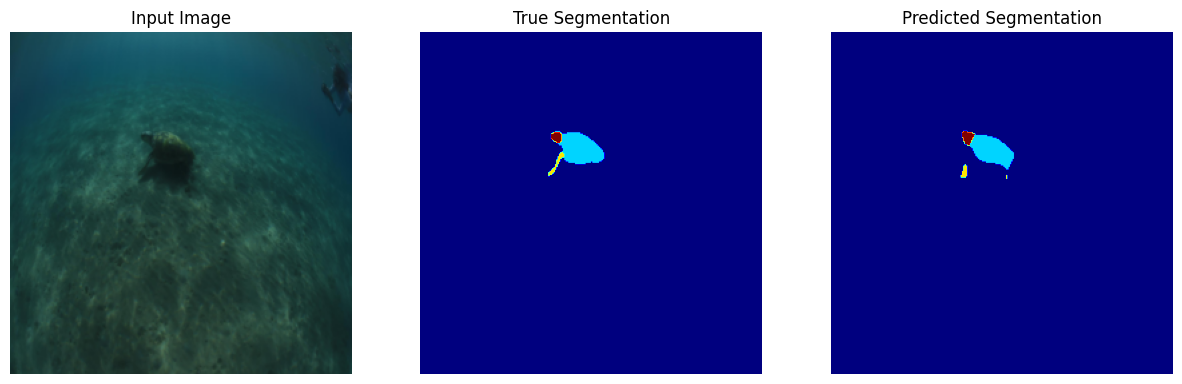

Background IoU: 0.9969
Shell IoU: 0.7866
Limbs IoU: 0.1892
Head IoU: 0.7083


In [30]:
# Test the segmentation effect and IOU of specific images on the test set
target_size = (256, 256)
model = DeepLabV3(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3_model.pth'))  
model.eval() 

id = 201  # Choose image
test_image_path = test_files.iloc[id]['file_name']
print(f"Testing on image: {test_image_path}")

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).float()

image = Image.open(os.path.join(data_path,test_image_path)).convert('RGB')
processed_image = preprocess_image(image).unsqueeze(0).to(device) 

with torch.no_grad():
    output = model(processed_image)
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy() 

test_dataset = TurtleDataset(test_files['id'], coco)
_, masks = test_dataset[id]

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(_.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.5 DeepLabV3Plus

In [11]:
# Test mIOU on the test set
target_size = (256, 256)
model = DeepLabV3Plus(num_classes=4).to(device) 
model.load_state_dict(torch.load('best_DeepLabV3Plus_model.pth'))  
model.eval()  

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  


num_classes = 4 
test_ious = np.zeros(num_classes) 
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad():  
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)

        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)  

        processed_images += 1

        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9922
Shell mIoU: 0.8704
Limbs mIoU: 0.7307
Head mIoU: 0.7107


C:\Users\chenxvda\AppData\Local\Temp\ipykernel_13596\1947017410.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_DeepLabV3Plus_mode

images/t093/KxsYYHIhdb.jpeg
Testing on image: images/t093/KxsYYHIhdb.jpeg


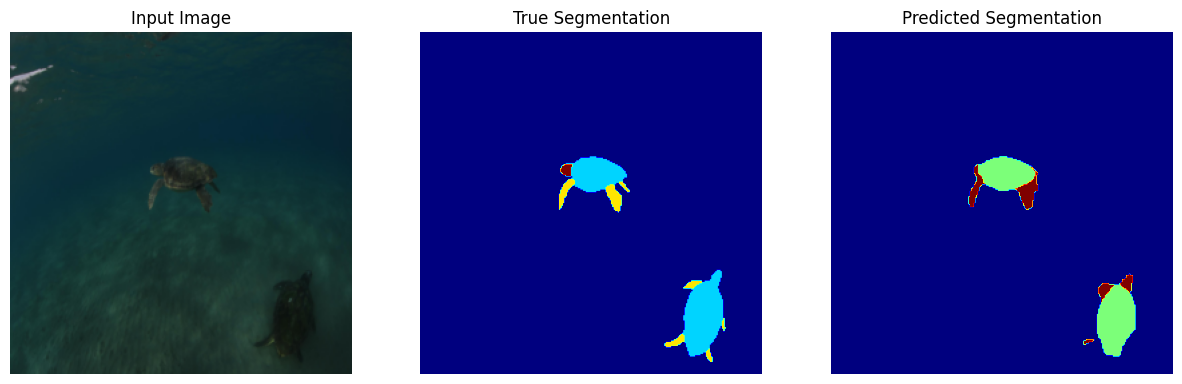

Background IoU: 0.9921
Shell IoU: 0.8062
Limbs IoU: 0.3926
Head IoU: 0.0000


In [126]:
# Test the segmentation effect and IOU of specific images on the test set
target_size = (256, 256)
model = DeepLabV3Plus(num_classes=4).to(device) 
model.load_state_dict(torch.load('best_DeepLabV3Plus_model.pth')) 
model.eval()  

id = 197  # Choose image
test_image_path = test_files.iloc[id]['file_name'] 
print(test_image_path)
print(f"Testing on image: {test_image_path}")

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).float()

image = Image.open(os.path.join(data_path,test_image_path)).convert('RGB')
processed_image = preprocess_image(image).unsqueeze(0).to(device)  

with torch.no_grad():
    output = model(processed_image) 
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy()  

test_dataset = TurtleDataset(test_files['id'], coco)
_, masks = test_dataset[id]

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(_.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.6 DeepLabV3Plus_MobileNetV2

In [16]:
# Test mIOU on the test set
target_size = (256, 256)
model = DeepLabV3Plus_MobileNetV2(num_classes=4).to(device) 
model.load_state_dict(torch.load('best_DeepLabV3Plus_MobileNetV2_model.pth'))  
model.eval()  

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  


num_classes = 4  
test_ious = np.zeros(num_classes)  
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad():  
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)

        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)

        processed_images += 1

        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9907
Shell mIoU: 0.8525
Limbs mIoU: 0.6955
Head mIoU: 0.6789


C:\Users\chenxvda\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\chenxvda\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\chenxvda\AppData\Local\Temp\ipykernel_4208\3461286901.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/

Testing on image: images/t007/NkKZTFSVnv.JPG


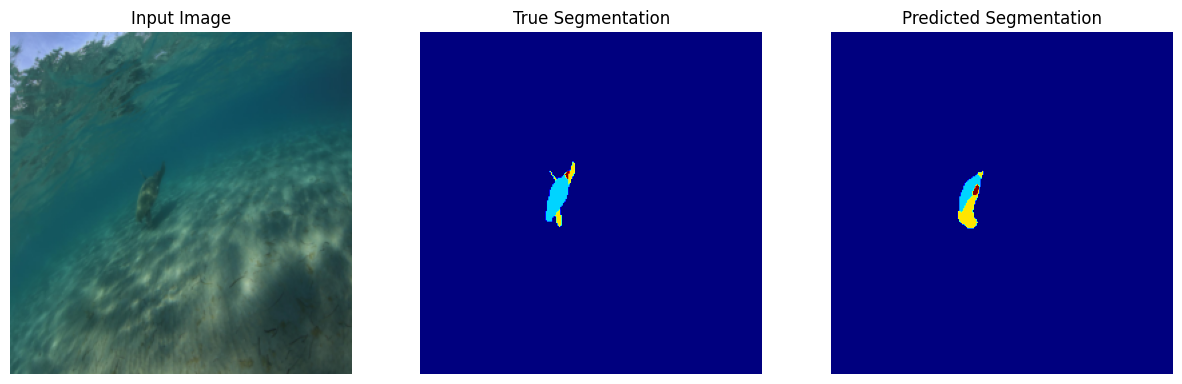

Background IoU: 0.9979
Shell IoU: 0.5121
Limbs IoU: 0.1805
Head IoU: 0.0000


In [27]:
# Test the segmentation effect and IOU of specific images on the test set
target_size = (256, 256)
model = DeepLabV3Plus_MobileNetV2(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3Plus_MobileNetV2_model.pth'))  
model.eval()  

id = 8  # Choose image
test_image_path = test_files.iloc[id]['file_name']  
print(f"Testing on image: {test_image_path}")

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).float()

image = Image.open(os.path.join(data_path,test_image_path)).convert('RGB')
processed_image = preprocess_image(image).unsqueeze(0).to(device)  

with torch.no_grad():
    output = model(processed_image) 
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy() 

test_dataset = TurtleDataset(test_files['id'], coco)
_, masks = test_dataset[id]

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(_.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.7 DeepLabV3Plus_VIT

In [9]:
# Test mIOU on the test set

target_size = (224, 224)

model = DeepLabV3Plus_VIT(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT_model.pth')) 
model.eval()  

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  

num_classes = 4 
test_ious = np.zeros(num_classes)  
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad():  
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)

        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)  

        processed_images += 1

        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9837
Shell mIoU: 0.8269
Limbs mIoU: 0.5720
Head mIoU: 0.5919


C:\Users\chenxvda\AppData\Local\Temp\ipykernel_4208\2992188803.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT_m

Testing on image: images/t007/NkKZTFSVnv.JPG


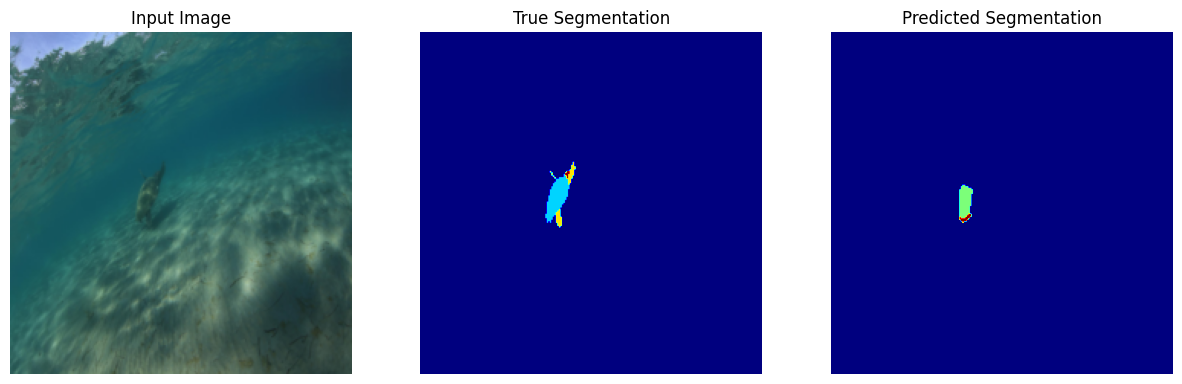

Background IoU: 0.9957
Shell IoU: 0.4913
Limbs IoU: 0.0909
Head IoU: 0.0000


In [26]:
# Test the segmentation effect and IOU of specific images on the test set

target_size = (224, 224)

model = DeepLabV3Plus_VIT(num_classes=4).to(device)
model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT_model.pth')) 
model.eval()  

id = 8  
test_image_path = test_files.iloc[id]['file_name']
print(f"Testing on image: {test_image_path}")

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).float()

image = Image.open(os.path.join(data_path,test_image_path)).convert('RGB')
processed_image = preprocess_image(image).unsqueeze(0).to(device)  

with torch.no_grad():
    output = model(processed_image)  
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy() 

test_dataset = TurtleDataset(test_files['id'], coco)
_, masks = test_dataset[id]

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(_.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.8 DeepLabV3Plus_VIT2

In [9]:
# Test mIOU on the test set

target_size = (224, 224)

model = DeepLabV3Plus_VIT2(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT2_model.pth'))  
model.eval()

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  

num_classes = 4 
test_ious = np.zeros(num_classes) 
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad():  
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)

        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)  

        processed_images += 1

        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9919
Shell mIoU: 0.8671
Limbs mIoU: 0.7125
Head mIoU: 0.7059


C:\Users\chenxvda\AppData\Local\Temp\ipykernel_4208\1711288432.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT2_

Testing on image: images/t007/NkKZTFSVnv.JPG


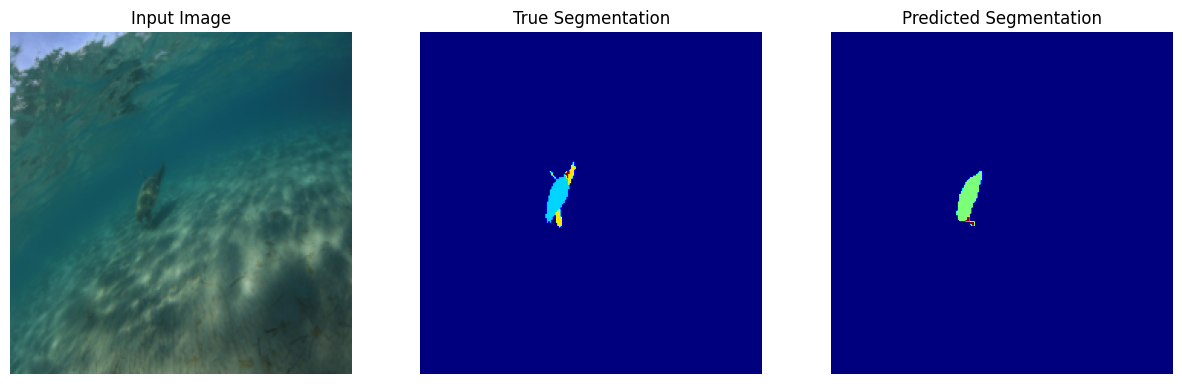

Background IoU: 0.9984
Shell IoU: 0.8095
Limbs IoU: 0.1375
Head IoU: 0.0000


In [25]:
# Test the segmentation effect and IOU of specific images on the test set
target_size = (224, 224)

model = DeepLabV3Plus_VIT2(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT2_model.pth'))  
model.eval() 

id = 8  # Choose a image
test_image_path = test_files.iloc[id]['file_name']
print(f"Testing on image: {test_image_path}")

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).float()

image = Image.open(os.path.join(data_path,test_image_path)).convert('RGB')
processed_image = preprocess_image(image).unsqueeze(0).to(device)  

with torch.no_grad():
    output = model(processed_image)  
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy() 

test_dataset = TurtleDataset(test_files['id'], coco)
_, masks = test_dataset[id]

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(_.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.9 DeepLabV3Plus_VIT3

In [11]:
# Test mIOU on the test set

target_size = (224, 224)

model = DeepLabV3Plus_VIT3(num_classes=4).to(device) 
model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT3_model.pth'))
model.eval()  

test_dataset = TurtleDataset(test_files['id'], coco)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  

num_classes = 4 
test_ious = np.zeros(num_classes)  
total_samples = len(test_loader)

print(f"Evaluating on {total_samples} test images...")

processed_images = 0

with torch.no_grad(): 
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        predicted_mask = torch.argmax(outputs, dim=1)

        batch_ious = calculate_iou_per_class(masks.argmax(1), predicted_mask)
        test_ious += np.nan_to_num(batch_ious)  

        processed_images += 1

        if processed_images % 50 == 0:
            print(f"Processed {processed_images} images...")

test_ious /= total_samples

print("\nTest Set Evaluation Complete!")
print(f"Background mIoU: {test_ious[0]:.4f}")
print(f"Shell mIoU: {test_ious[1]:.4f}")
print(f"Limbs mIoU: {test_ious[2]:.4f}")
print(f"Head mIoU: {test_ious[3]:.4f}")


Evaluating on 1154 test images...
Processed 50 images...
Processed 100 images...
Processed 150 images...
Processed 200 images...
Processed 250 images...
Processed 300 images...
Processed 350 images...
Processed 400 images...
Processed 450 images...
Processed 500 images...
Processed 550 images...
Processed 600 images...
Processed 650 images...
Processed 700 images...
Processed 750 images...
Processed 800 images...
Processed 850 images...
Processed 900 images...
Processed 950 images...
Processed 1000 images...
Processed 1050 images...
Processed 1100 images...
Processed 1150 images...

Test Set Evaluation Complete!
Background mIoU: 0.9938
Shell mIoU: 0.9010
Limbs mIoU: 0.7775
Head mIoU: 0.7803


C:\Users\chenxvda\AppData\Local\Temp\ipykernel_11820\1134111976.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT3

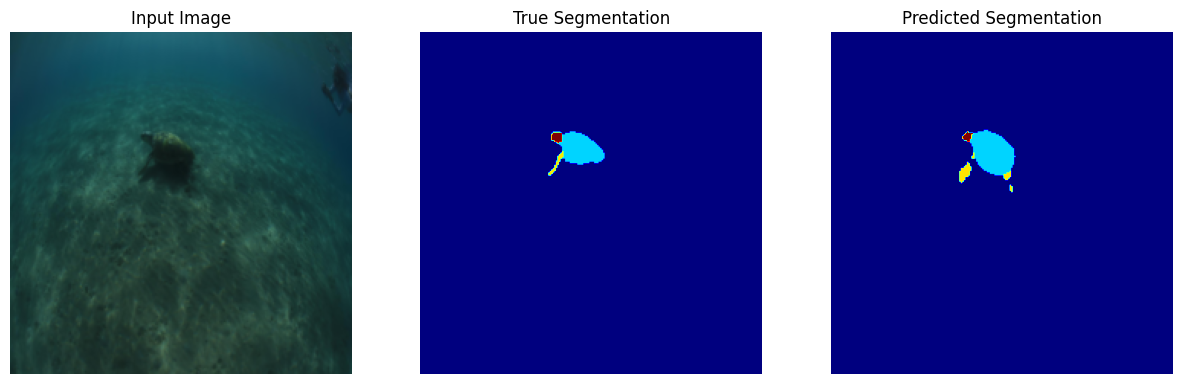

Background IoU: 0.9946
Shell IoU: 0.7081
Limbs IoU: 0.2252
Head IoU: 0.6829


In [159]:
# Test the segmentation effect and IOU of specific images on the test set

target_size = (224, 224)

model = DeepLabV3Plus_VIT3(num_classes=4).to(device)  
model.load_state_dict(torch.load('best_DeepLabV3Plus_VIT3_model.pth')) 
model.eval()  

id = 201  # Choose a image

test_dataset = TurtleDataset(test_files['id'], coco)
image, masks = test_dataset[id]


with torch.no_grad():
    output = model(image.unsqueeze(0).to(device))  
    predicted_classes = torch.argmax(output, dim=1).squeeze().cpu().numpy()  


plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image.permute(1, 2, 0).cpu().numpy())
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks.argmax(0).cpu().numpy(), cmap='jet')
plt.title("True Segmentation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_classes, cmap='jet')
plt.title("Predicted Segmentation")
plt.axis('off')

plt.show()


mask_batch = masks.unsqueeze(0).to(device)  # shape: (1, num_classes, H, W)
predicted_mask = torch.argmax(output, dim=1)

ious = calculate_iou_per_class(mask_batch.argmax(1), predicted_mask)
print(f"Background IoU: {ious[0]:.4f}")
print(f"Shell IoU: {ious[1]:.4f}")
print(f"Limbs IoU: {ious[2]:.4f}")
print(f"Head IoU: {ious[3]:.4f}")


### 5.10 Summary of mIoU Results in test set  of all the models

<div style="text-align: center;">
  <table style="margin-left: auto; margin-right: auto; border: 1px solid black; border-collapse: collapse;">
    <tr>
      <th style="border: 1px solid black; padding: 8px;">Method Type</th>
      <th style="border: 1px solid black; padding: 8px;">Model</th>
      <th style="border: 1px solid black; padding: 8px;">Shell mIoU</th>
      <th style="border: 1px solid black; padding: 8px;">Limbs mIoU</th>
      <th style="border: 1px solid black; padding: 8px;">Head mIoU</th>
      <th style="border: 1px solid black; padding: 8px;">min mIoU</th>
      <th style="border: 1px solid black; padding: 8px;">average mIoU</th>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Traditional ML</td>
      <td style="border: 1px solid black; padding: 8px;">Mean-shift</td>
      <td style="border: 1px solid black; padding: 8px;">0.0137</td>
      <td style="border: 1px solid black; padding: 8px;">0.0494</td>
      <td style="border: 1px solid black; padding: 8px;">0.0223</td>
      <td style="border: 1px solid black; padding: 8px;">0.0137</td>
      <td style="border: 1px solid black; padding: 8px;">0.0285</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Traditional ML</td>
      <td style="border: 1px solid black; padding: 8px;">K-means</td>
      <td style="border: 1px solid black; padding: 8px;">0.0999</td>
      <td style="border: 1px solid black; padding: 8px;">0.0299</td>
      <td style="border: 1px solid black; padding: 8px;">0.0306</td>
      <td style="border: 1px solid black; padding: 8px;">0.0299</td>
      <td style="border: 1px solid black; padding: 8px;">0.0535</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">U-Net</td>
      <td style="border: 1px solid black; padding: 8px;">0.6062</td>
      <td style="border: 1px solid black; padding: 8px;">0.5374</td>
      <td style="border: 1px solid black; padding: 8px;">0.5034</td>
      <td style="border: 1px solid black; padding: 8px;">0.5034</td>
      <td style="border: 1px solid black; padding: 8px;">0.5490</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">DeepLabV3</td>
      <td style="border: 1px solid black; padding: 8px;">0.8755</td>
      <td style="border: 1px solid black; padding: 8px;">0.7092</td>
      <td style="border: 1px solid black; padding: 8px;">0.7326</td>
      <td style="border: 1px solid black; padding: 8px;">0.7092</td>
      <td style="border: 1px solid black; padding: 8px;">0.7724</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">DeepLabV3Plus</td>
      <td style="border: 1px solid black; padding: 8px;">0.8704</td>
      <td style="border: 1px solid black; padding: 8px;">0.7307</td>
      <td style="border: 1px solid black; padding: 8px;">0.7107</td>
      <td style="border: 1px solid black; padding: 8px;">0.7107</td>
      <td style="border: 1px solid black; padding: 8px;">0.7706</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">DeepLabV3Plus_MobileNetV2</td>
      <td style="border: 1px solid black; padding: 8px;">0.8525</td>
      <td style="border: 1px solid black; padding: 8px;">0.6955</td>
      <td style="border: 1px solid black; padding: 8px;">0.6789</td>
      <td style="border: 1px solid black; padding: 8px;">0.6789</td>
      <td style="border: 1px solid black; padding: 8px;">0.7423</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">DeepLabV3Plus_VIT</td>
      <td style="border: 1px solid black; padding: 8px;">0.8269</td>
      <td style="border: 1px solid black; padding: 8px;">0.5720</td>
      <td style="border: 1px solid black; padding: 8px;">0.5919</td>
      <td style="border: 1px solid black; padding: 8px;">0.5720</td>
      <td style="border: 1px solid black; padding: 8px;">0.6636</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">DeepLabV3Plus_VIT2</td>
      <td style="border: 1px solid black; padding: 8px;">0.8671</td>
      <td style="border: 1px solid black; padding: 8px;">0.7125</td>
      <td style="border: 1px solid black; padding: 8px;">0.7059</td>
      <td style="border: 1px solid black; padding: 8px;">0.7059</td>
      <td style="border: 1px solid black; padding: 8px;">0.7618</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px;">DeepLabV3Plus_VIT3</td>
      <td style="border: 1px solid black; padding: 8px;">0.9010</td>
      <td style="border: 1px solid black; padding: 8px;">0.7775</td>
      <td style="border: 1px solid black; padding: 8px;">0.7803</td>
      <td style="border: 1px solid black; padding: 8px;">0.7775</td>
      <td style="border: 1px solid black; padding: 8px;">0.8196</td>
    </tr>
  </table>
</div>


### 5.11 Test the segmentation effect of specific images on the test set (compare all the models)

Before running 5.11, ensure that your root directory (the same directory as this Notebook) contains all seven of our deep learning .pth model files.

In [283]:

def apply_mean_with_dynamic_threshold(segmented_image):
    predicted_mask = np.zeros_like(segmented_image)

    # Calculate the average brightness of each cluster
    cluster_means = []
    for i in range(4):
        cluster_pixels = segmented_image == i
        if np.any(cluster_pixels):
            cluster_means.append(np.mean(cluster_pixels))
        else:
            cluster_means.append(0)

    # Remap labels based on brightness sorting
    cluster_order = np.argsort(cluster_means)
    label_map = {
        cluster_order[3]: 0,  # background
        cluster_order[0]: 1,  # shell
        cluster_order[2]: 2,  # limbs
        cluster_order[1]: 3   # head
    }

    for old_label, new_label in label_map.items():
        predicted_mask[segmented_image == old_label] = new_label

    return predicted_mask

In [284]:
# Load all the models

target_size = (256, 256)

model_UNet = UNet(num_classes=4).to(device)  
model_UNet.load_state_dict(torch.load('best_unet_model.pth'))  
model_UNet.eval()  

model_DeepLabV3 = DeepLabV3(num_classes=4).to(device)  
model_DeepLabV3.load_state_dict(torch.load('best_DeepLabV3_model.pth'))  
model_DeepLabV3.eval() 

model_DeepLabV3Plus = DeepLabV3Plus(num_classes=4).to(device)  
model_DeepLabV3Plus.load_state_dict(torch.load('best_DeepLabV3Plus_model.pth'))  
model_DeepLabV3Plus.eval() 

model_DeepLabV3Plus_MobileNetV2 = DeepLabV3Plus_MobileNetV2(num_classes=4).to(device)  
model_DeepLabV3Plus_MobileNetV2.load_state_dict(torch.load('best_DeepLabV3Plus_MobileNetV2_model.pth'))  
model_DeepLabV3Plus_MobileNetV2.eval() 

target_size = (224, 224)

model_DeepLabV3Plus_VIT = DeepLabV3Plus_VIT(num_classes=4).to(device)  
model_DeepLabV3Plus_VIT.load_state_dict(torch.load('best_DeepLabV3Plus_VIT_model.pth'))  
model_DeepLabV3Plus_VIT.eval() 

model_DeepLabV3Plus_VIT2 = DeepLabV3Plus_VIT2(num_classes=4).to(device)  
model_DeepLabV3Plus_VIT2.load_state_dict(torch.load('best_DeepLabV3Plus_VIT2_model.pth'))  
model_DeepLabV3Plus_VIT2.eval() 

model_DeepLabV3Plus_VIT3 = DeepLabV3Plus_VIT3(num_classes=4).to(device)  
model_DeepLabV3Plus_VIT3.load_state_dict(torch.load('best_DeepLabV3Plus_VIT3_model.pth'))  
model_DeepLabV3Plus_VIT3.eval() 

C:\Users\chenxvda\AppData\Local\Temp\ipykernel_11820\842308652.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_UNet.load_state_dict(torch.load('best_unet_model.pth

DeepLabV3Plus_VIT3(
  (encoder): FeatureGetterNet(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 384, kernel_size=(8, 8), stride=(8, 8))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=384, out_features=1152, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=384, out_features=384, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_feat

In [285]:
from matplotlib.gridspec import GridSpec 
def test(ID):
    ious = [[],[],[],[],[],[],[],[],[]]
    target_size = (256, 256)
    test_dataset = TurtleDataset(test_files['id'], coco)
    image, mask = test_dataset[ID]
    
    model_mean_shift = mean_shift_segmentation(image)
    predicted_mask_mean_shift = apply_mean_with_dynamic_threshold(model_mean_shift)
    ious[0] = calculate_iou_per_class(torch.tensor(mask.argmax(0).numpy()), torch.tensor(predicted_mask_mean_shift))
    
    model_kmeans = kmeans_segmentation(image)
    predicted_mask_kmeans = apply_mean_with_dynamic_threshold(model_kmeans)
    ious[1] = calculate_iou_per_class(torch.tensor(mask.argmax(0).numpy()), torch.tensor(predicted_mask_kmeans))
    
    with torch.no_grad():
        output_UNet = model_UNet(image.unsqueeze(0).to(device)) 
        predicted_classes_UNet = torch.argmax(output_UNet, dim=1).squeeze().cpu().numpy() 
        ious[2] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_UNet, dim=1))
        
        output_DeepLabV3 = model_DeepLabV3(image.unsqueeze(0).to(device)) 
        predicted_classes_DeepLabV3 = torch.argmax(output_DeepLabV3, dim=1).squeeze().cpu().numpy()
        ious[3] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_DeepLabV3, dim=1))
        
        output_DeepLabV3Plus = model_DeepLabV3Plus(image.unsqueeze(0).to(device)) 
        predicted_classes_DeepLabV3Plus = torch.argmax(output_DeepLabV3Plus, dim=1).squeeze().cpu().numpy()
        ious[4] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_DeepLabV3Plus, dim=1))
    
        output_DeepLabV3Plus_MobileNetV2 = model_DeepLabV3Plus_MobileNetV2(image.unsqueeze(0).to(device)) 
        predicted_classes_DeepLabV3Plus_MobileNetV2 = torch.argmax(output_DeepLabV3Plus_MobileNetV2, dim=1).squeeze().cpu().numpy()
        ious[5] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_DeepLabV3Plus_MobileNetV2, dim=1))
    
        target_size = (224, 224)
        test_dataset = TurtleDataset(test_files['id'], coco)
        image, mask = test_dataset[ID]
        
        output_DeepLabV3Plus_VIT = model_DeepLabV3Plus_VIT(image.unsqueeze(0).to(device)) 
        predicted_classes_DeepLabV3Plus_VIT = torch.argmax(output_DeepLabV3Plus_VIT, dim=1).squeeze().cpu().numpy()
        ious[6] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_DeepLabV3Plus_VIT, dim=1))
        
        output_DeepLabV3Plus_VIT2 = model_DeepLabV3Plus_VIT2(image.unsqueeze(0).to(device)) 
        predicted_classes_DeepLabV3Plus_VIT2 = torch.argmax(output_DeepLabV3Plus_VIT2, dim=1).squeeze().cpu().numpy()
        ious[7] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_DeepLabV3Plus_VIT2, dim=1))
    
        output_DeepLabV3Plus_VIT3 = model_DeepLabV3Plus_VIT3(image.unsqueeze(0).to(device)) 
        predicted_classes_DeepLabV3Plus_VIT3 = torch.argmax(output_DeepLabV3Plus_VIT3, dim=1).squeeze().cpu().numpy()
        ious[8] = calculate_iou_per_class(mask.unsqueeze(0).to(device).argmax(1), torch.argmax(output_DeepLabV3Plus_VIT3, dim=1))

        # visualize results with three images per row
        fig, axes = plt.subplots(3, 4, figsize=(20, 18))
        
        axes[0, 0].imshow(image.permute(1, 2, 0).cpu().numpy())
        axes[0, 0].set_title("Input Image")
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(mask.argmax(0).cpu().numpy(), cmap='jet')
        axes[0, 1].set_title("True Segmentation")
        axes[0, 1].axis('off')
        
        axes[0, 2].imshow(predicted_mask_mean_shift, cmap='jet')
        axes[0, 2].set_title(f"Mean Shift\nave IoU: {np.mean(ious[0]):.4f}")
        #axes[0, 2].set_title(
        #    f"Mean Shift\n"
        #    f"Background: {ious[0][0]:.4f}\nShell: {ious[0][1]:.4f}\n"
        #    f"Limbs: {ious[0][2]:.4f}\nHead: {ious[0][3]:.4f}"
        #)
        axes[0, 2].axis('off')
        
        axes[0, 3].imshow(predicted_mask_kmeans, cmap='jet')
        axes[0, 3].set_title(f"K-means\nave IoU: {np.mean(ious[1]):.4f}")
        axes[0, 3].axis('off')
        
        axes[1, 0].imshow(predicted_classes_UNet, cmap='jet')
        axes[1, 0].set_title(f"U-Net\nave IoU: {np.mean(ious[2]):.4f}")
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(predicted_classes_DeepLabV3, cmap='jet')
        axes[1, 1].set_title(f"DeepLabV3\nave IoU: {np.mean(ious[3]):.4f}")
        axes[1, 1].axis('off')
        
        axes[1, 2].imshow(predicted_classes_DeepLabV3Plus, cmap='jet')
        axes[1, 2].set_title(f"DeepLabV3Plus\nave IoU: {np.mean(ious[4]):.4f}")
        axes[1, 2].axis('off')
        
        axes[1, 3].imshow(predicted_classes_DeepLabV3Plus_MobileNetV2, cmap='jet')
        axes[1, 3].set_title(f"DeepLabV3Plus-MobileNetV2\nave IoU: {np.mean(ious[5]):.4f}")
        axes[1, 3].axis('off')
        
        axes[2, 0].imshow(predicted_classes_DeepLabV3Plus_VIT, cmap='jet')
        axes[2, 0].set_title(f"DeepLabV3Plus-ViT\nave IoU: {np.mean(ious[6]):.4f}")
        axes[2, 0].axis('off')

        axes[2, 1].imshow(predicted_classes_DeepLabV3Plus_VIT2, cmap='jet')
        axes[2, 1].set_title(f"DeepLabV3Plus-ViT2\nave IoU: {np.mean(ious[7]):.4f}")
        axes[2, 1].axis('off')

        axes[2, 2].imshow(predicted_classes_DeepLabV3Plus_VIT3, cmap='jet')
        axes[2, 2].set_title(f"DeepLabV3Plus-ViT3\nave IoU: {np.mean(ious[8]):.4f}")
        axes[2, 2].axis('off')
        
        for i in range(2, 4):
            axes[2, i].axis('off')
        
        plt.tight_layout()
        plt.subplots_adjust(hspace=0.3) 
        
        plt.show()




High-Quality Images:


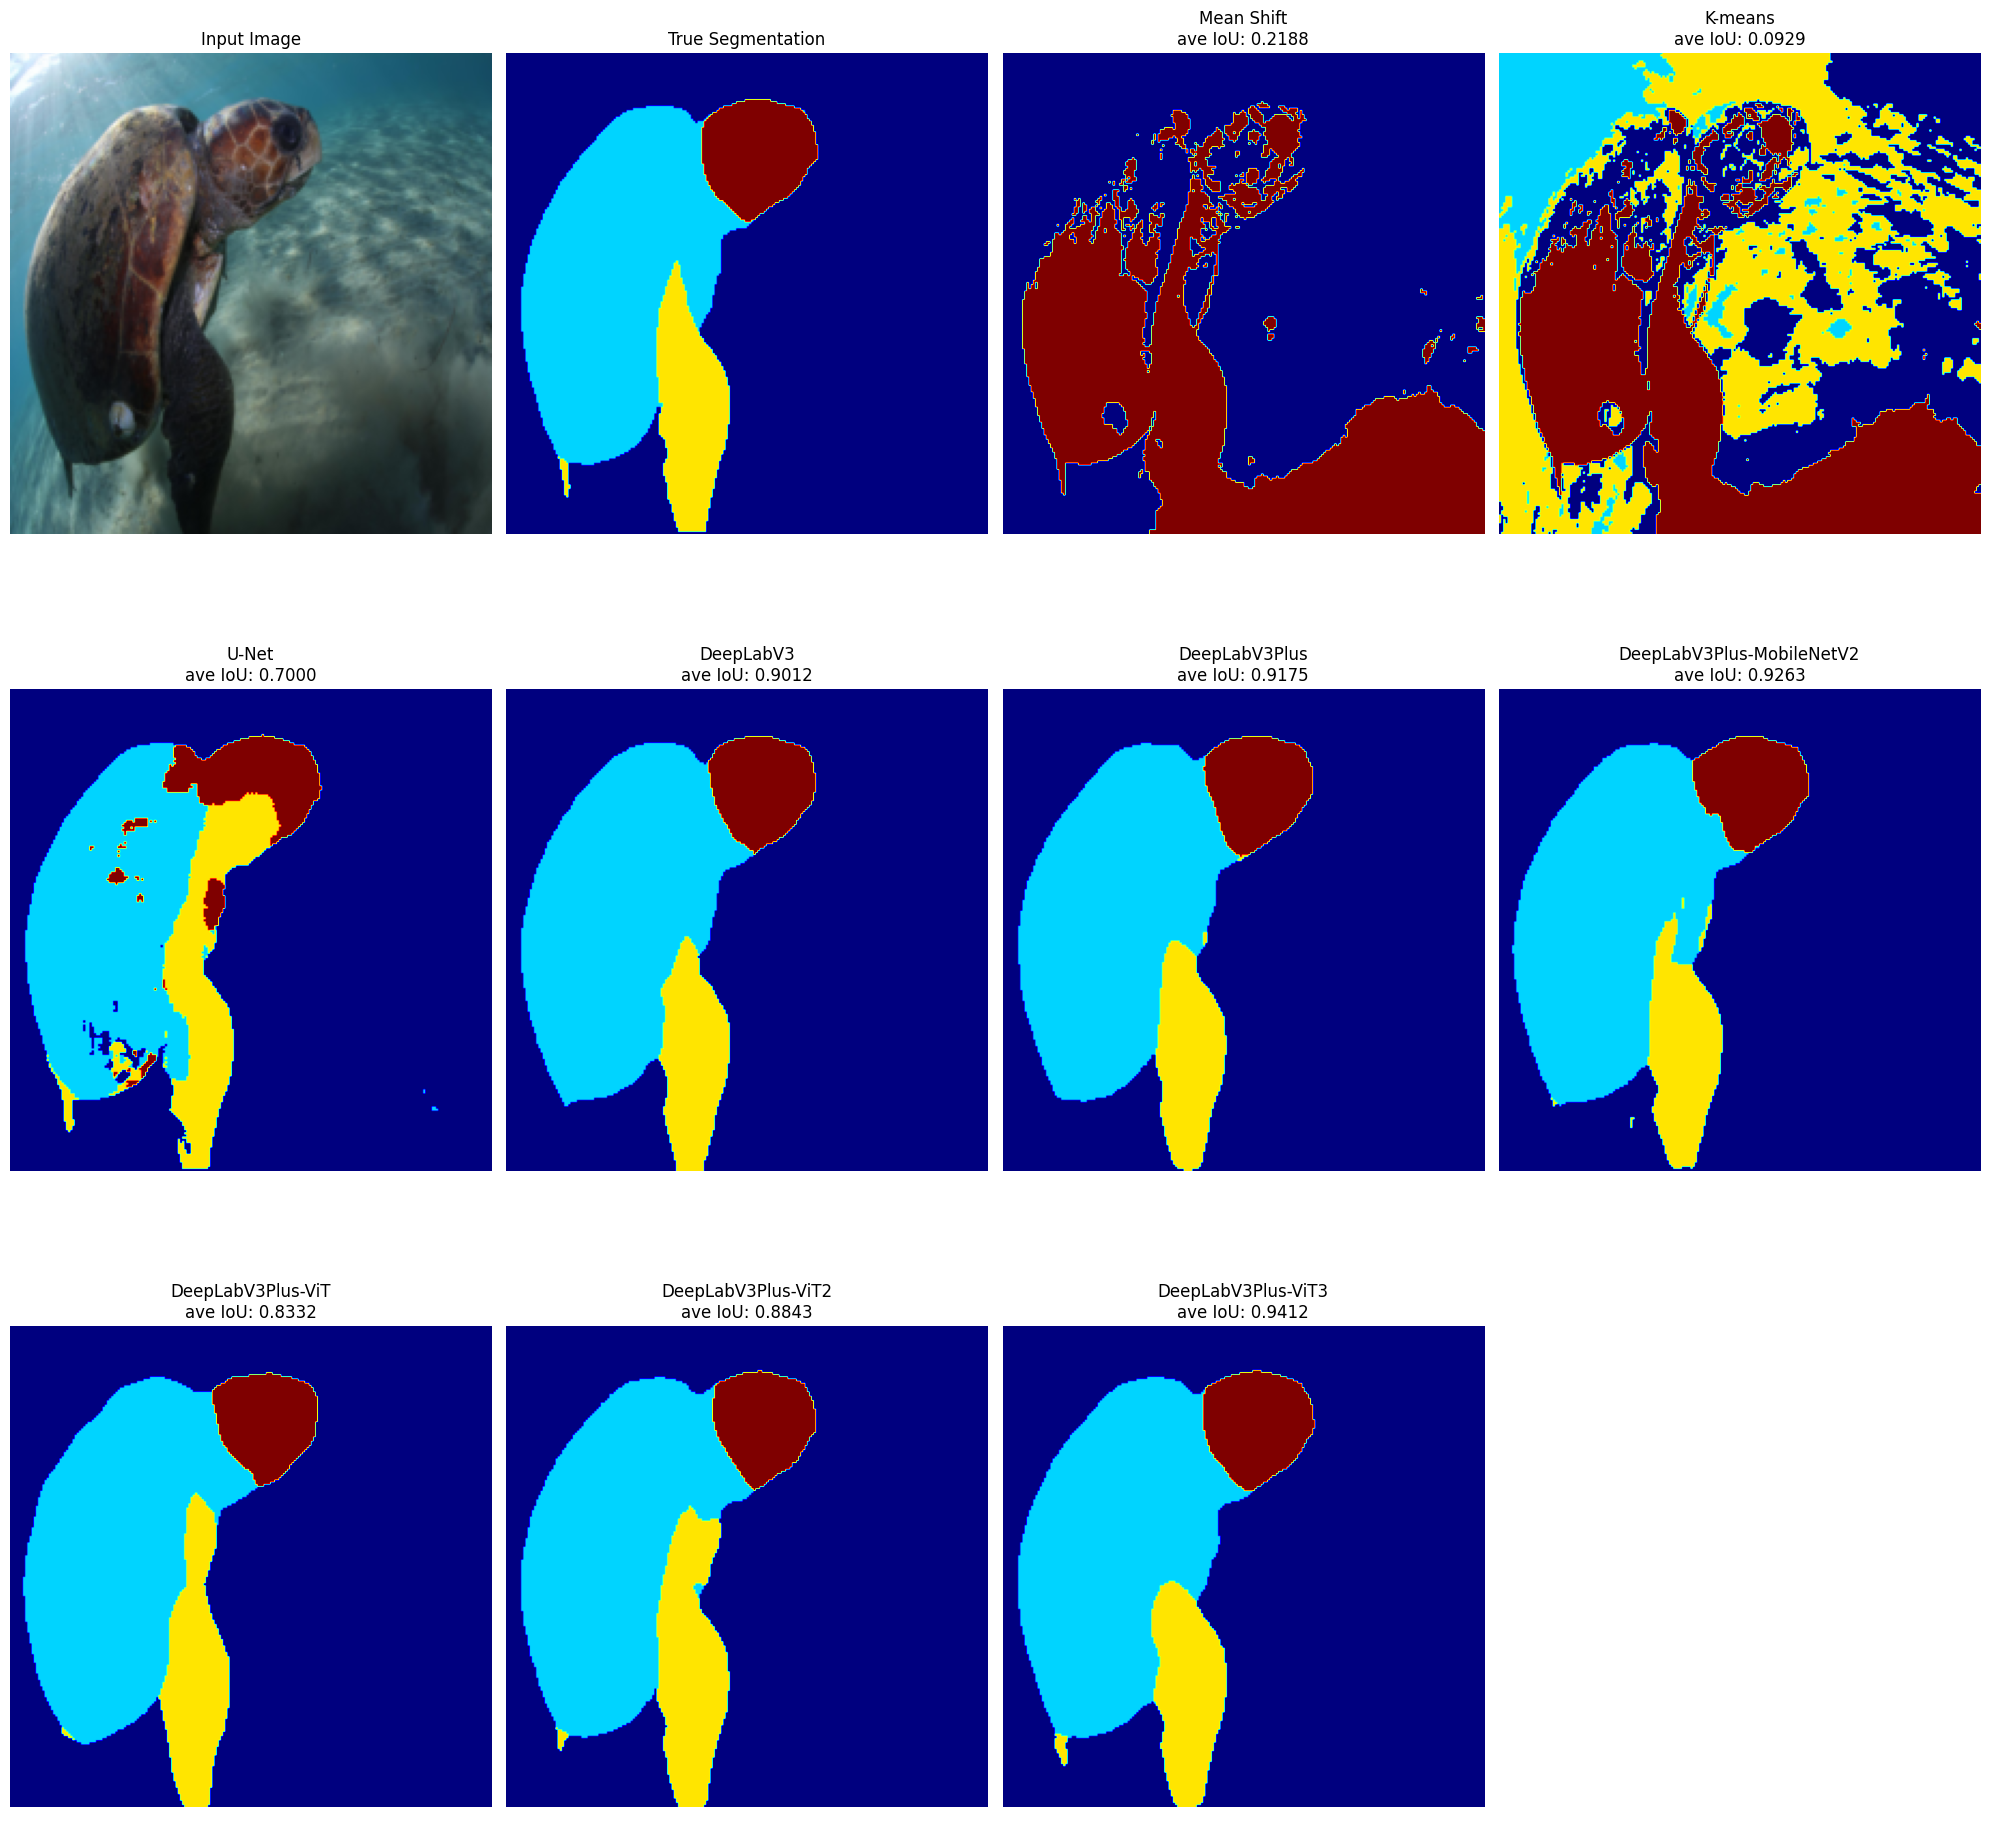

In [286]:
# Test on High-Quality Images
print("High-Quality Images:")
ID = 4 # Some High-Quality images: 1, 2, 3, 4...(many)
test(ID)

Challenging Images:


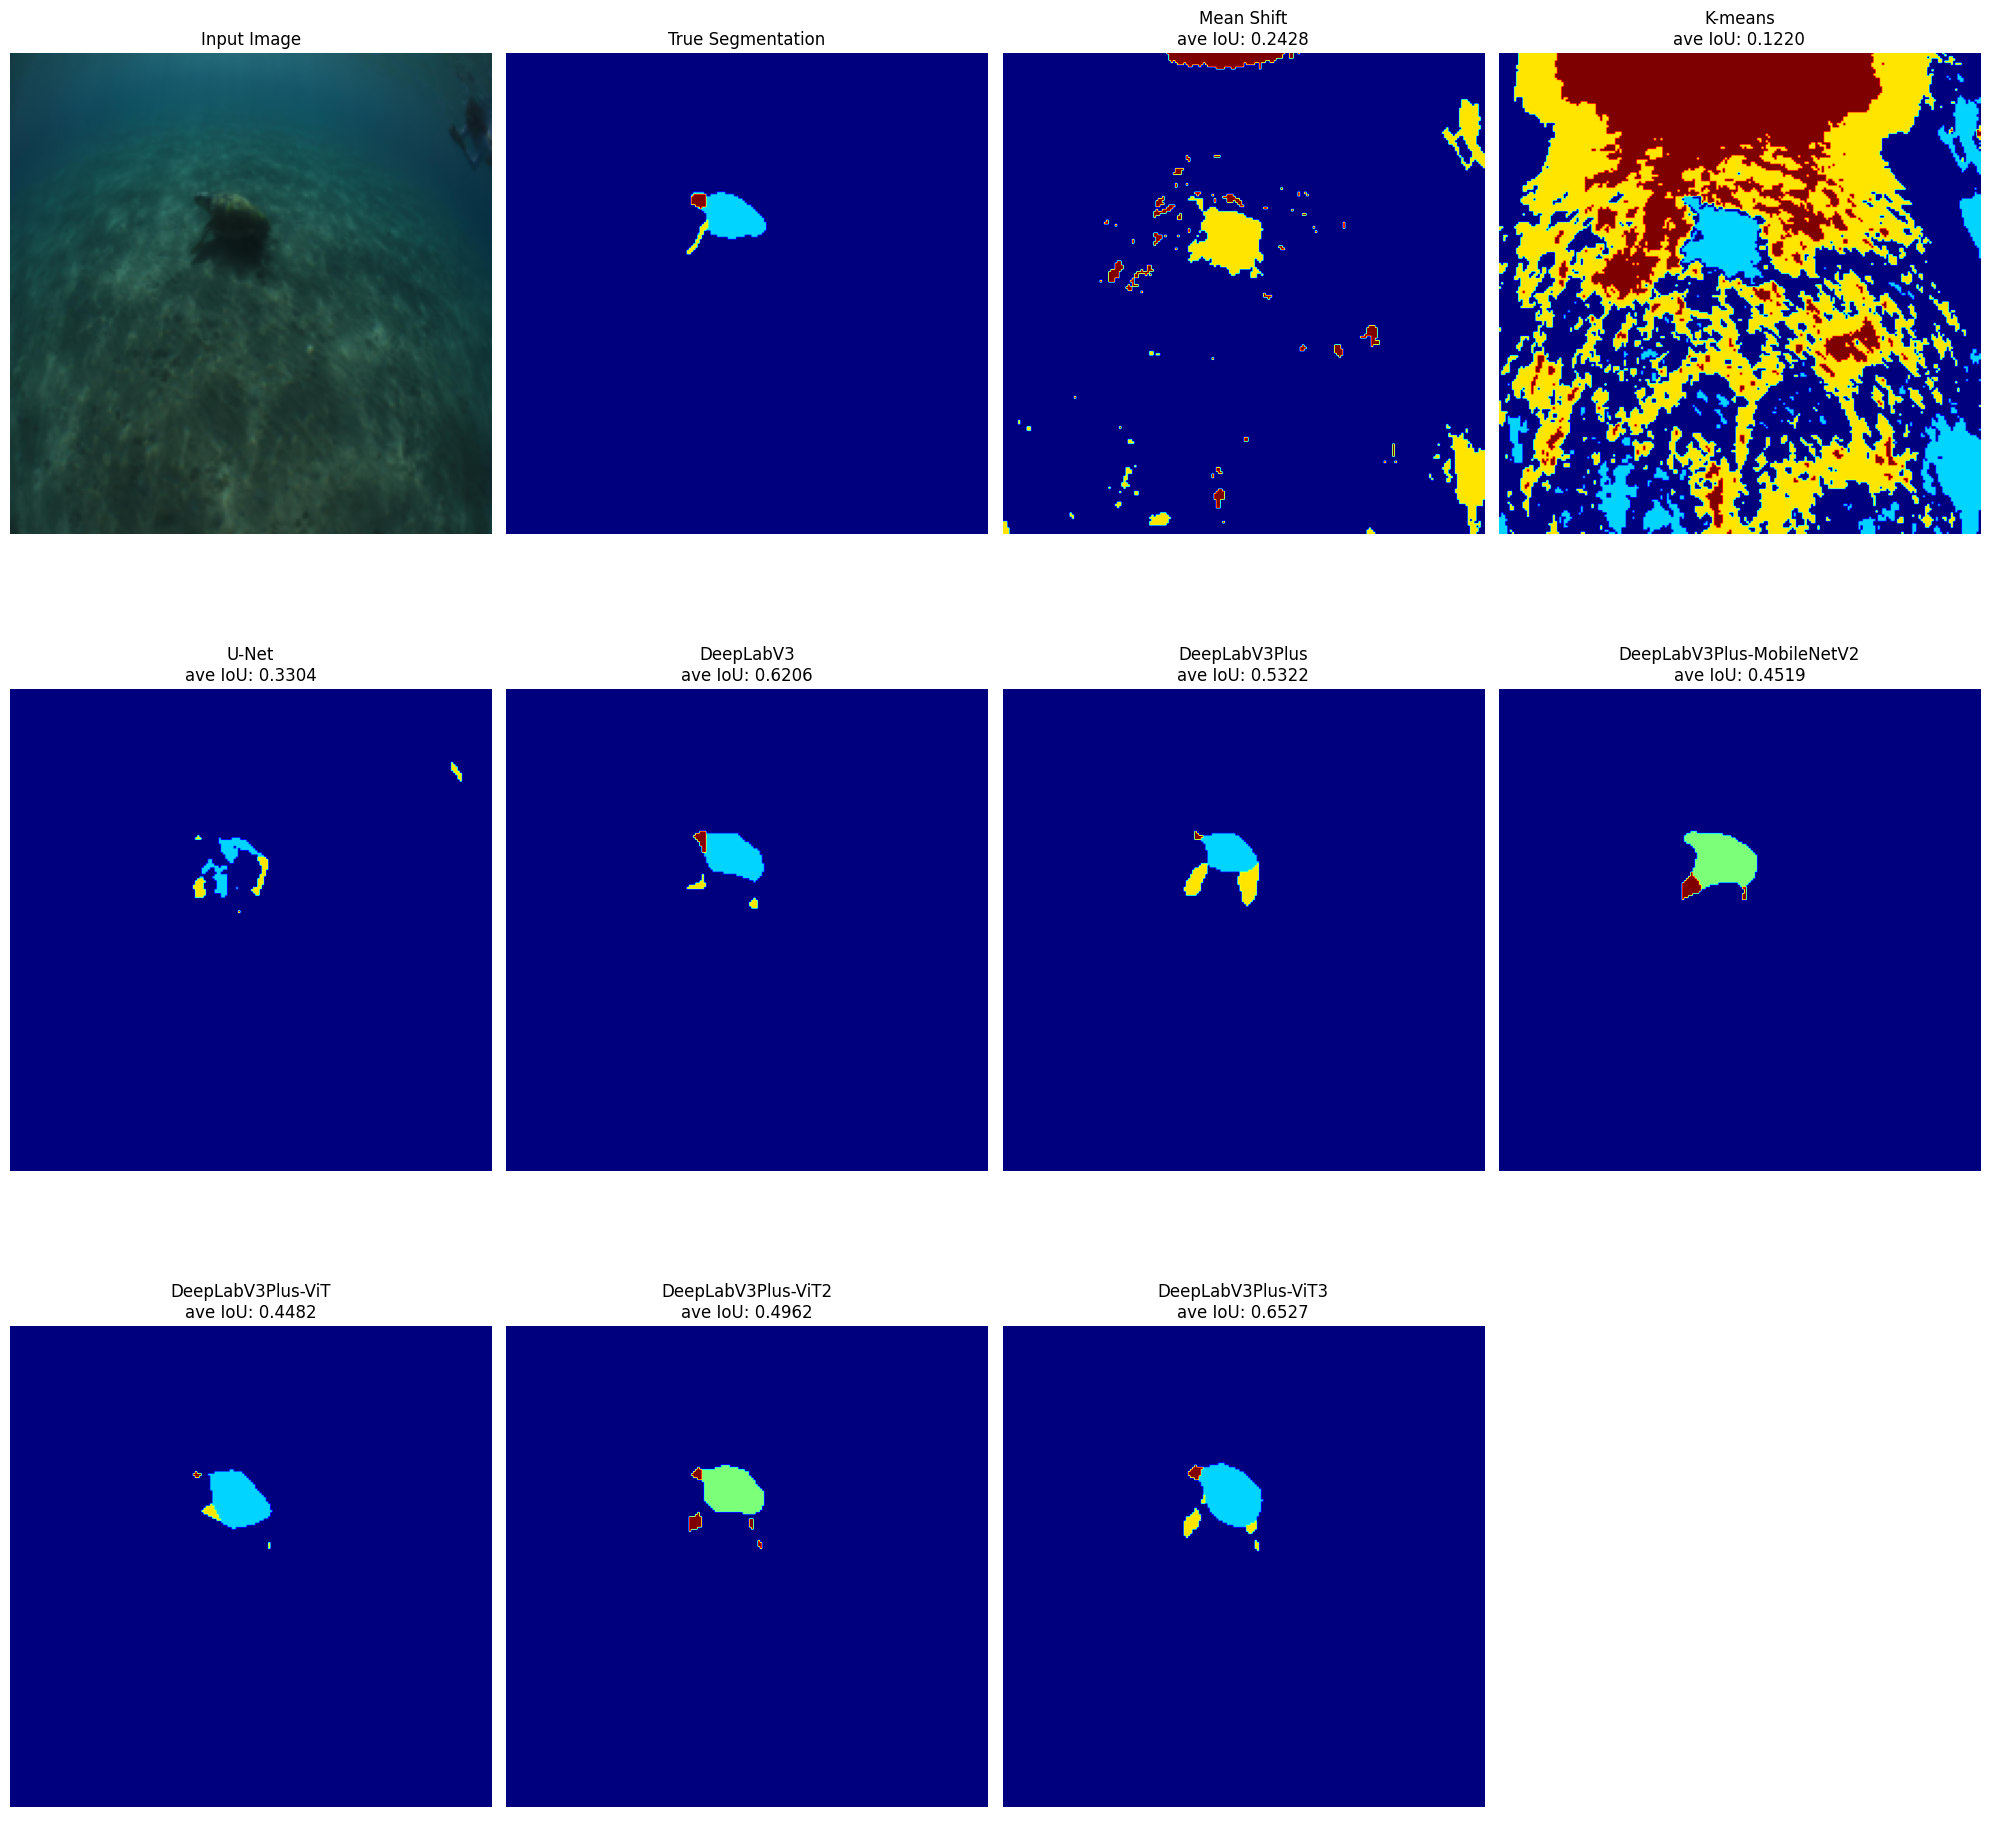

In [287]:
# Test on Challenging Images
print("Challenging Images:")
ID = 201 # Some challenging images: 6, 8, 45, 63, 148, 192, 193, 194, 195, 197, 201, 198, 199, 201, 675, 678, 689, 695, 916, 1000
test(ID)